# Problem 1 : Clustering
## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

# Problem 2: CART-RF-ANN
## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Data Dictionary:
- spending: Amount spent by the customer per month (in 1000s)
- advance_payments: Amount paid by the customer in advance by cash (in 100s)
- probability_of_full_payment: Probability of payment done in full by the customer to the bank
- current_balance: Balance amount left in the account to make purchases (in 1000s)
- credit_limit: Limit of the amount in credit card (10000s)
- min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
- max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
df.
import dataframe_image as dfi
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

### Checking the first 5 rows of the data (Sample of the data)

In [3]:
sample_data = df.head()
sample_data

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [4]:
dfi.export(sample_data, 'sample_data.png')

### Checking the shape of the data

In [5]:
df.shape

(210, 7)

### Checking and gathering more Information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Checking for missing values 

In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

### Describing the data 

In [9]:
df_desc = df.describe().T
df_desc

count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      max  
spending                      14.35500  17.305000  21.1800  
advance_payments              14.32000  15.715000  17.2500  
probability_of_full_payment    0.87345   0.887775   0.9183  
current_balance                5.52350   5.979750   6.6750  
credit_limit                   3.23700   3.561750   4.0330  
min_payment_amt                3.59900   4.768750   8.4560  
max_spent_in_single_shopping   5.22300   5.877000   6.5500

In [10]:
dfi.export(df_desc, 'df_desc.png')

### Univariate Analysis

In [11]:
plt.style.use('seaborn-whitegrid')

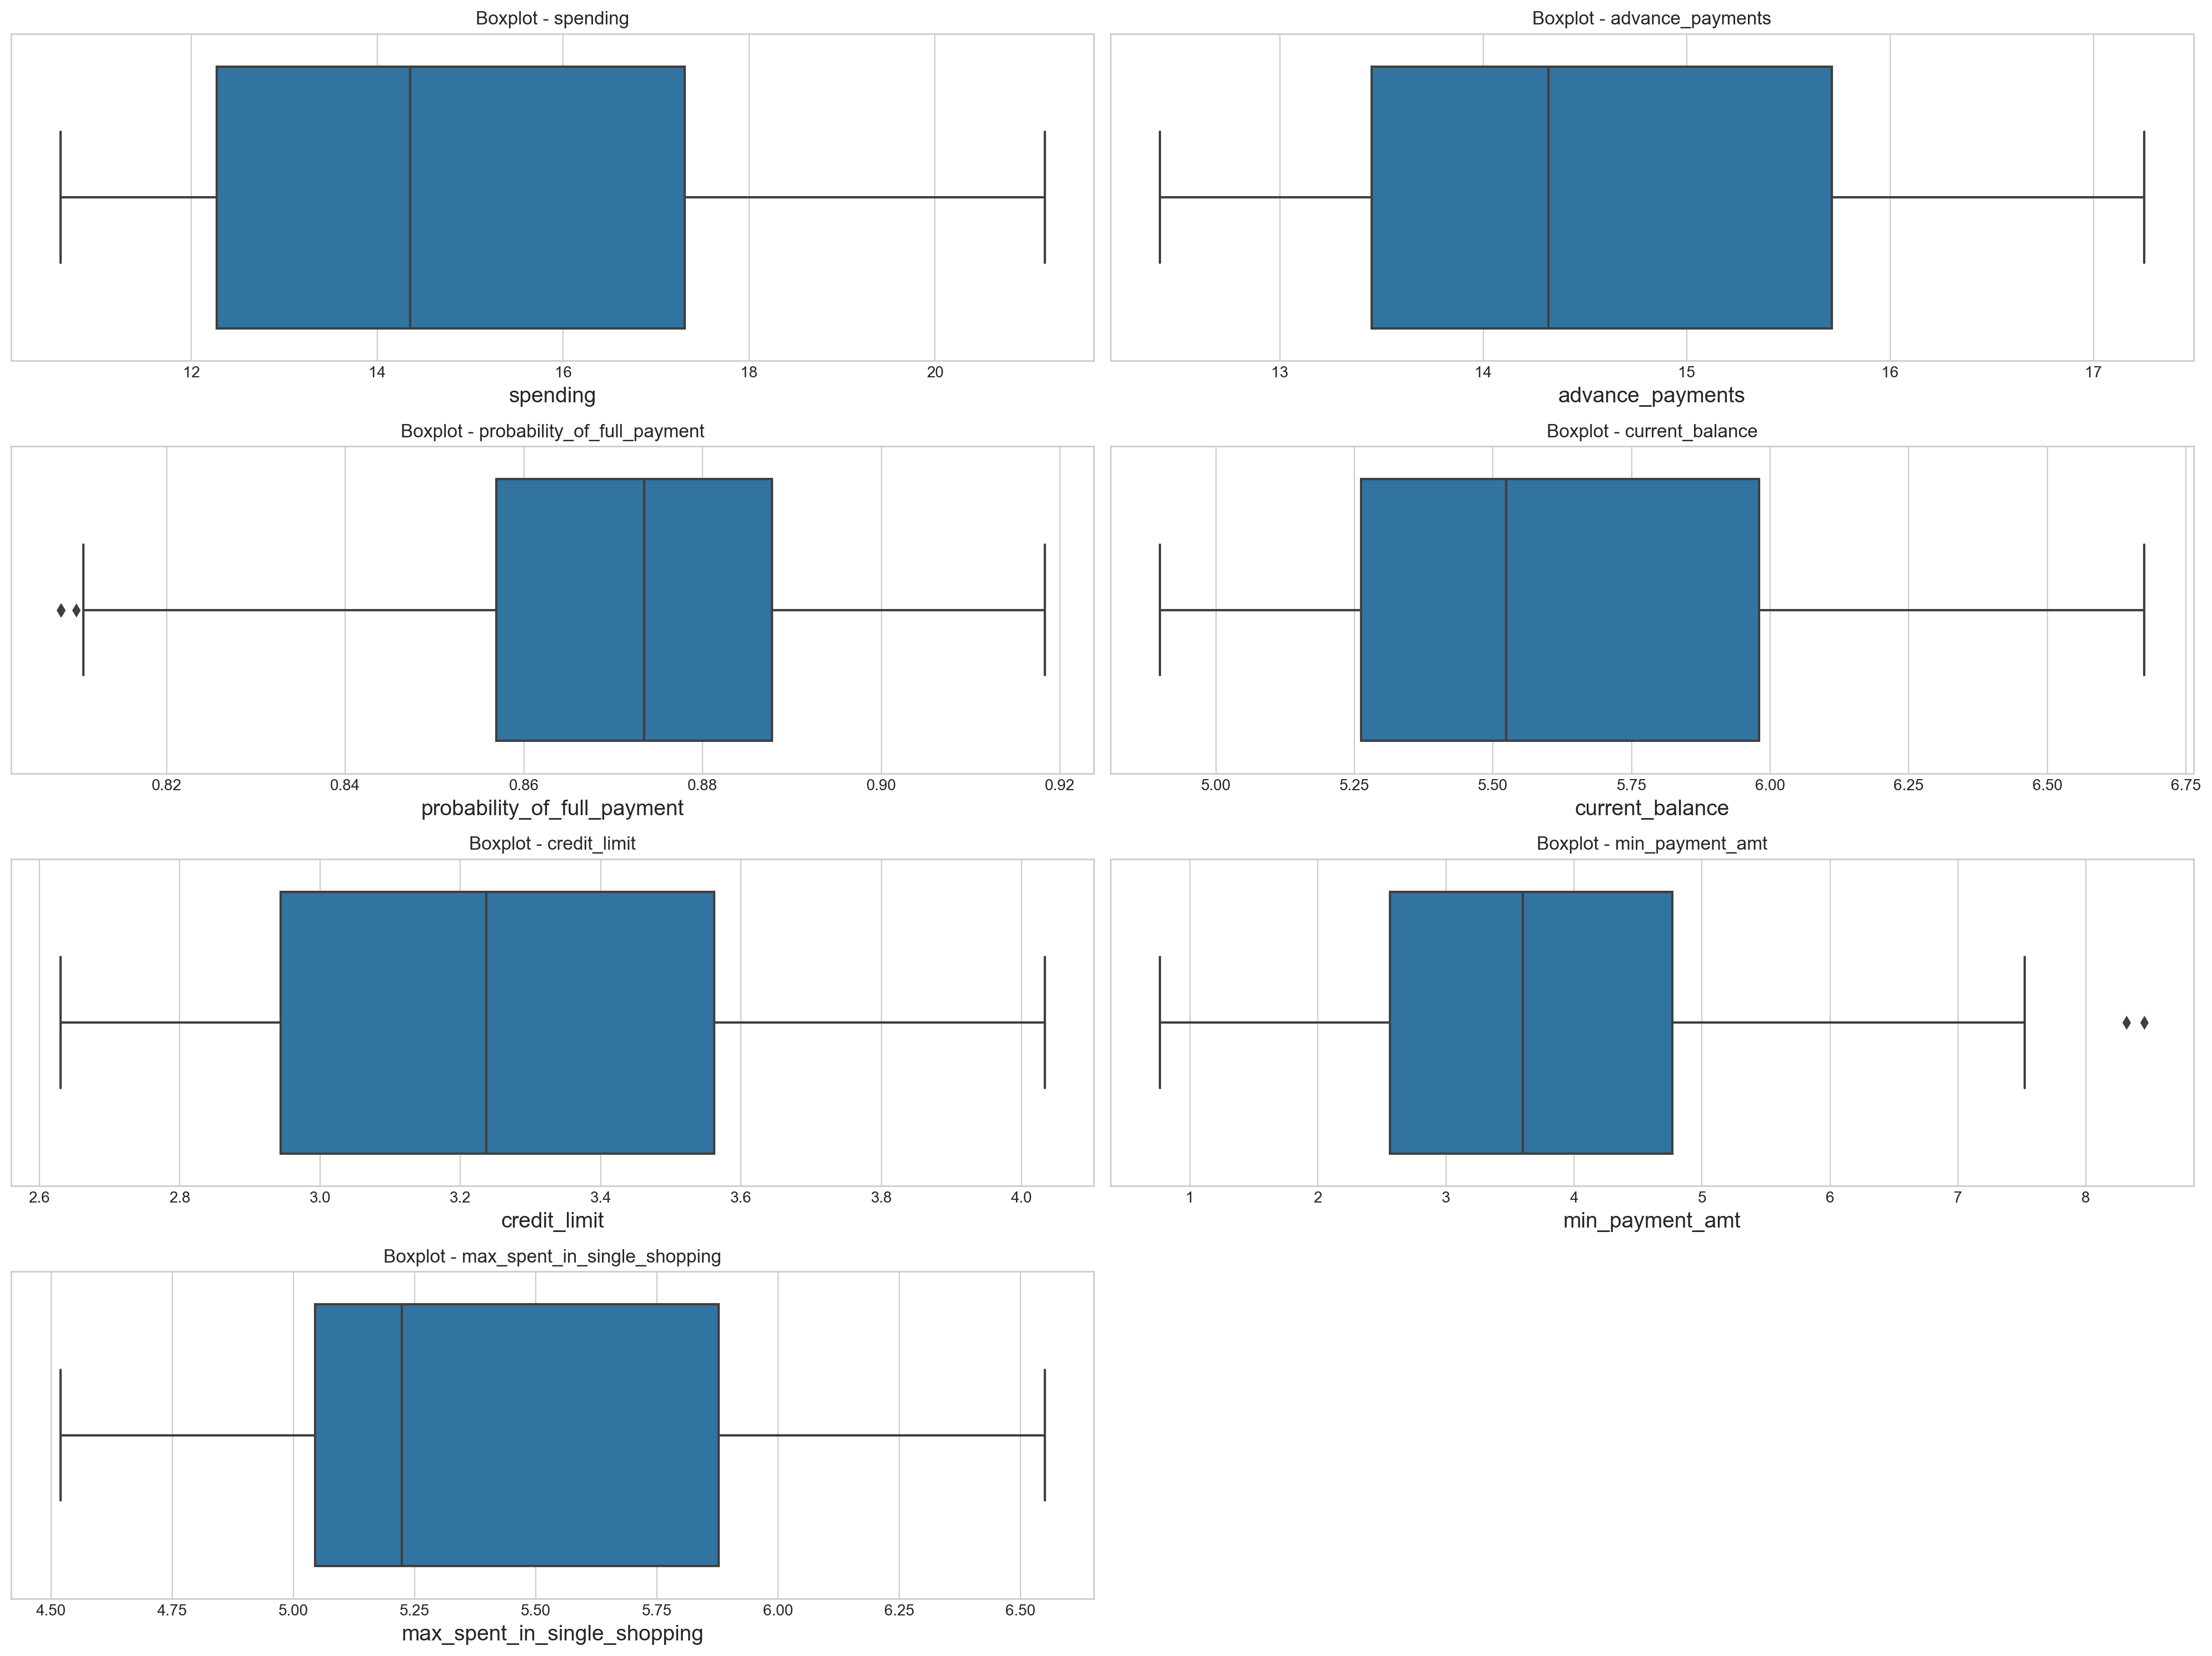

In [12]:
plt.figure(figsize = (20, 15), dpi = 200)
for i in range(len(df.columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data = df, x = df[df.columns[i]], orient = 'h')
    plt.title(f'Boxplot - {df.columns[i]}')
    plt.xlabel(df.columns[i],fontsize = 14)
    plt.tight_layout()
    plt.savefig('Uni_Boxplot.png', bbox_inches = 'tight')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

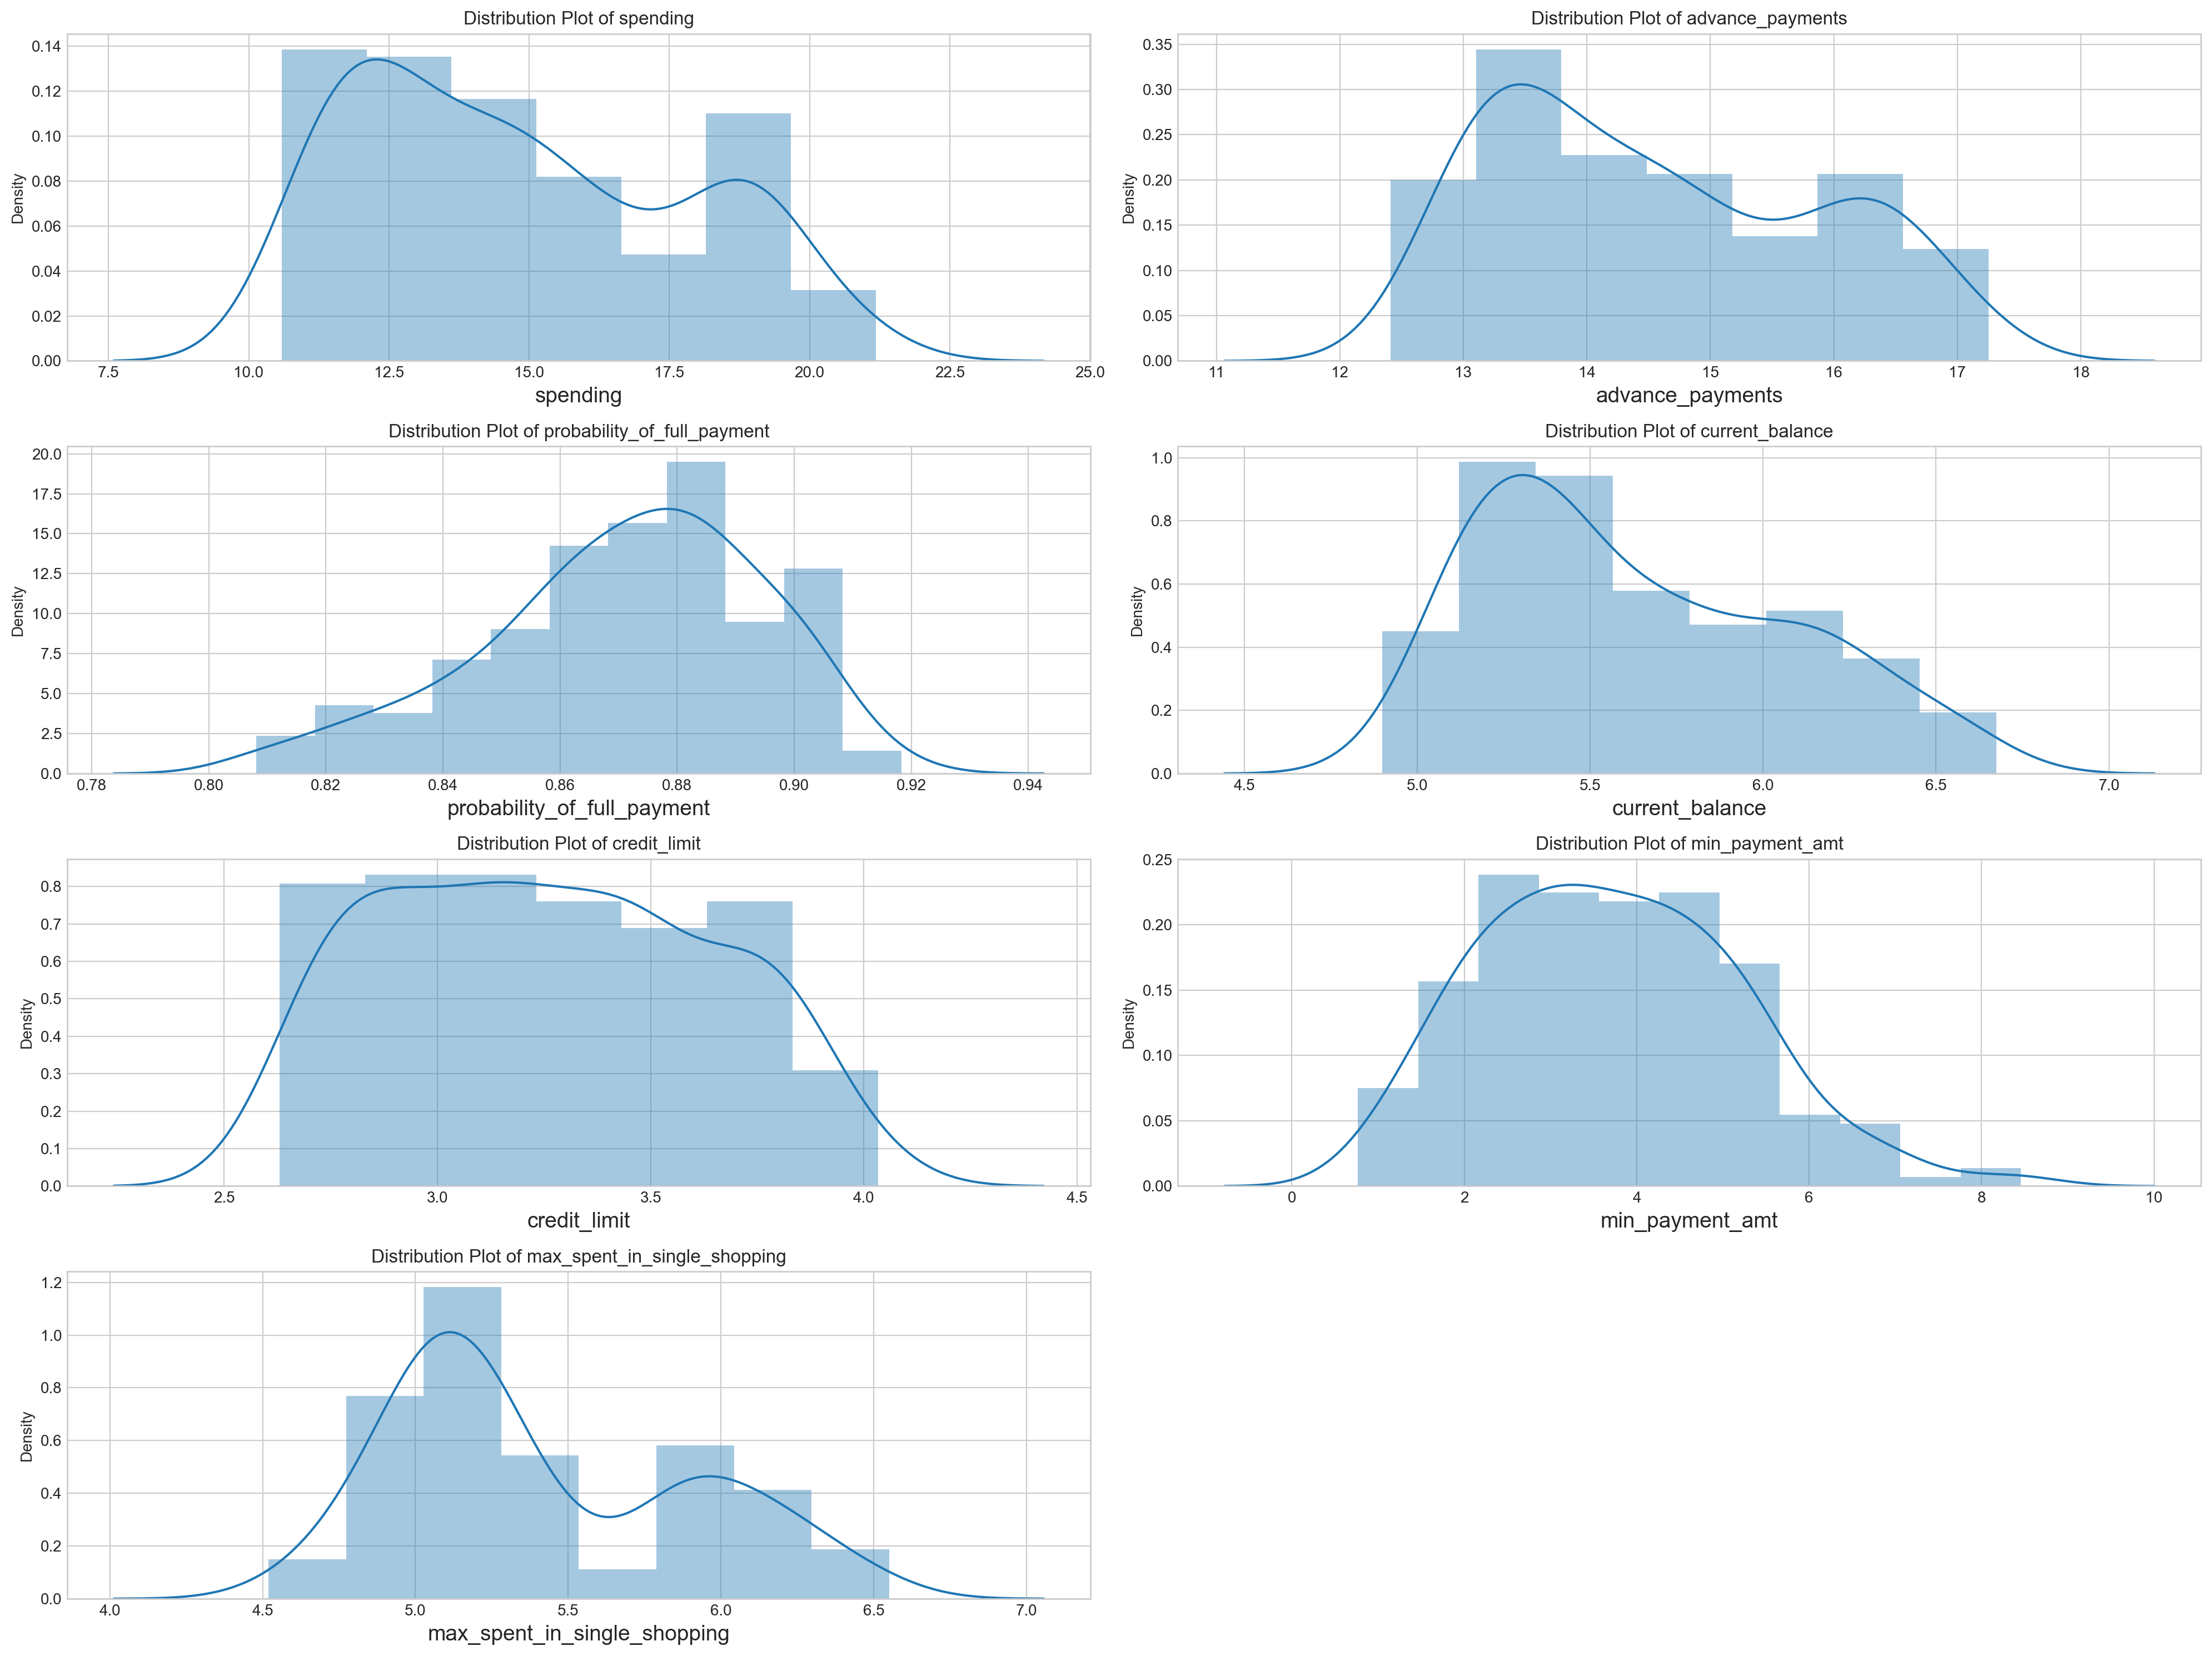

In [13]:
plt.figure(figsize = (20, 15), dpi = 200)
for i in range(len(df.columns)):
    plt.subplot(4,2,i+1)
    sns.distplot(x = df[df.columns[i]])
    plt.title(f'Distribution Plot of {df.columns[i]}')
    plt.xlabel(df.columns[i], fontsize = 14)
    plt.tight_layout()
    plt.savefig('Uni_Hist.png', bbox_inches = 'tight')

### Bivariate Analysis

<Figure size 2400x1600 with 0 Axes>

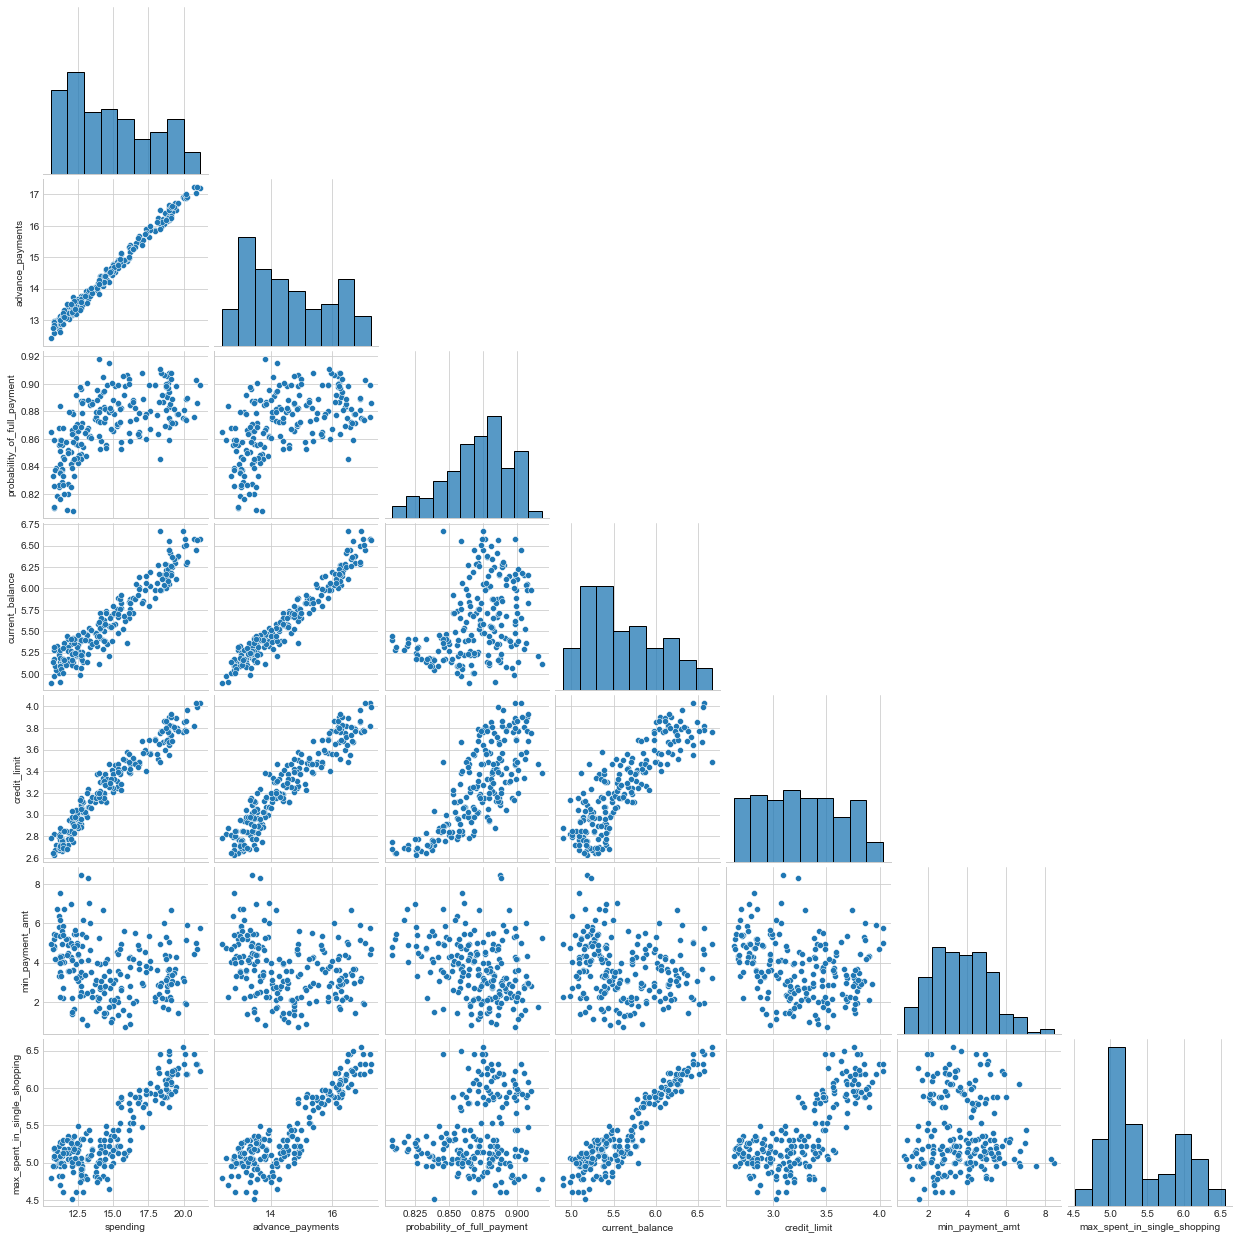

In [14]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.pairplot(df, corner = True);
plt.savefig('Bi_Pair_plot.png')

In [15]:
corr = df.corr()
corr

spending  advance_payments  \
spending                      1.000000          0.994341   
advance_payments              0.994341          1.000000   
probability_of_full_payment   0.608288          0.529244   
current_balance               0.949985          0.972422   
credit_limit                  0.970771          0.944829   
min_payment_amt              -0.229572         -0.217340   
max_spent_in_single_shopping  0.863693          0.890784   

                              probability_of_full_payment  current_balance  \
spending                                         0.608288         0.949985   
advance_payments                                 0.529244         0.972422   
probability_of_full_payment                      1.000000         0.367915   
current_balance                                  0.367915         1.000000   
credit_limit                                     0.761635         0.860415   
min_payment_amt                                 -0.331471        -0.171562   
max_spent_in_single_shopping                     0.226825         0.932806   

                              credit_limit  min_payment_amt  \
spending                          0.970771        -0.229572   
advance_payments                  0.944829        -0.217340   
probability_of_full_payment       0.761635        -0.331471   
current_balance                   0.860415        -0.171562   
credit_limit                      1.000000        -0.258037   
min_payment_amt                  -0.258037         1.000000   
max_spent_in_single_shopping      0.749131        -0.011079   

                              max_spent_in_single_shopping  
spending                                          0.863693  
advance_payments                                  0.890784  
probability_of_full_payment                       0.226825  
current_balance                                   0.932806  
credit_limit                                      0.749131  
min_payment_amt                                  -0.011079  
max_spent_in_single_shopping                      1.000000

In [16]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(corr, annot = True)
plt.savefig('Bi_Heat_map.png', bbox_inches = 'tight')

### Outlier Treatment

#### Column  - min_payment_amt

In [17]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

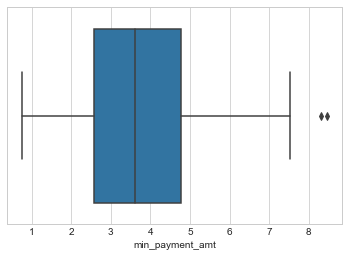

In [18]:
sns.boxplot(data = df, x = 'min_payment_amt');

In [19]:
lr, ur  = remove_outliers(df['min_payment_amt'])

In [20]:
print("For column 'min_payment_amt' lower range:",lr,"and upper range:",ur)

For column 'min_payment_amt' lower range: -0.7493749999999992 and upper range: 8.079625


In [21]:
df['min_payment_amt'] = np.where(df['min_payment_amt'] > ur,ur,df['min_payment_amt'])
df['min_payment_amt'] = np.where(df['min_payment_amt'] < lr,lr,df['min_payment_amt'])

In [22]:
sns.boxplot(data = df, x = 'min_payment_amt');

#### Column  - probability_of_full_payment 

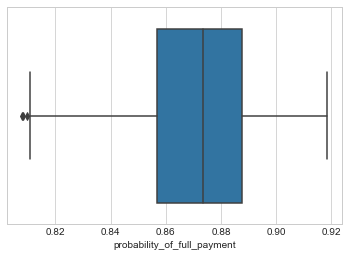

In [23]:
sns.boxplot(data = df, x = 'probability_of_full_payment');

In [24]:
lr, ur = remove_outliers(df['probability_of_full_payment'])

In [25]:
print("For column 'probability_of_full_payment' lower range:",lr,"and upper range:",ur)

For column 'probability_of_full_payment' lower range: 0.8105875 and upper range: 0.9340875


In [26]:
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment']>ur, ur, df['probability_of_full_payment'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment']<lr,lr,df['probability_of_full_payment'])                                             

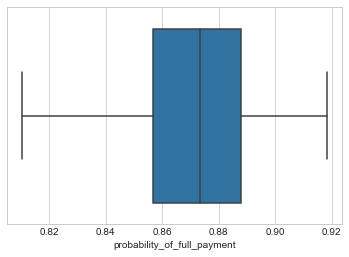

In [27]:
sns.boxplot(data = df, x = 'probability_of_full_payment');

## 1.2  Do you think scaling is necessary for clustering in this case? Justify



In [28]:
max(df['spending']), min(df['spending']), np.std(df['spending']), np.var(df['spending'])

(21.18, 10.59, 2.902763307757227, 8.426034820861677)

In [29]:
max(df['advance_payments']), min(df['advance_payments']), np.std(df['advance_payments']),np.var(df['advance_payments'])

(17.25, 12.41, 1.30284559048763, 1.6974066326530612)

In [30]:
max(df['probability_of_full_payment']), min(df['probability_of_full_payment']), np.std(df['probability_of_full_payment']),np.var(df['probability_of_full_payment'])

(0.9183, 0.8105875, 0.023503842501762292, 0.0005524306123476474)

In [31]:
max(df['current_balance']), min(df['current_balance']), np.std(df['current_balance']), np.var(df['current_balance'])

(6.675, 4.899, 0.44200730583633857, 0.19537045841269854)

In [32]:
max(df['credit_limit']), min(df['credit_limit']), np.std(df['credit_limit']), np.var(df['credit_limit'])

(4.033, 2.63, 0.3768140516237867, 0.1419888295011338)

In [33]:
max(df['min_payment_amt']), min(df['min_payment_amt']), np.std(df['min_payment_amt']), np.var(df['min_payment_amt'])

(8.079625, 0.7651, 1.4911259705341333, 2.2234566600013608)

In [34]:
max(df['max_spent_in_single_shopping']), min(df['max_spent_in_single_shopping']), np.std(df['max_spent_in_single_shopping']), np.var(df['max_spent_in_single_shopping'])

(6.55, 4.519, 0.4903089110257865, 0.24040282823129264)

In [35]:
X = StandardScaler()

In [36]:
scaled_df = X.fit_transform(df)

In [37]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

### Performing hierarchical clustering with average as linkage method

In [38]:
link_method = linkage(scaled_df, method = 'average'  )

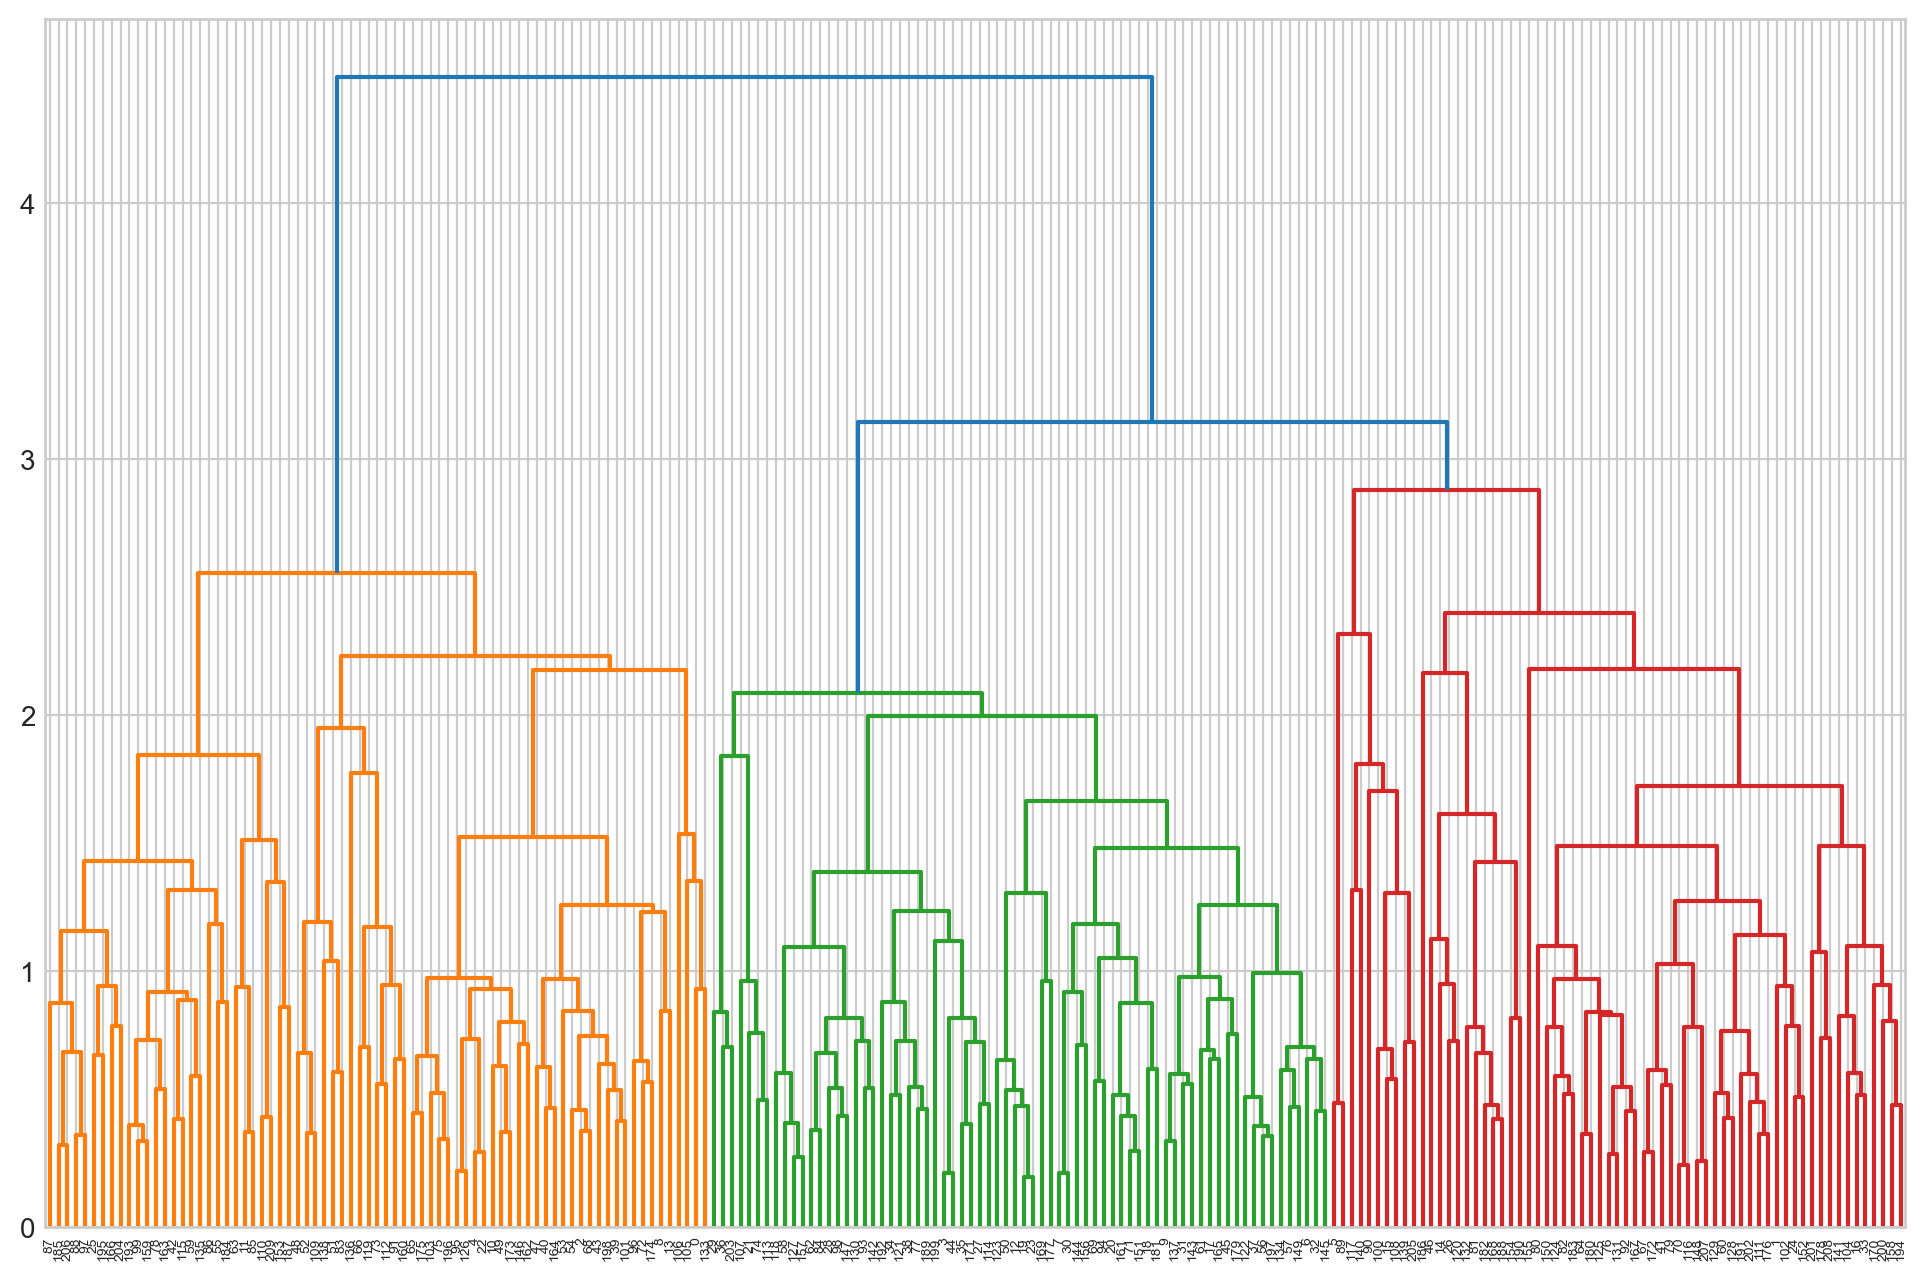

In [39]:
plt.figure(figsize = (12, 8), dpi = 200)
dend = dendrogram(link_method)
plt.savefig('Dendrogram_avg.png', bbox_inches = 'tight')
plt.show()

### cutting the Dendrogram with suitable clusters

In [40]:
dend_20  = dendrogram(link_method, truncate_mode='lastp', p = 20)
plt.savefig('dendrogram_trunc_20', bbox_inches = 'tight')

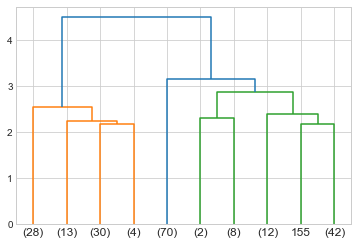

In [41]:
dend_10 = dendrogram(link_method, truncate_mode = 'lastp', p = 10)
plt.savefig('dendrogram_trunc_10', bbox_inches = 'tight')

### Using fcluster module to create optimal number of clusters

In [42]:
clust_3 = fcluster(link_method, 3, criterion = 'maxclust')
clust_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [43]:
df_copy = df.copy()

In [44]:
df_copy.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                     0.875200            6.675   
1     15.99             14.89                     0.906400            5.363   
2     18.95             16.42                     0.882900            6.248   
3     10.83             12.96                     0.810588            5.278   
4     17.99             15.86                     0.899200            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [45]:
df_copy['clusters (3)'] = clust_3  

In [46]:
df_copy.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                     0.875200            6.675   
1     15.99             14.89                     0.906400            5.363   
2     18.95             16.42                     0.882900            6.248   
3     10.83             12.96                     0.810588            5.278   
4     17.99             15.86                     0.899200            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters (3)  
0         3.763            3.252                         6.550             1  
1         3.582            3.336                         5.144             3  
2         3.755            3.368                         6.148             1  
3         2.641            5.182                         5.185             2  
4         3.694            2.068                         5.837             1

### Cluster Frequency

In [47]:
df_copy['clusters (3)'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters (3), dtype: int64

### Cluster Profiles

In [48]:
agg_mean_clust = df_copy.groupby('clusters (3)').mean()

In [49]:
agg_mean_clust

spending  advance_payments  probability_of_full_payment  \
clusters (3)                                                             
1             18.129200         16.058000                     0.881595   
2             11.916857         13.291000                     0.846845   
3             14.217077         14.195846                     0.884869   

              current_balance  credit_limit  min_payment_amt  \
clusters (3)                                                   
1                    6.135747      3.648120         3.650200   
2                    5.258300      2.846000         4.619000   
3                    5.442000      3.253508         2.759007   

              max_spent_in_single_shopping  
clusters (3)                                
1                                 5.987040  
2                                 5.115071  
3                                 5.055569

In [50]:
dfi.export(agg_mean_clust, 'agg_mean_clust.png')

### Performing hierarchical clustering with ward as linkage method

In [51]:
link_method_ward = linkage(scaled_df, method = 'ward')

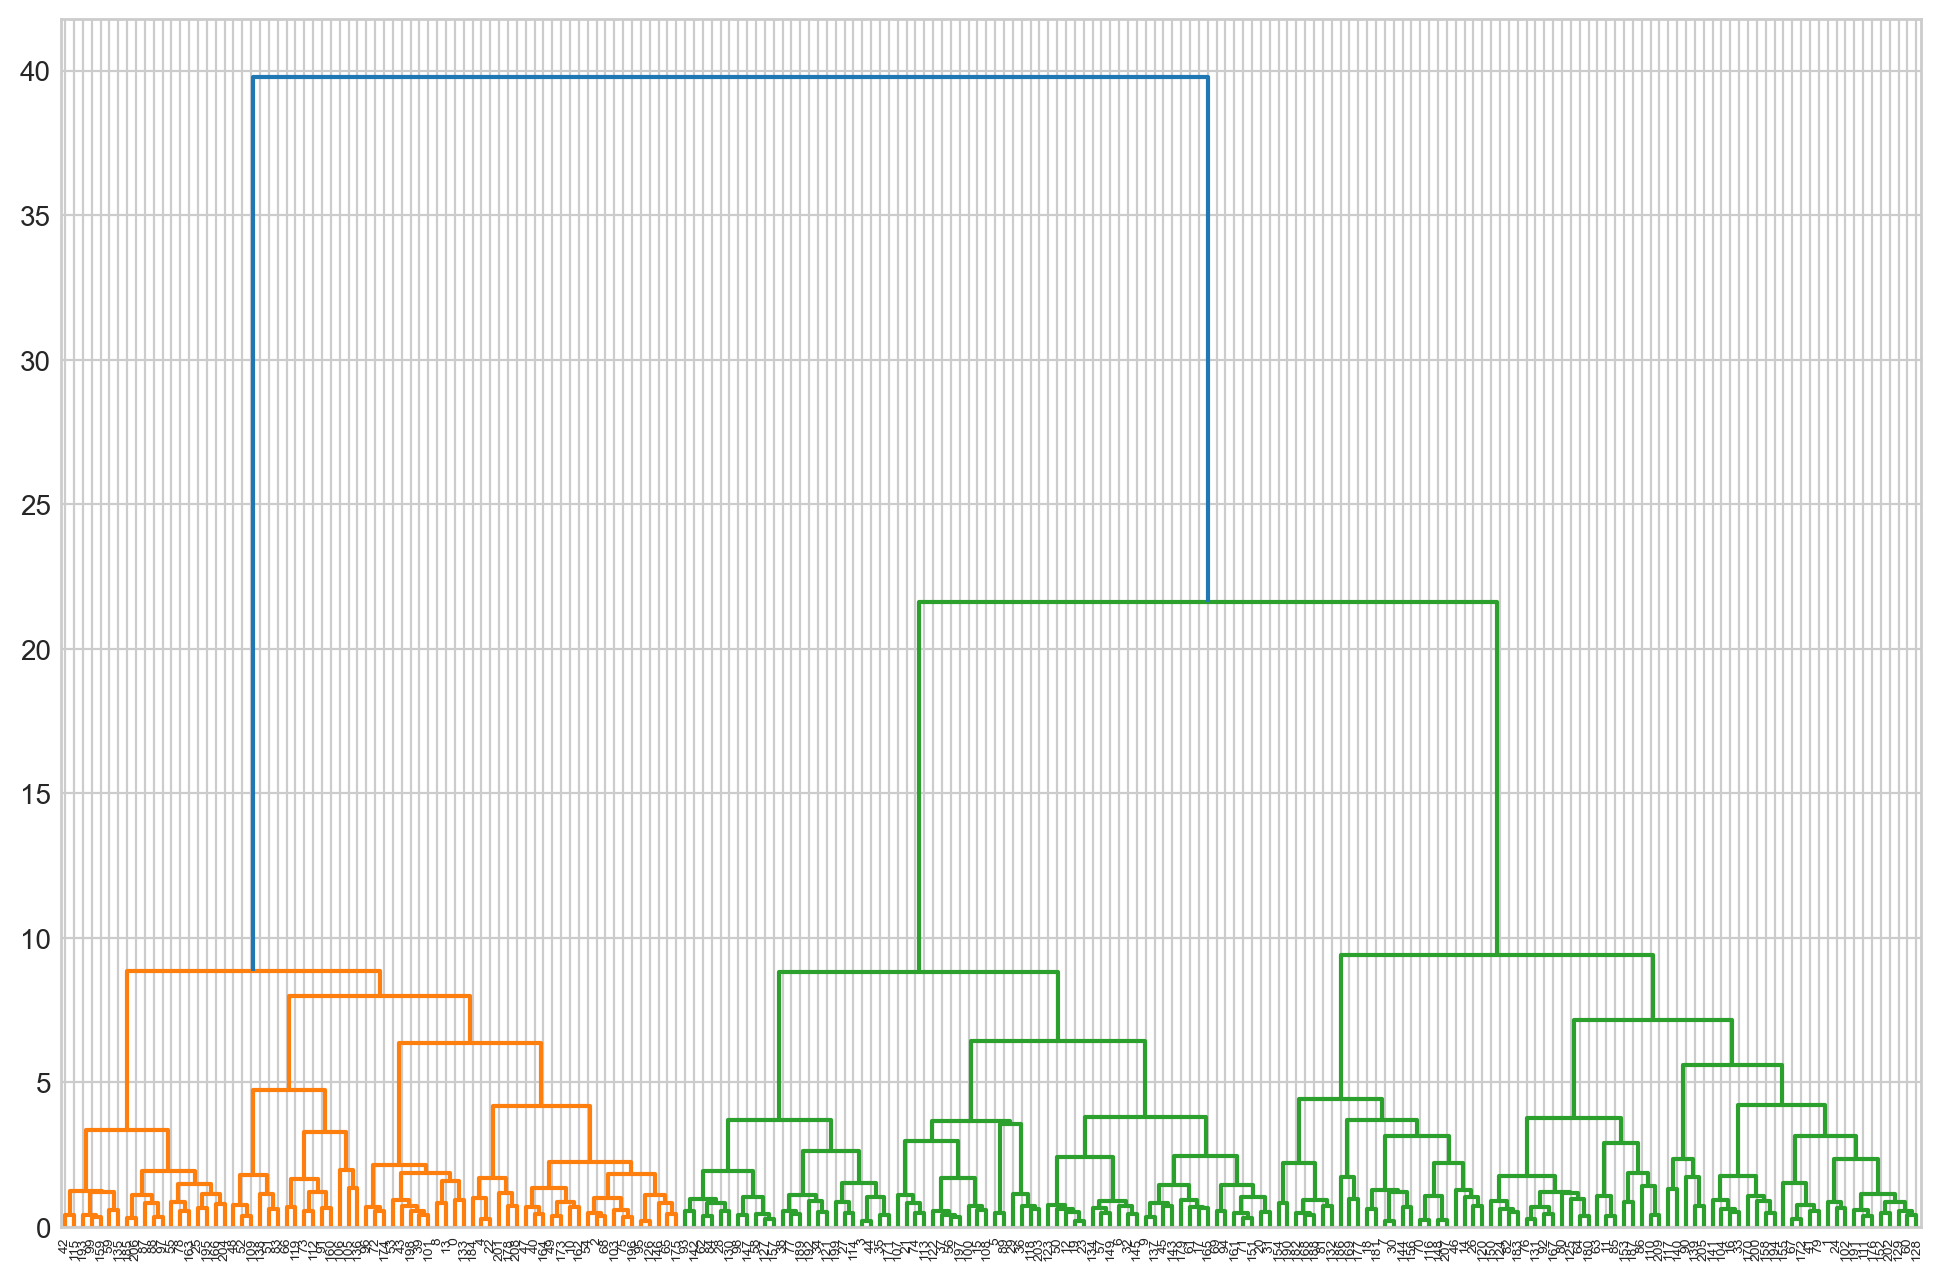

In [52]:
plt.figure(figsize = (12, 8), dpi = 200)
dend_ward = dendrogram(link_method_ward)
plt.savefig('Dendrogram_wards.png', bbox_inches = 'tight')
plt.show()

### cutting the Dendrogram with suitable clusters

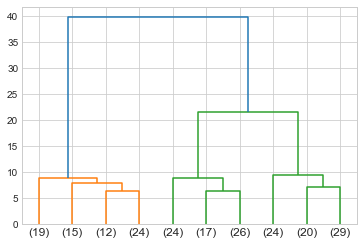

In [53]:
dend_ward_10 = dendrogram(link_method_ward, truncate_mode= 'lastp', p= 10)
plt.savefig('dendrogram_trunc_20_w', bbox_inches = 'tight')

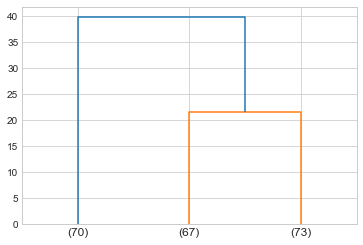

In [54]:
dend_ward_3 = dendrogram(link_method_ward, truncate_mode= 'lastp', p = 3)
plt.savefig('dendrogram_trunc_10_w', bbox_inches = 'tight')

- from the above two dendrogram, its is very evident that the distance after 10 is the highest.
- In a dendrogram greater the difference in height, more the dissimilarity within the obejcts i.e. heterogenity between the groups.
- hence optimum number of cluster is 3.

### Using fcluster module to create optimal number of clusters

In [55]:
clust_ward_3 = fcluster(link_method_ward, 3, criterion = 'maxclust')
clust_ward_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [56]:
df_copy_w = df.copy()

In [57]:
df_copy_w.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                     0.875200            6.675   
1     15.99             14.89                     0.906400            5.363   
2     18.95             16.42                     0.882900            6.248   
3     10.83             12.96                     0.810588            5.278   
4     17.99             15.86                     0.899200            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [58]:
df_copy_w['clusters (3)'] = clust_ward_3

In [59]:
df_copy_w.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                     0.875200            6.675   
1     15.99             14.89                     0.906400            5.363   
2     18.95             16.42                     0.882900            6.248   
3     10.83             12.96                     0.810588            5.278   
4     17.99             15.86                     0.899200            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters (3)  
0         3.763            3.252                         6.550             1  
1         3.582            3.336                         5.144             3  
2         3.755            3.368                         6.148             1  
3         2.641            5.182                         5.185             2  
4         3.694            2.068                         5.837             1

### Cluster Frequency

In [60]:
df_copy_w['clusters (3)'].value_counts()

3    73
1    70
2    67
Name: clusters (3), dtype: int64

### Cluster Profiles

In [61]:
agg_mean_clust_w = df_copy_w.groupby('clusters (3)').mean()

In [62]:
agg_mean_clust_w

spending  advance_payments  probability_of_full_payment  \
clusters (3)                                                             
1             18.371429         16.145429                     0.884400   
2             11.872388         13.257015                     0.848155   
3             14.199041         14.233562                     0.879190   

              current_balance  credit_limit  min_payment_amt  \
clusters (3)                                                   
1                    6.158171      3.684629         3.639157   
2                    5.238940      2.848537         4.940302   
3                    5.478233      3.226452         2.612181   

              max_spent_in_single_shopping  
clusters (3)                                
1                                 6.017371  
2                                 5.122209  
3                                 5.086178

In [63]:
dfi.export(agg_mean_clust_w, 'agg_mean_clust_w.png')

In [64]:
agg_mean_clust_w['Freq']=df_copy_w['clusters (3)'].value_counts().sort_index()

In [65]:
agg_mean_clust_w

spending  advance_payments  probability_of_full_payment  \
clusters (3)                                                             
1             18.371429         16.145429                     0.884400   
2             11.872388         13.257015                     0.848155   
3             14.199041         14.233562                     0.879190   

              current_balance  credit_limit  min_payment_amt  \
clusters (3)                                                   
1                    6.158171      3.684629         3.639157   
2                    5.238940      2.848537         4.940302   
3                    5.478233      3.226452         2.612181   

              max_spent_in_single_shopping  Freq  
clusters (3)                                      
1                                 6.017371    70  
2                                 5.122209    67  
3                                 5.086178    73

In [66]:
dfi.export(agg_mean_clust_w,'agg_mean_clust_w_freq.png')

### Visualising and comparing Boxplots between Clusters and other variables

In [67]:
plt.figure(figsize = (12, 8), dpi = 200)
plt.subplot(2,4,1)
sns.boxplot(x = 'clusters (3)', y = 'spending', data = df_copy_w)
plt.subplot(2,4,2)
sns.boxplot(x = 'clusters (3)', y = 'advance_payments', data = df_copy_w)
plt.subplot(2,4,3)
sns.boxplot(x = 'clusters (3)', y = 'probability_of_full_payment', data = df_copy_w)
plt.subplot(2,4,4)
sns.boxplot(x = 'clusters (3)', y = 'current_balance', data = df_copy_w)
plt.subplot(2,4,5)
sns.boxplot(x = 'clusters (3)', y = 'credit_limit', data = df_copy_w)
plt.subplot(2,4,6)
sns.boxplot(x = 'clusters (3)', y = 'min_payment_amt', data = df_copy_w)
plt.subplot(2,4,7)
sns.boxplot(x = 'clusters (3)', y = 'max_spent_in_single_shopping', data = df_copy_w)
plt.tight_layout()
plt.savefig('clusters_boxplot_w', bbox_inches = 'tight')
plt.show()

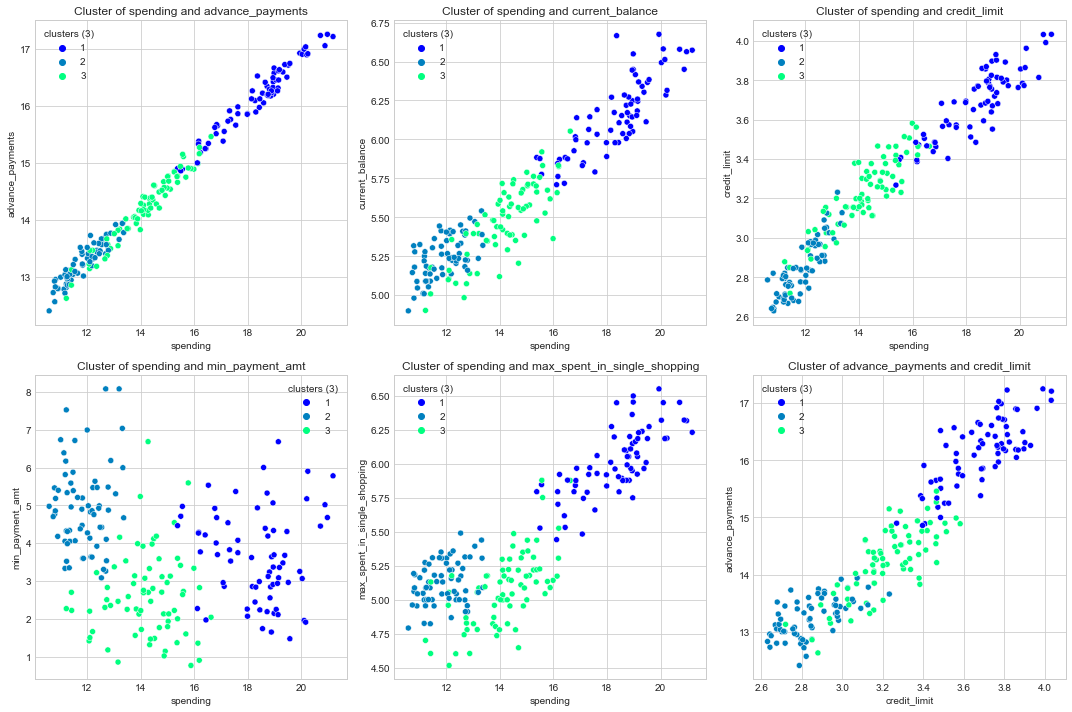

In [68]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters (3)', data=df_copy_w, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='clusters (3)', data=df_copy_w, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='clusters (3)', data=df_copy_w, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters (3)', data=df_copy_w, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters (3)', data=df_copy_w, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters (3)', data=df_copy_w, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit')
plt.tight_layout()
plt.savefig('scatter_clust.png', bbox_inches = 'tight')

- Cluster 1 has higher values for all variables as compared to other Clusters. We can say that Cluster 1 represents the best customer segment or higher class customers. Cluster 1 shows lower value for the variable 'min_payment_amt'. We can see from the scatter plot that the customers having the highest spendings in Cluster 1 are the ones making highest advance payments and also having highest credit card limit. These are the customers who have spent maximum amount in a single shopping.
- Cluster 2 has the lowest values for all variables as compared to other Clusters except for the variables 'min_payment_amt' and 'max_spent_in_single shopping'. We also observe that Cluster 2 has very low value for 'probability_of_full_payment' and 'credit_limit'. We can say that Cluster 2 represents low income customers and therefore less expenditure customer. The bank should be cautious before providing any loan to these customers. Customers in Cluster 2 are not having high spendings as compared to Cluster 1 and therefore they are having very low credit limit. These are the customers who make lowest advance payments. They have very high value for the variable ‘min_payment_amt’ i.e. average minimum amount paid by the customer while making payments for credit card bill purchases made monthly.

- Cluster 3 has intermediate values for all variables except 'min_payment_amt' and 'max_spent_in_single_shopping'. Cluster 3 represents middle class customers. The bank can provide some promotional advertisements or offers so that 'max_spent_in_single_shopping' can be increased. For customers in Cluster 3, highest spenders are the ones making highest advance payments but relatively less than Cluster 1 customers. They have high credit limit but can be higher as they are the potential customers who can move to best customer segment.


Following are the points observed after performing hierarchical clustering:
- we imported from the scientific python (submodule hierarchy), the two functions called as linkage and dendrogram.
- dendrogram is for visualisation, linkage is for computing the distances and merging the clusters from n to 1.
- First we created linkage using the Average Linkage method. This linkage method will store the various distances at which the n cluster are sequentially merged into a single cluster.
- Once we store the linkage information, the next step is to visualise the data. For this we will call the dendrogram function.
- In the begining, the dendrogram that is created is not truncated. We observe that dendrogram creates a partition for us and gives us a color code for the same. Total number of clusters that the dendrogram is suggesting to us is 3 with color code as orange, green and red.
- We then pass additional parameters which truncates the dendrogram. We pass a paramtere called as 'truncate_mode' which is set equal to 'lastp'. This will ensure that only the last 'p' clusters that are merged is shown to us within the visual. We first set the 'p' value as 20. We get a dendrogram which shows the last 20 merges. Every horizontal line is a merge. We repeat the step with 'p' value set to 10.
- On observing the dendrogram, we identify a cut-off point. We choose the cut-off where the jump or vertical lines should be of highest length.
- As a next step, from scientific python package we import fcluster. We use fcluster to form the clusters. The first parameter that we pass is the linkage type that stores the linkage heights value that is stored within this linkge type. Then we pass the 'criterion' as another parameter whose value is set to 'maxclust'. We also pass the maximum number of clusters. We choose number of clusters as 3. As a result of all these parameters the data will be split into 3 clusters.

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

### applying k_means clustering technique with number of clusters as 1 and random state 1

In [69]:
k_means = KMeans(n_clusters = 1, random_state= 1)

In [70]:
k_means.fit(scaled_df)

KMeans(n_clusters=1, random_state=1)

## Extracting the labels 

In [71]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [72]:
k_means.inertia_

1469.999999999999

### Choosing different number of clusters to analyse wss score

In [73]:
k_means = KMeans(n_clusters = 2, random_state = 1)

In [74]:
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [75]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [76]:
k_means.inertia_

659.14740095485

In [77]:
k_means = KMeans(n_clusters = 3, random_state = 1)

In [78]:
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [79]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2], dtype=int32)

In [80]:
k_means.inertia_

430.298481751223

### We can see that as we are increasing the number of clusters for k_means technique, the WSS score keeps on deacreasing. Now we will calculate WSS score for other values of K using Elbow Method

In [81]:
wss = []

In [82]:
for i in range(1, 11):
    KM = KMeans(n_clusters = i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [83]:
wss

[1469.999999999999,
 659.14740095485,
 430.283542020681,
 371.2217639268478,
 326.8518604976889,
 289.57111492850885,
 262.09435487341113,
 240.00842430784996,
 221.4731094910292,
 207.22467707836336]

In [84]:
wss_series = pd.DataFrame(data = wss, columns=['inertia'], index = range(0,10))

In [85]:
wss_series
dfi.export(wss_series,'wss_df.png')

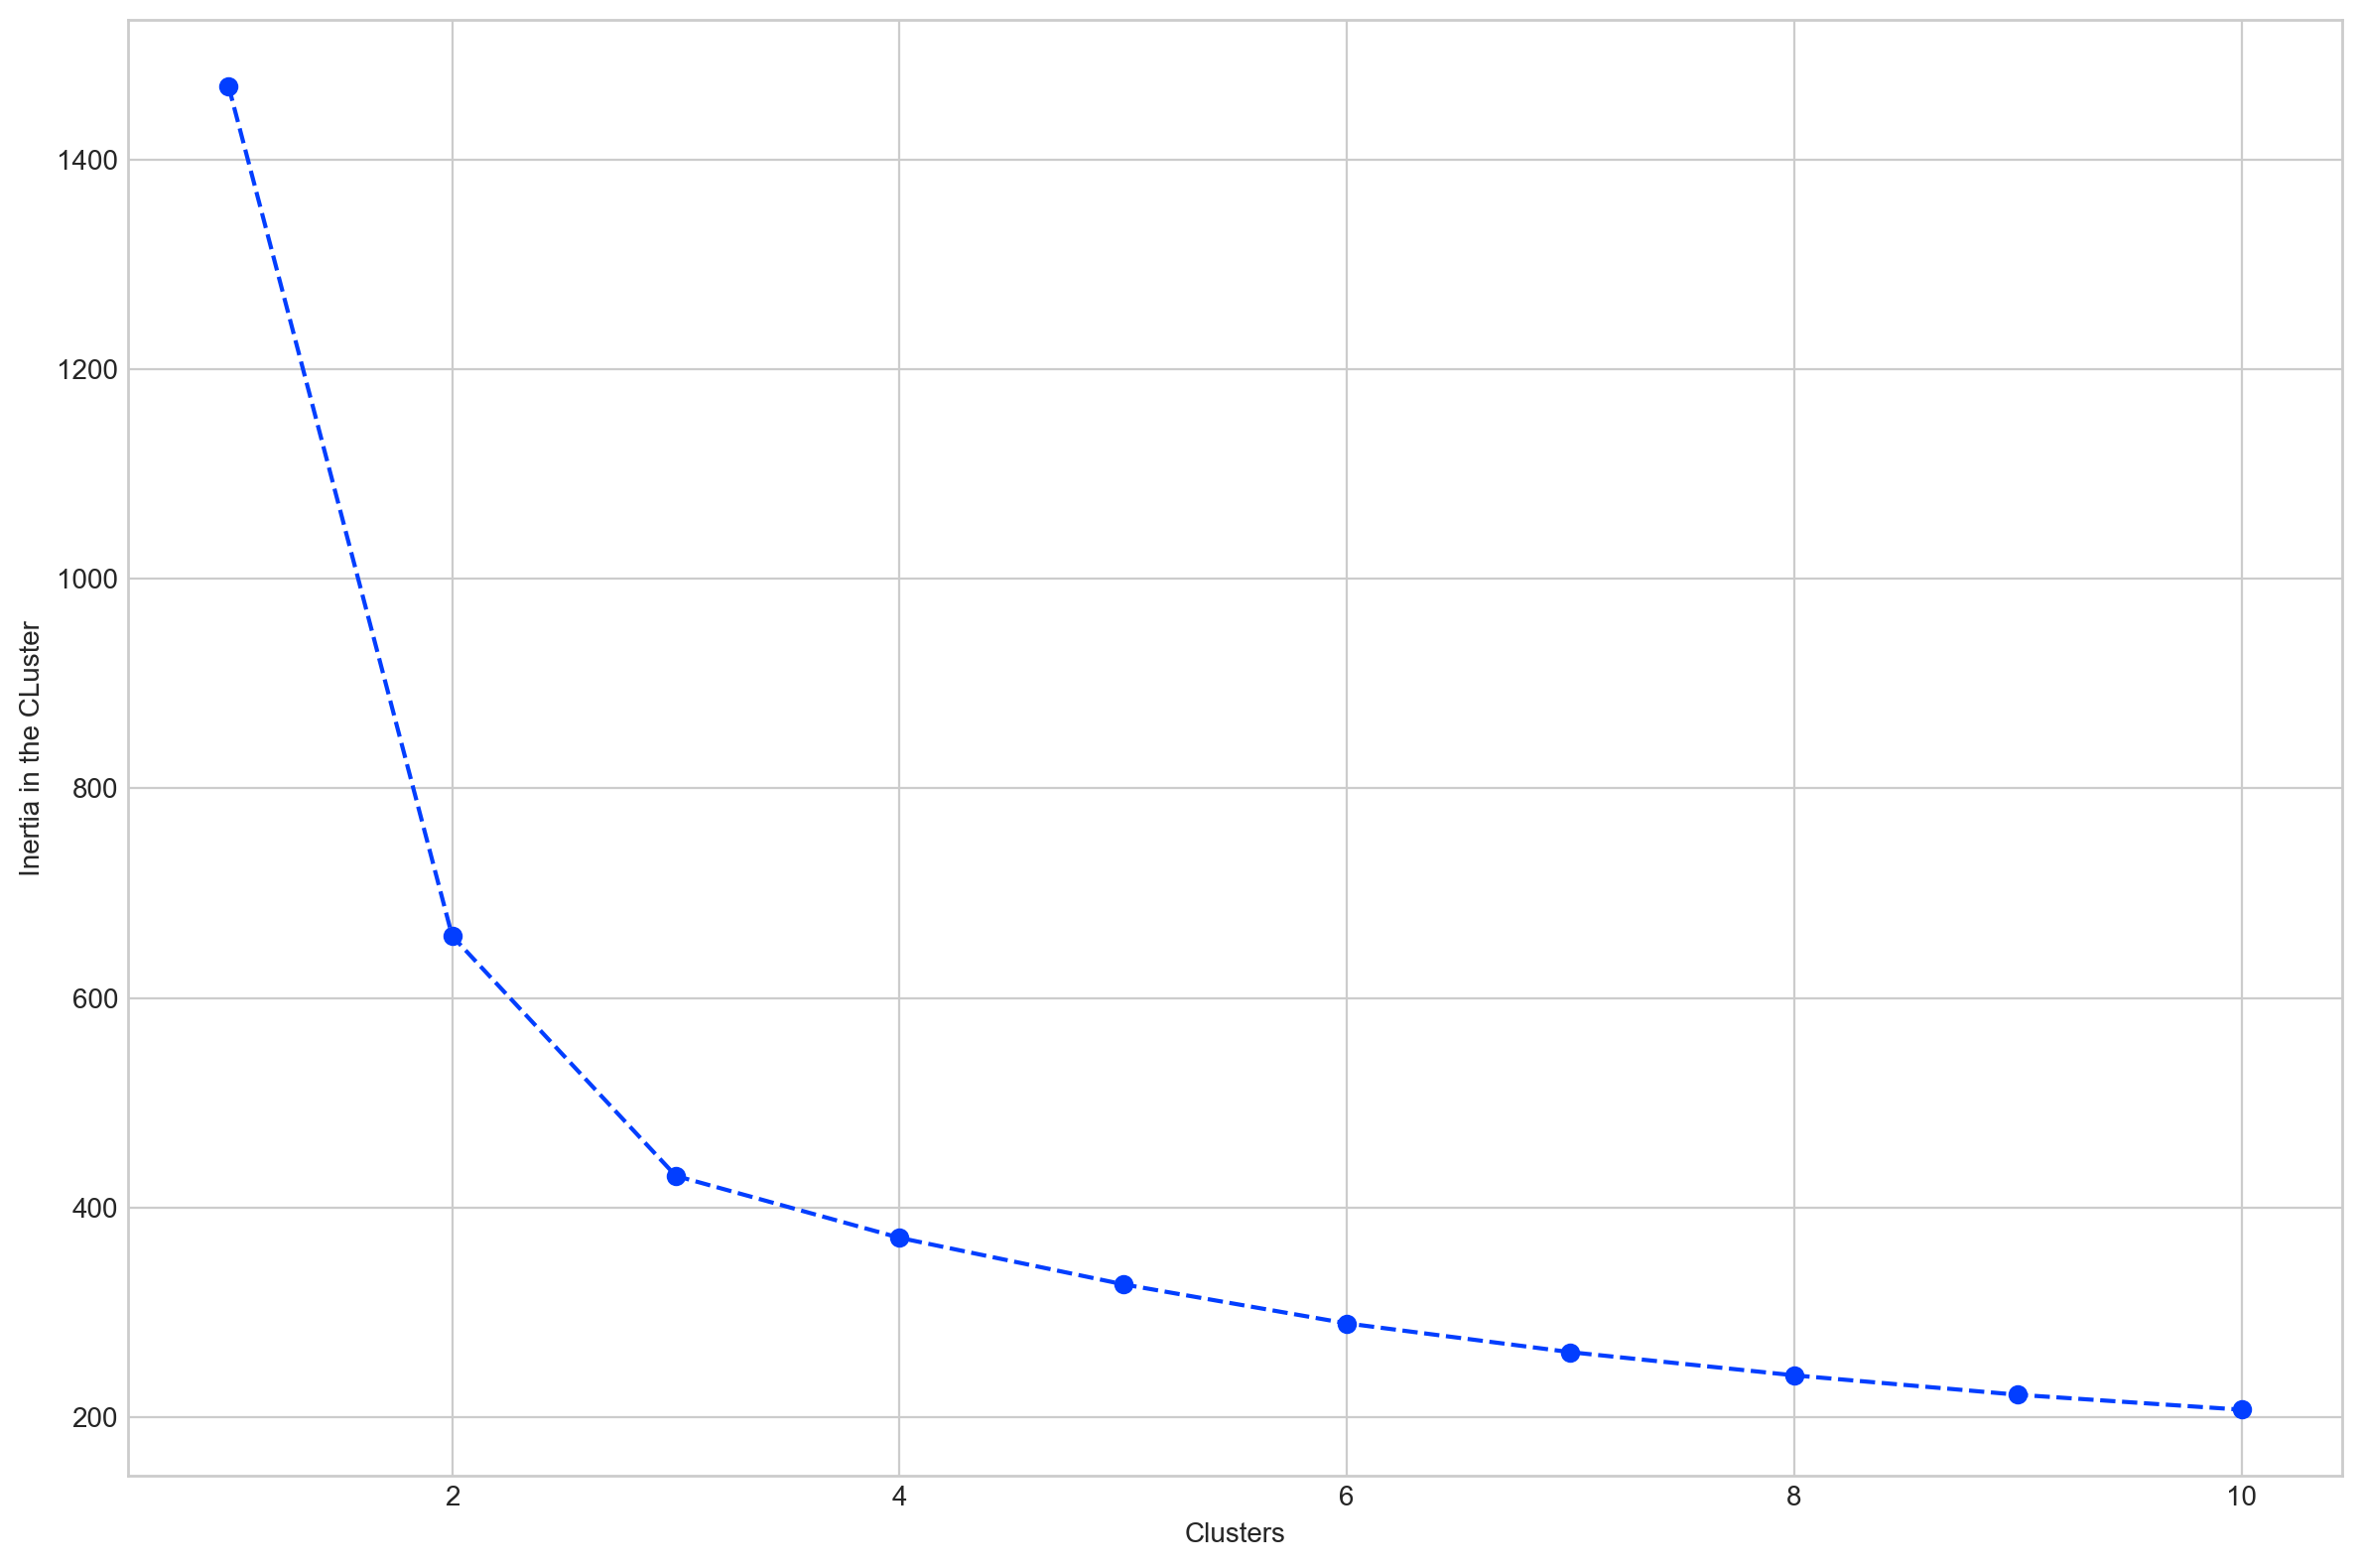

In [86]:
plt.figure(figsize = (12, 8), dpi = 200)
plt.xlabel('Clusters')
plt.ylabel('Inertia in the CLuster')
plt.plot(range(1, 11), wss, 'o--');
plt.tight_layout()
plt.savefig('clust_inertia.png', bbox_inches = 'tight')

- one of the greatest challenges is to understand and know beforehand how many clusters we require as an output prior to running the k means algorithm itself. 
- wss plot is within sum of squares plot. The within sum of sqaures for any cluster is the distance between the centroid and all observations which is squared and added up. This measure of wss is used to build a wss plot.
- In elbow plot we keep track of the wss value for a range of different values of k. We then look for a value where rate of reduction in WSS begins to decline. This signifies that adding an extra cluster is not obtaining enough clarity of cluster seperation to justify further increasing k.
- we will track the plot for where deacrease in wss begins to flatten out compared to increasing k values as it is not revealing more signals.

In [87]:
pd.Series(wss).diff()

0           NaN
1   -810.852599
2   -228.863859
3    -59.061778
4    -44.369903
5    -37.280746
6    -27.476760
7    -22.085931
8    -18.535315
9    -14.248432
dtype: float64

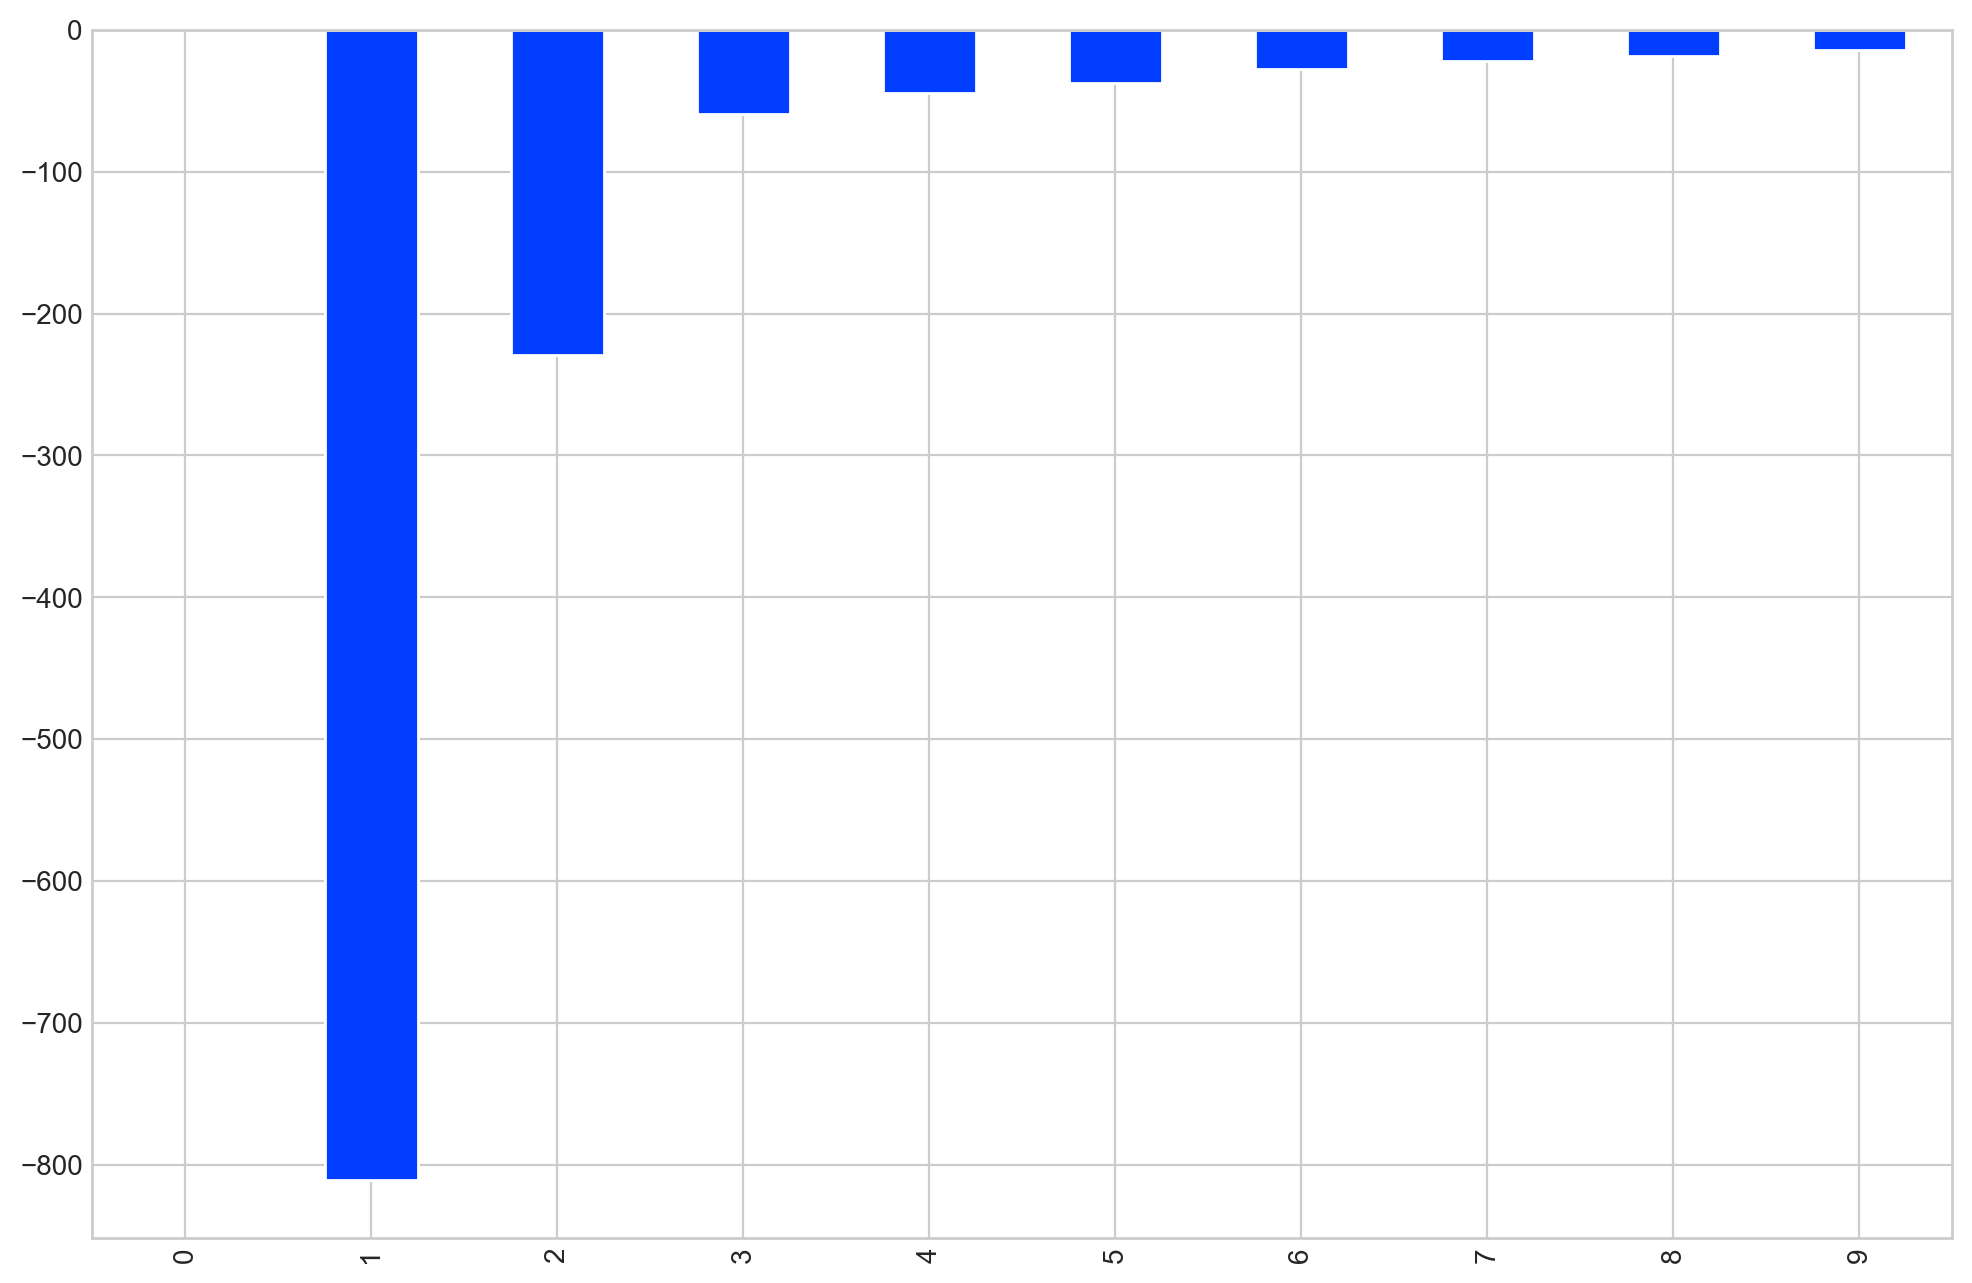

In [88]:
plt.figure(figsize = (12, 8), dpi = 200)
pd.Series(wss).diff().plot(kind = 'bar');

- From above graph it is clear that the major decline in wss is till the value 3. So the optimum number of clusters is 3. We will check the silhouette score for 3 as well as 4 clusters.

### Considering optimal number of clusters as 3

In [89]:
k_means_3 = KMeans(n_clusters = 3, random_state=1)
k_means_3.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [90]:
labels = k_means_3.labels_

In [91]:
k_means_df = df.copy()

In [92]:
k_means_df['clusters (3)'] = labels

In [93]:
k_means_df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                     0.875200            6.675   
1     15.99             14.89                     0.906400            5.363   
2     18.95             16.42                     0.882900            6.248   
3     10.83             12.96                     0.810588            5.278   
4     17.99             15.86                     0.899200            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters (3)  
0         3.763            3.252                         6.550             1  
1         3.582            3.336                         5.144             2  
2         3.755            3.368                         6.148             1  
3         2.641            5.182                         5.185             0  
4         3.694            2.068                         5.837             1

## Calculating The Silhouette score

In [94]:
print('Silhouette score using 3 clusters is', silhouette_score(scaled_df, labels))

Silhouette score using 3 clusters is 0.4008059221522216


In [95]:
sil_width = silhouette_samples(scaled_df, labels)

In [96]:
k_means_df['sil_width'] = sil_width

In [97]:
k_df_sample = k_means_df.head()

In [98]:
dfi.export(k_df_sample,'k_means_df.png')

- We use the Silhouette score to find whether the mapping of each customer ID to a cluster is correct or not.
- The Silhoutte score function computes the average of all the silhouette widths. The Silhoutte sample function computes the silhouette widths for each and every row. These two modules are available in sklearn.metrics submodule
- The input parameters required for running the silhouette score as well as silhouette sample are 
the scaled data and the label mapping.
- The silhouette score is 0.400805 which is on the positive side, we can say that this is a well distinguished set of clusters. So the 3 clusters that is created on an average have a silhouette score of 0.400805.
- for calculating the individual silhouette widths we can call the silhouette_sample function. The input parameters are the same. 

## Considering optimal number of clusters as 4

In [99]:
k_means_4 = KMeans(n_clusters=4, random_state=1)

In [100]:
k_means_4.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [101]:
labels4 = k_means_4.labels_

## Calculating The Silhouette score

In [102]:
print('Silhouette score using 3 clusters is', silhouette_score(scaled_df, labels4))

Silhouette score using 3 clusters is 0.3373662527862716


- silhouette score is better for 3 clusters than for 4 clusters. So final clusters will be 3

### Cluster profiling

In [103]:
pd.Series(labels).value_counts()

0    72
2    71
1    67
dtype: int64

In [104]:
clust_profile = k_means_df.groupby('clusters (3)').mean()
clust_profile

spending  advance_payments  probability_of_full_payment  \
clusters (3)                                                             
0             11.856944         13.247778                     0.848330   
1             18.495373         16.203433                     0.884210   
2             14.437887         14.337746                     0.881597   

              current_balance  credit_limit  min_payment_amt  \
clusters (3)                                                   
0                    5.231750      2.849542         4.733892   
1                    6.175687      3.697537         3.632373   
2                    5.514577      3.259225         2.707341   

              max_spent_in_single_shopping  sil_width  
clusters (3)                                           
0                                 5.101722   0.399556  
1                                 6.041701   0.468077  
2                                 5.120803   0.338593

In [105]:
clust_profile['freq'] = k_means_df['clusters (3)'].value_counts().sort_index()

In [106]:
clust_profile

spending  advance_payments  probability_of_full_payment  \
clusters (3)                                                             
0             11.856944         13.247778                     0.848330   
1             18.495373         16.203433                     0.884210   
2             14.437887         14.337746                     0.881597   

              current_balance  credit_limit  min_payment_amt  \
clusters (3)                                                   
0                    5.231750      2.849542         4.733892   
1                    6.175687      3.697537         3.632373   
2                    5.514577      3.259225         2.707341   

              max_spent_in_single_shopping  sil_width  freq  
clusters (3)                                                 
0                                 5.101722   0.399556    72  
1                                 6.041701   0.468077    67  
2                                 5.120803   0.338593    71

In [107]:
dfi.export(clust_profile, 'clust_profile_k.png')

<ipython-input-108-047c3dabfa16>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_method" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('scatter_clust_k_means.png', bbox_method = 'tight')


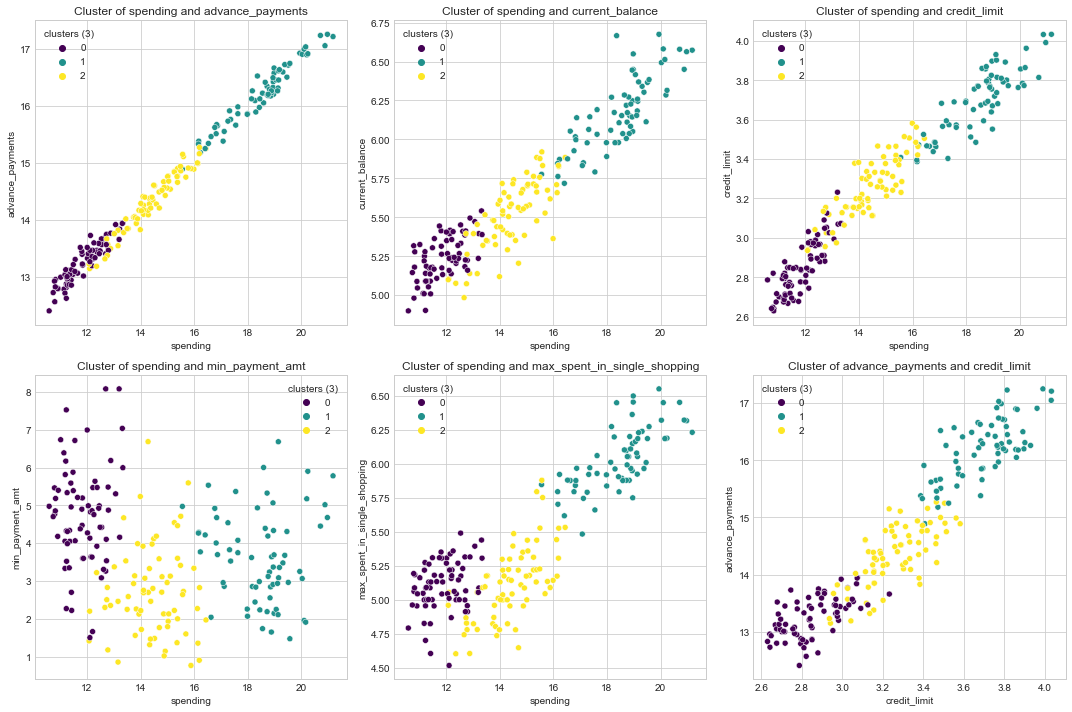

In [108]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters (3)', data=k_means_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='clusters (3)', data=k_means_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='clusters (3)', data=k_means_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters (3)', data=k_means_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters (3)', data=k_means_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters (3)', data=k_means_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit')
plt.tight_layout()
plt.savefig('scatter_clust_k_means.png', bbox_method = 'tight')

- We have performed K-Means clustering on the data using the distance metric as 'Euclidian'. 
- Based on wss (Elbow plot) and silhouette score, the optimal number of clusters is 3. After 3 cluster the difference in inertia value begins to flatten out.
- Silhouette score was highest for 3 clusters.
- Clusters are seperated in the following manner:
    - Cluster 0 are low spenders
    - Cluster 1 are high spenders
    - Cluster 2 are medium spenders

  # Problem 2: CART-RF-ANN
 ## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Data Dictionary
- Target: Claim Status (Claimed)
- Code of tour firm (Agency_Code)
- Type of tour insurance firms (Type)
- Distribution channel of tour insurance agencies (Channel)
- Name of the tour insurance products (Product)
- Duration of the tour (Duration in days)
- Destination of the tour (Destination)
- Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
- The commission received for tour insurance firm (Commission is in percentage of sales)
- Age of insured (Age)

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)

In [109]:
ins_df = pd.read_csv('insurance_part2_data.csv')

### Checking the first 5 rows of the data (Sample of the data)

In [110]:
sample_ins_df = ins_df.head()
sample_ins_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

In [111]:
dfi.export(sample_ins_df,'sample_ins.png')

### Checking the shape of the data

In [112]:
ins_df.shape

(3000, 10)

### Checking and gathering more Information about the data

In [113]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


## Checking for missing values

In [114]:
ins_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Checking for duplicate values

In [115]:
ins_df.duplicated().sum()

139

In [116]:
dup = ins_df.duplicated()

In [117]:
ins_df[dup].head(20)

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
63    30         C2B       Airlines     Yes       15.0  Online        27   
329   36         EPX  Travel Agency      No        0.0  Online         5   
407   36         EPX  Travel Agency      No        0.0  Online        11   
411   35         EPX  Travel Agency      No        0.0  Online         2   
422   36         EPX  Travel Agency      No        0.0  Online         5   
473   36         EPX  Travel Agency      No        0.0  Online        26   
524   36         EPX  Travel Agency      No        0.0  Online         3   
540   33         C2B       Airlines     Yes       54.0  Online       365   
567   36         EPX  Travel Agency      No        0.0  Online        19   
569   36         EPX  Travel Agency      No        0.0  Online        14   
594   48         C2B       Airlines     Yes       54.0  Online       367   
622   36         EPX  Travel Agency      No        0.0  Online         7   
722   36         EPX  Travel Agency      No        0.0  Online         5   
747   36         EPX  Travel Agency      No        0.0  Online         3   
762   36         EPX  Travel Agency      No        0.0  Online         3   
774   36         EPX  Travel Agency      No        0.0  Online        34   
788   36         EPX  Travel Agency      No        0.0  Online         6   
808   36         EPX  Travel Agency      No        0.0  Online         8   
834   36         EPX  Travel Agency      No        0.0  Online         2   
854   36         EPX  Travel Agency      No        0.0  Online        16   

     Sales       Product Name Destination  
63    60.0        Bronze Plan        ASIA  
329   20.0    Customised Plan        ASIA  
407   19.0  Cancellation Plan        ASIA  
411   20.0    Customised Plan        ASIA  
422   20.0    Customised Plan        ASIA  
473   24.0    Customised Plan        ASIA  
524   10.0  Cancellation Plan        ASIA  
540  216.0        Silver Plan        ASIA  
567   20.0    Customised Plan        ASIA  
569   20.0    Customised Plan        ASIA  
594  216.0        Silver Plan        ASIA  
622  112.0    Customised Plan        ASIA  
722   10.0  Cancellation Plan        ASIA  
747   20.0    Customised Plan        ASIA  
762   10.0  Cancellation Plan        ASIA  
774   20.0    Customised Plan        ASIA  
788   10.0  Cancellation Plan        ASIA  
808   20.0    Customised Plan        ASIA  
834   20.0    Customised Plan        ASIA  
854   80.0  Cancellation Plan        ASIA

We are not removing the duplicates as their are no unique identifiers given. so the duplicated data can belong to different customers as it is possible that a travel company can sell the same kind of tour package to similar demography. 

### Describing the Data

In [118]:
ins_df_desc = ins_df.describe(include = 'all').T
ins_df_desc

count unique              top  freq       mean         std  \
Age           3000.0    NaN              NaN   NaN     38.091   10.463518   
Agency_Code     3000      4              EPX  1365        NaN         NaN   
Type            3000      2    Travel Agency  1837        NaN         NaN   
Claimed         3000      2               No  2076        NaN         NaN   
Commision     3000.0    NaN              NaN   NaN  14.529203   25.481455   
Channel         3000      2           Online  2954        NaN         NaN   
Duration      3000.0    NaN              NaN   NaN  70.001333  134.053313   
Sales         3000.0    NaN              NaN   NaN  60.249913   70.733954   
Product Name    3000      5  Customised Plan  1136        NaN         NaN   
Destination     3000      3             ASIA  2465        NaN         NaN   

              min   25%   50%     75%     max  
Age           8.0  32.0  36.0    42.0    84.0  
Agency_Code   NaN   NaN   NaN     NaN     NaN  
Type          NaN   NaN   NaN     NaN     NaN  
Claimed       NaN   NaN   NaN     NaN     NaN  
Commision     0.0   0.0  4.63  17.235  210.21  
Channel       NaN   NaN   NaN     NaN     NaN  
Duration     -1.0  11.0  26.5    63.0  4580.0  
Sales         0.0  20.0  33.0    69.0   539.0  
Product Name  NaN   NaN   NaN     NaN     NaN  
Destination   NaN   NaN   NaN     NaN     NaN

In [119]:
dfi.export(ins_df_desc, 'ins_df_desc.png')

### Treating bad data

In [120]:
ins_df[ins_df['Duration'] == -1]

Age Agency_Code      Type Claimed  Commision Channel  Duration  Sales  \
1508   25         JZI  Airlines      No        6.3  Online        -1   18.0   

     Product Name Destination  
1508  Bronze Plan        ASIA

since the variable 'Duration' has outliers, we can replace the error value of -1 by the median value of 'Duration' has median is not affected by outliers.

In [121]:
ins_df['Duration'] = ins_df['Duration'].replace(to_replace= -1, value = ins_df['Duration'].median() )

In [122]:
ins_df.iloc[[1508]]

Age Agency_Code      Type Claimed  Commision Channel  Duration  Sales  \
1508   25         JZI  Airlines      No        6.3  Online      26.5   18.0   

     Product Name Destination  
1508  Bronze Plan        ASIA

### Univariate Analysis

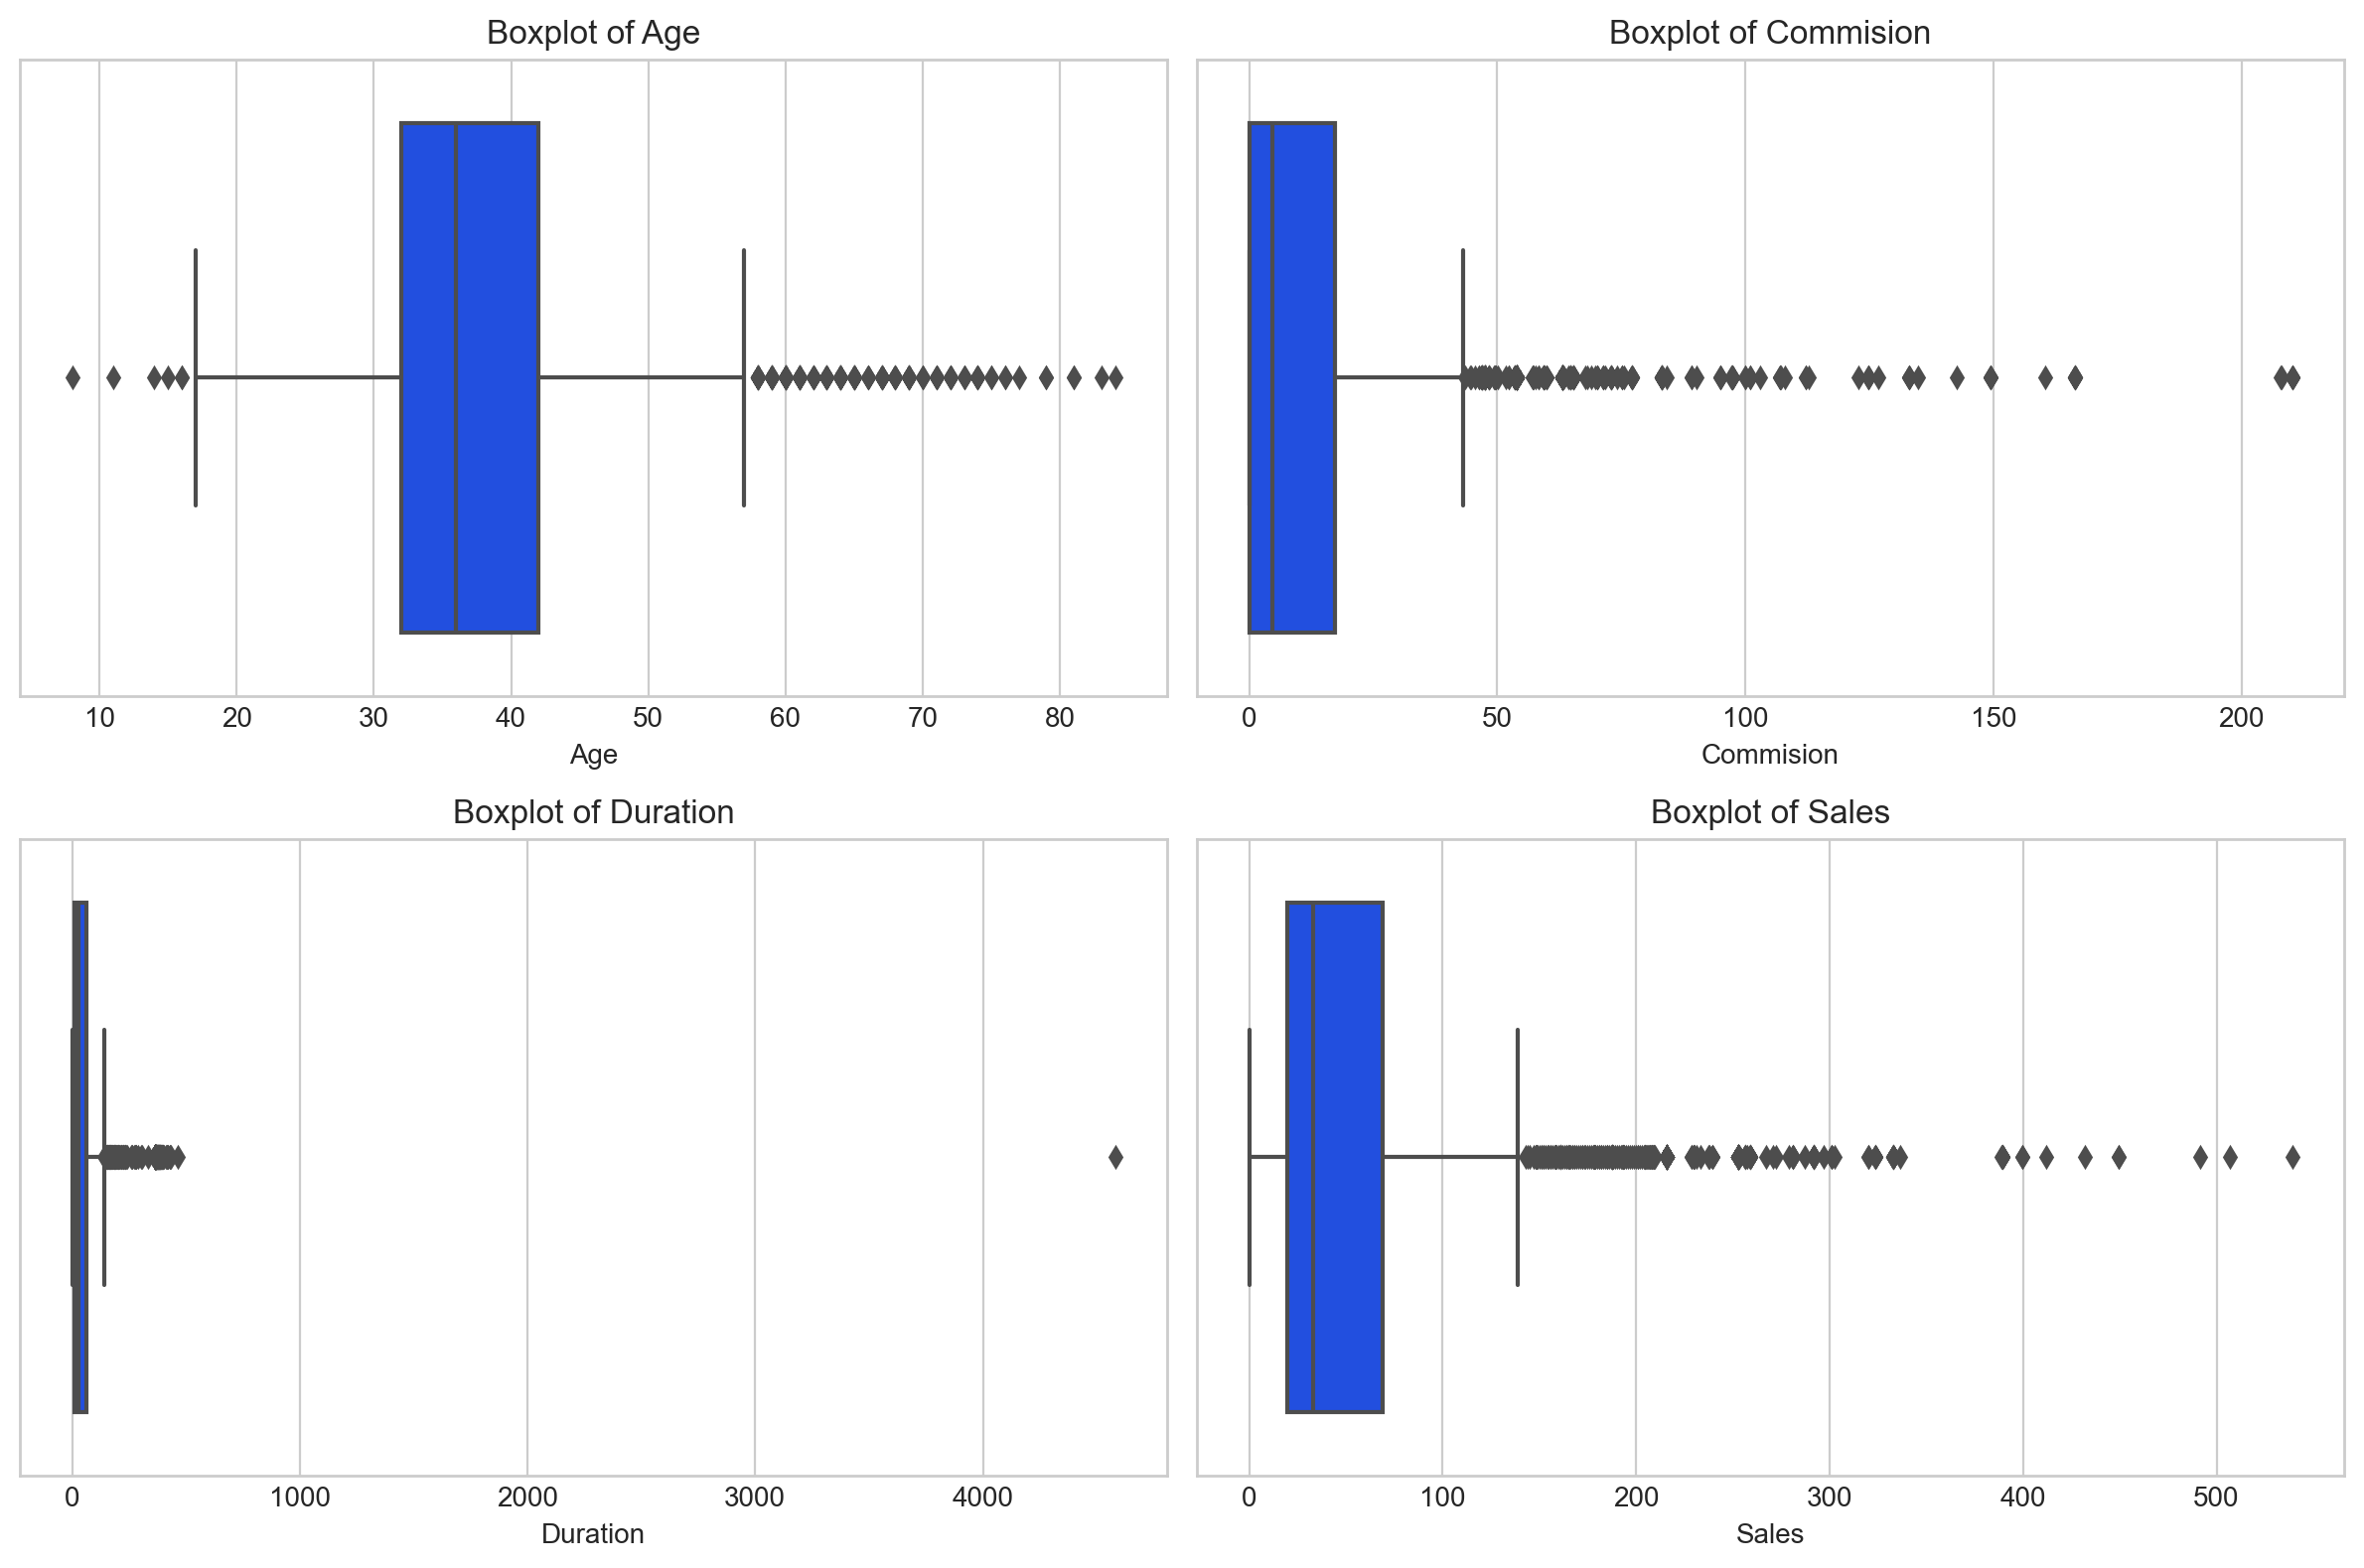

In [123]:

plt.figure(figsize = (12, 8), dpi = 200)
i = 0
for column in ins_df.columns:
    if ins_df[column].dtype in ['int64', 'float64']:
        i = i+1
        plt.subplot(2,2,i)
        plt.title(f'Boxplot of {column}')
        sns.boxplot(data = ins_df, x = column)
        plt.tight_layout()
        plt.savefig('boxplot_ins.png')

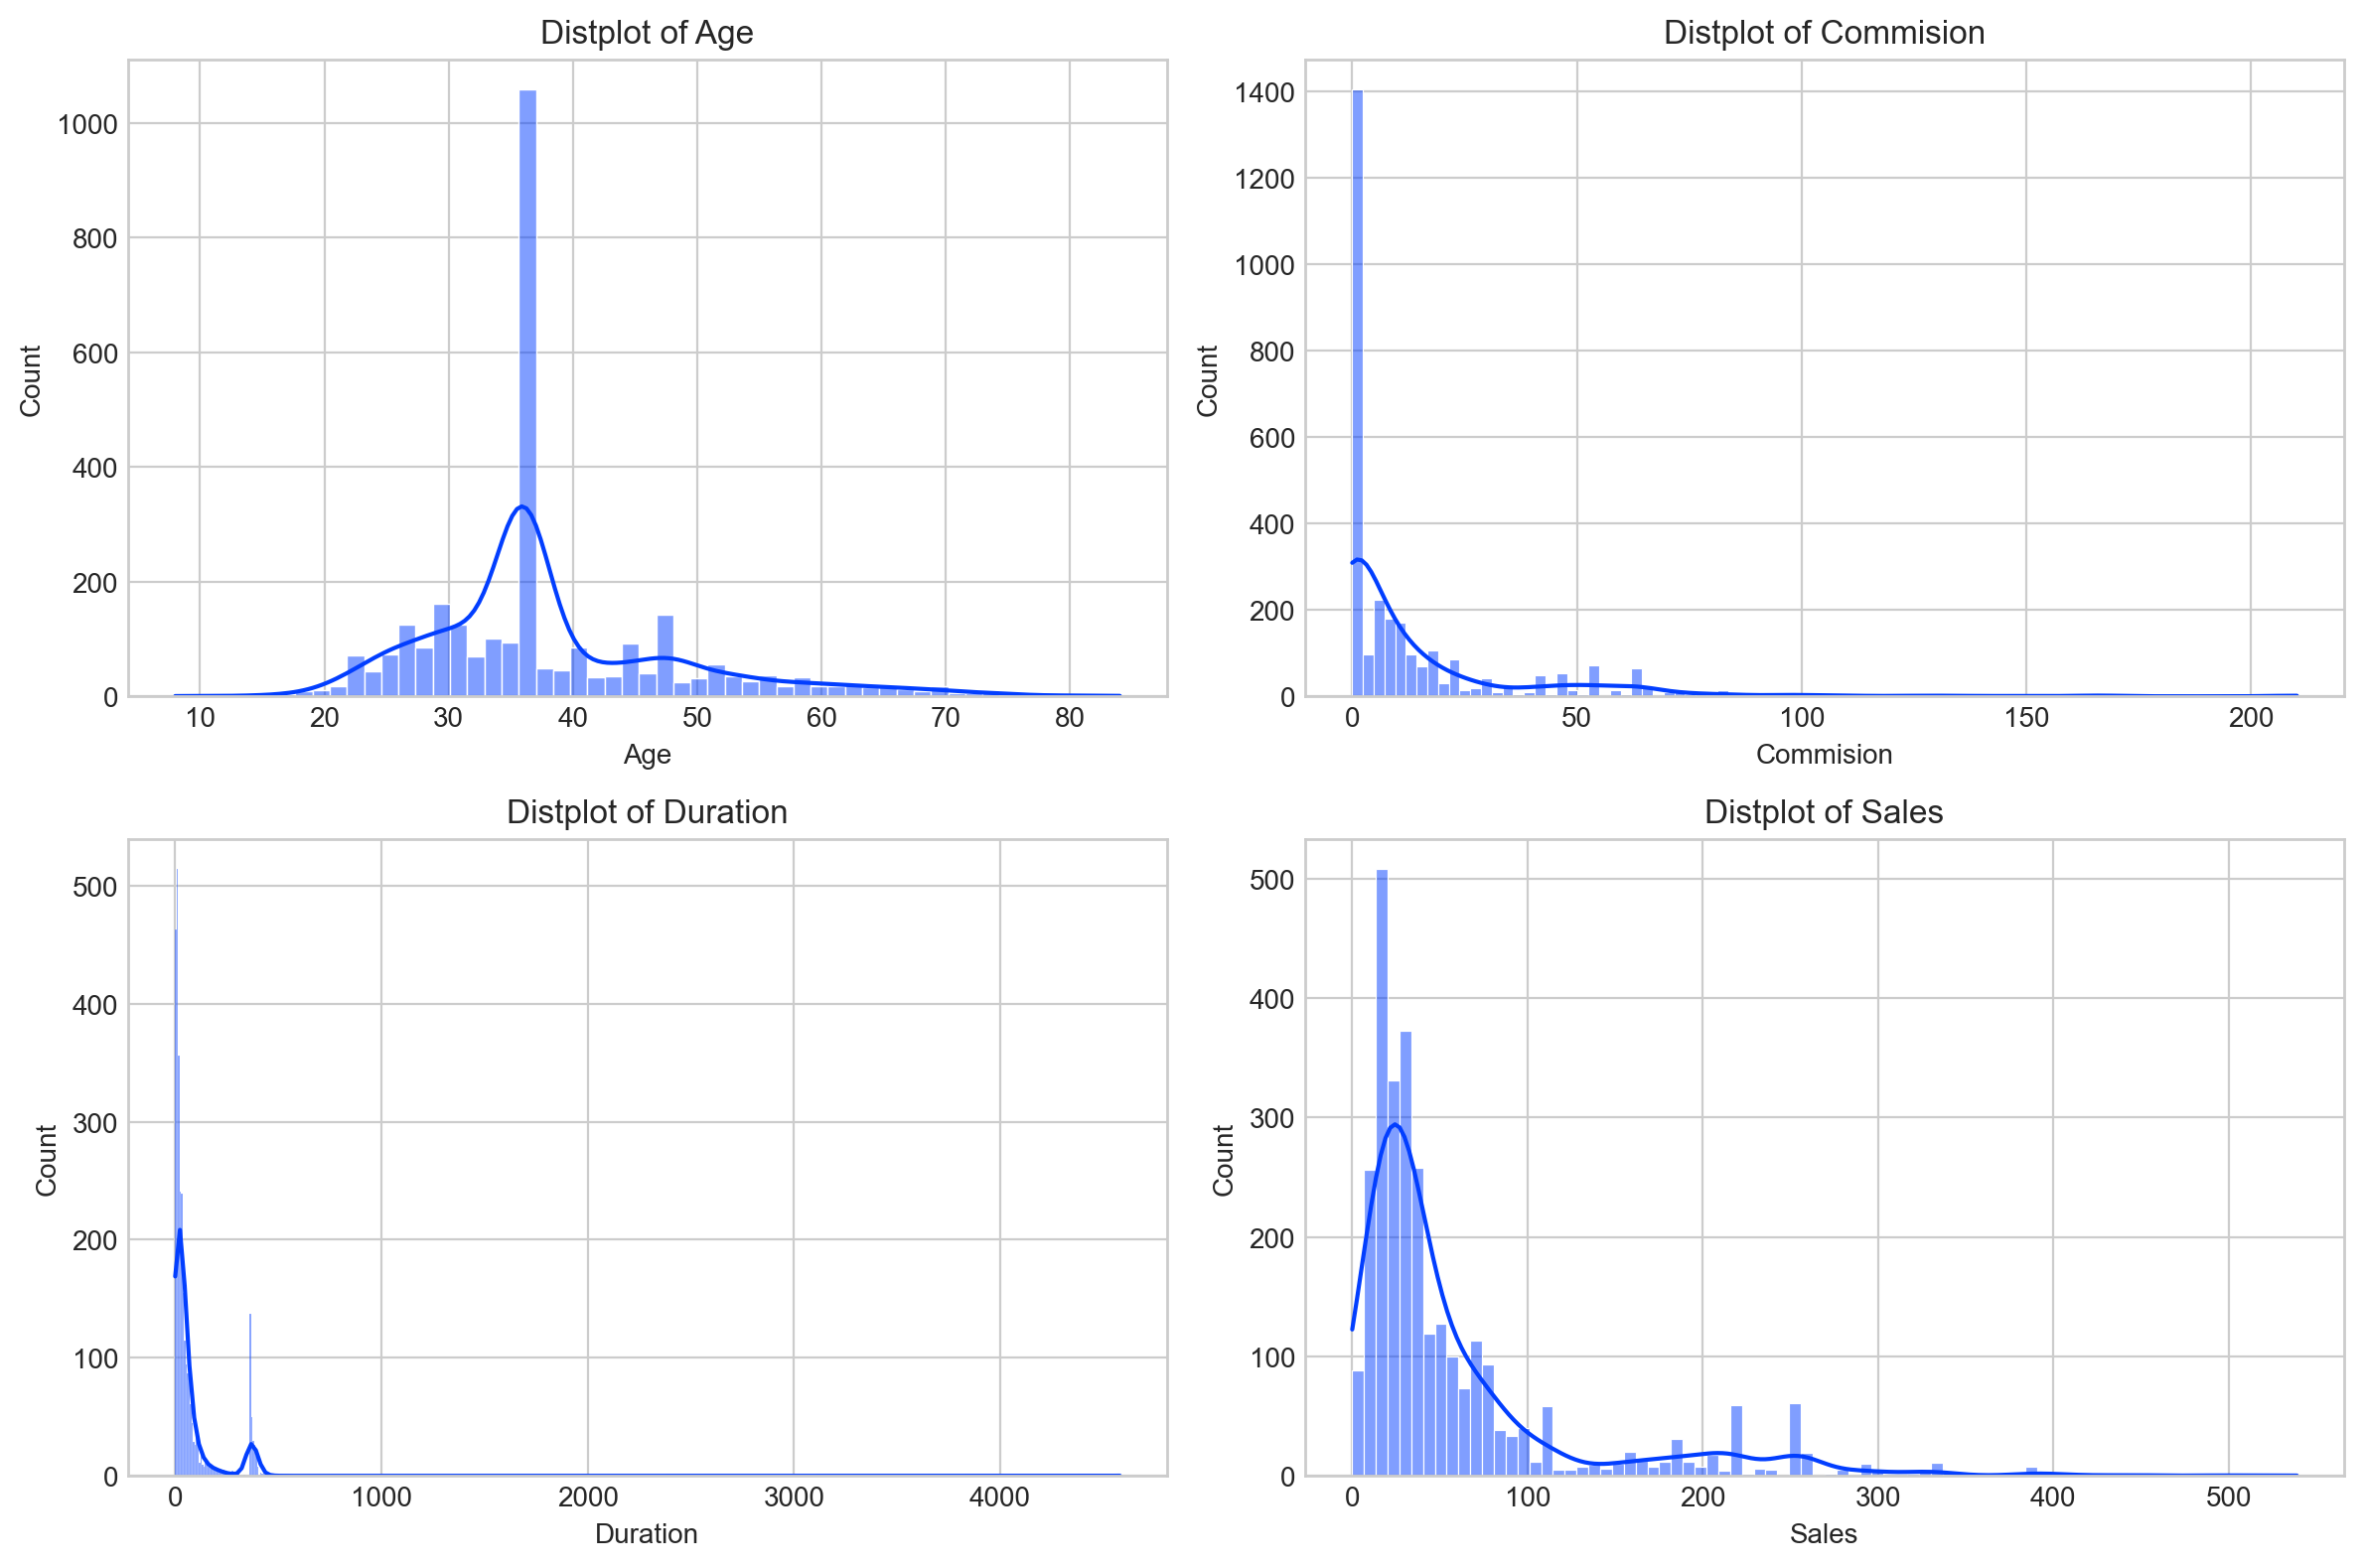

In [124]:
plt.figure(figsize = (12, 8), dpi = 200)
i = 0
for column in ins_df.columns:
    if ins_df[column].dtype in ['int64', 'float64']:
        i = i+1
        plt.subplot(2,2,i)
        plt.title(f'Distplot of {column}')
        sns.histplot(x = ins_df[column], kde = True)
        plt.tight_layout()
        plt.savefig('displot_ins.png')

In [125]:
ins_df.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [126]:
ins_df.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

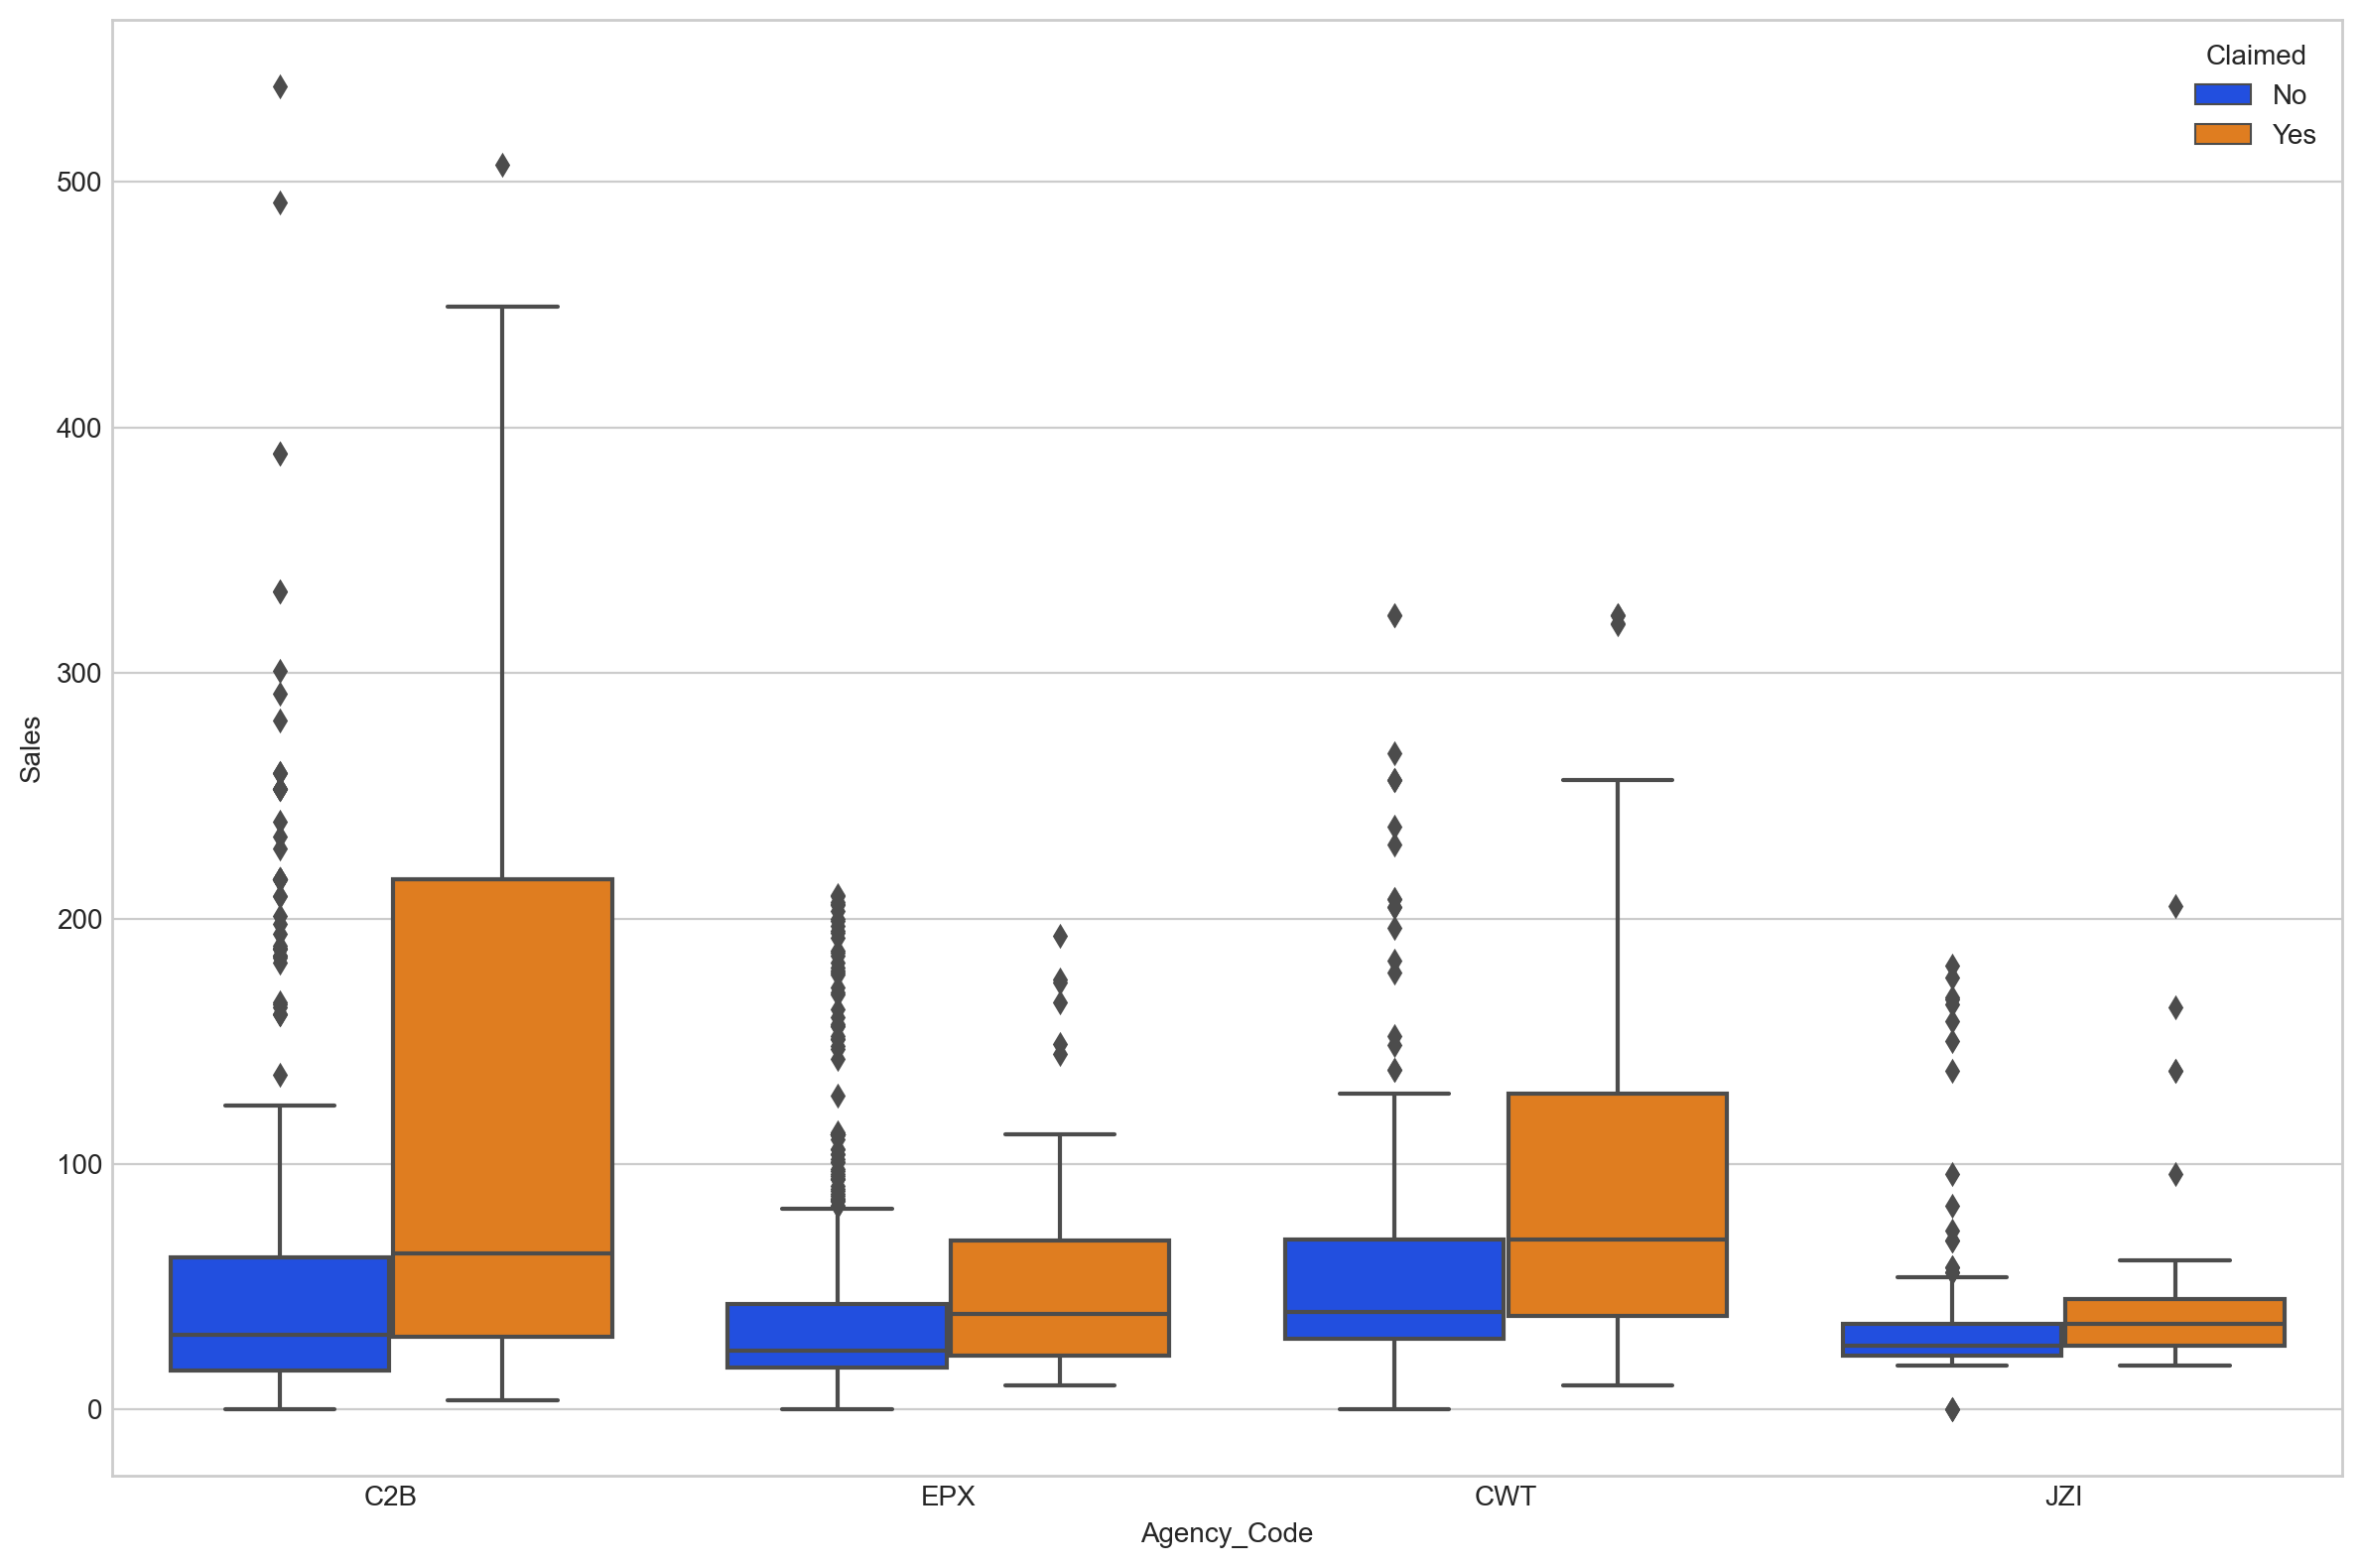

In [127]:
plt.figure(figsize = (12,8), dpi = 200)
sns.boxplot(data = ins_df, x = 'Agency_Code', y = 'Sales', hue = 'Claimed')
plt.tight_layout()
plt.savefig('boxplot_Agency_code_claimed.png')

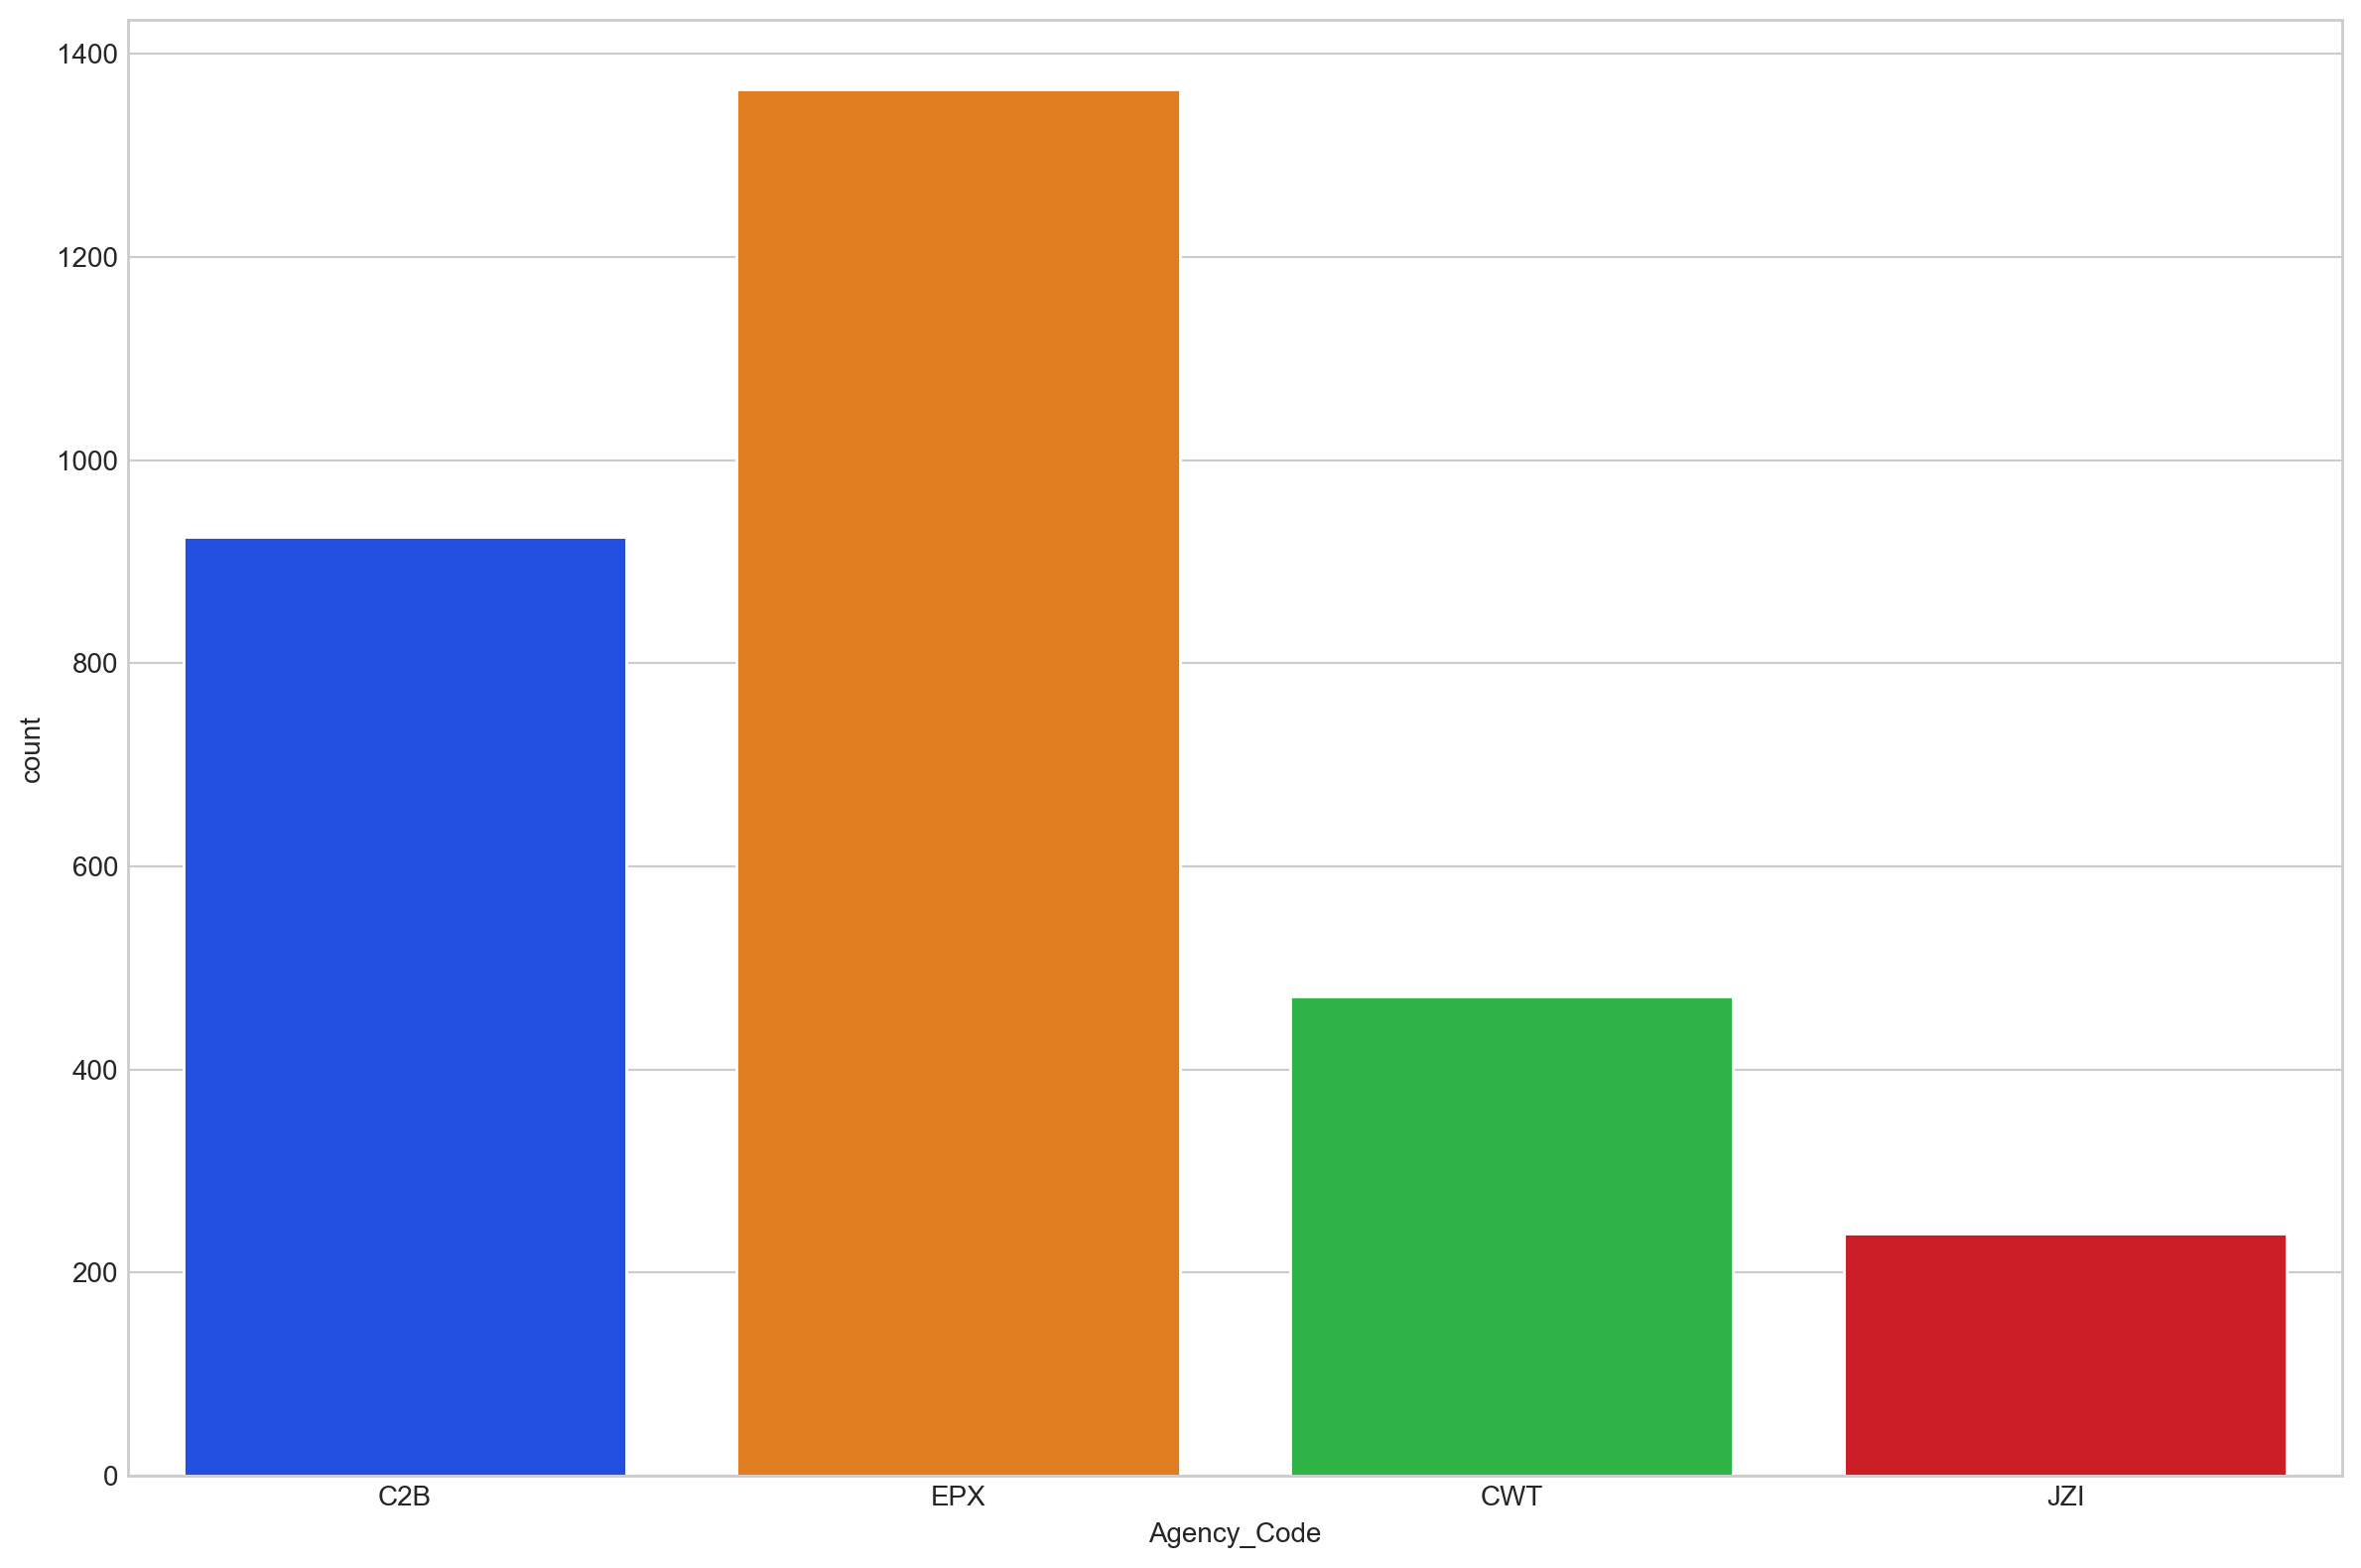

In [128]:
plt.figure(figsize = (12,8), dpi = 200)
sns.countplot(data = ins_df, x = 'Agency_Code')
plt.tight_layout()
plt.savefig('countplot_Agency_code.png')

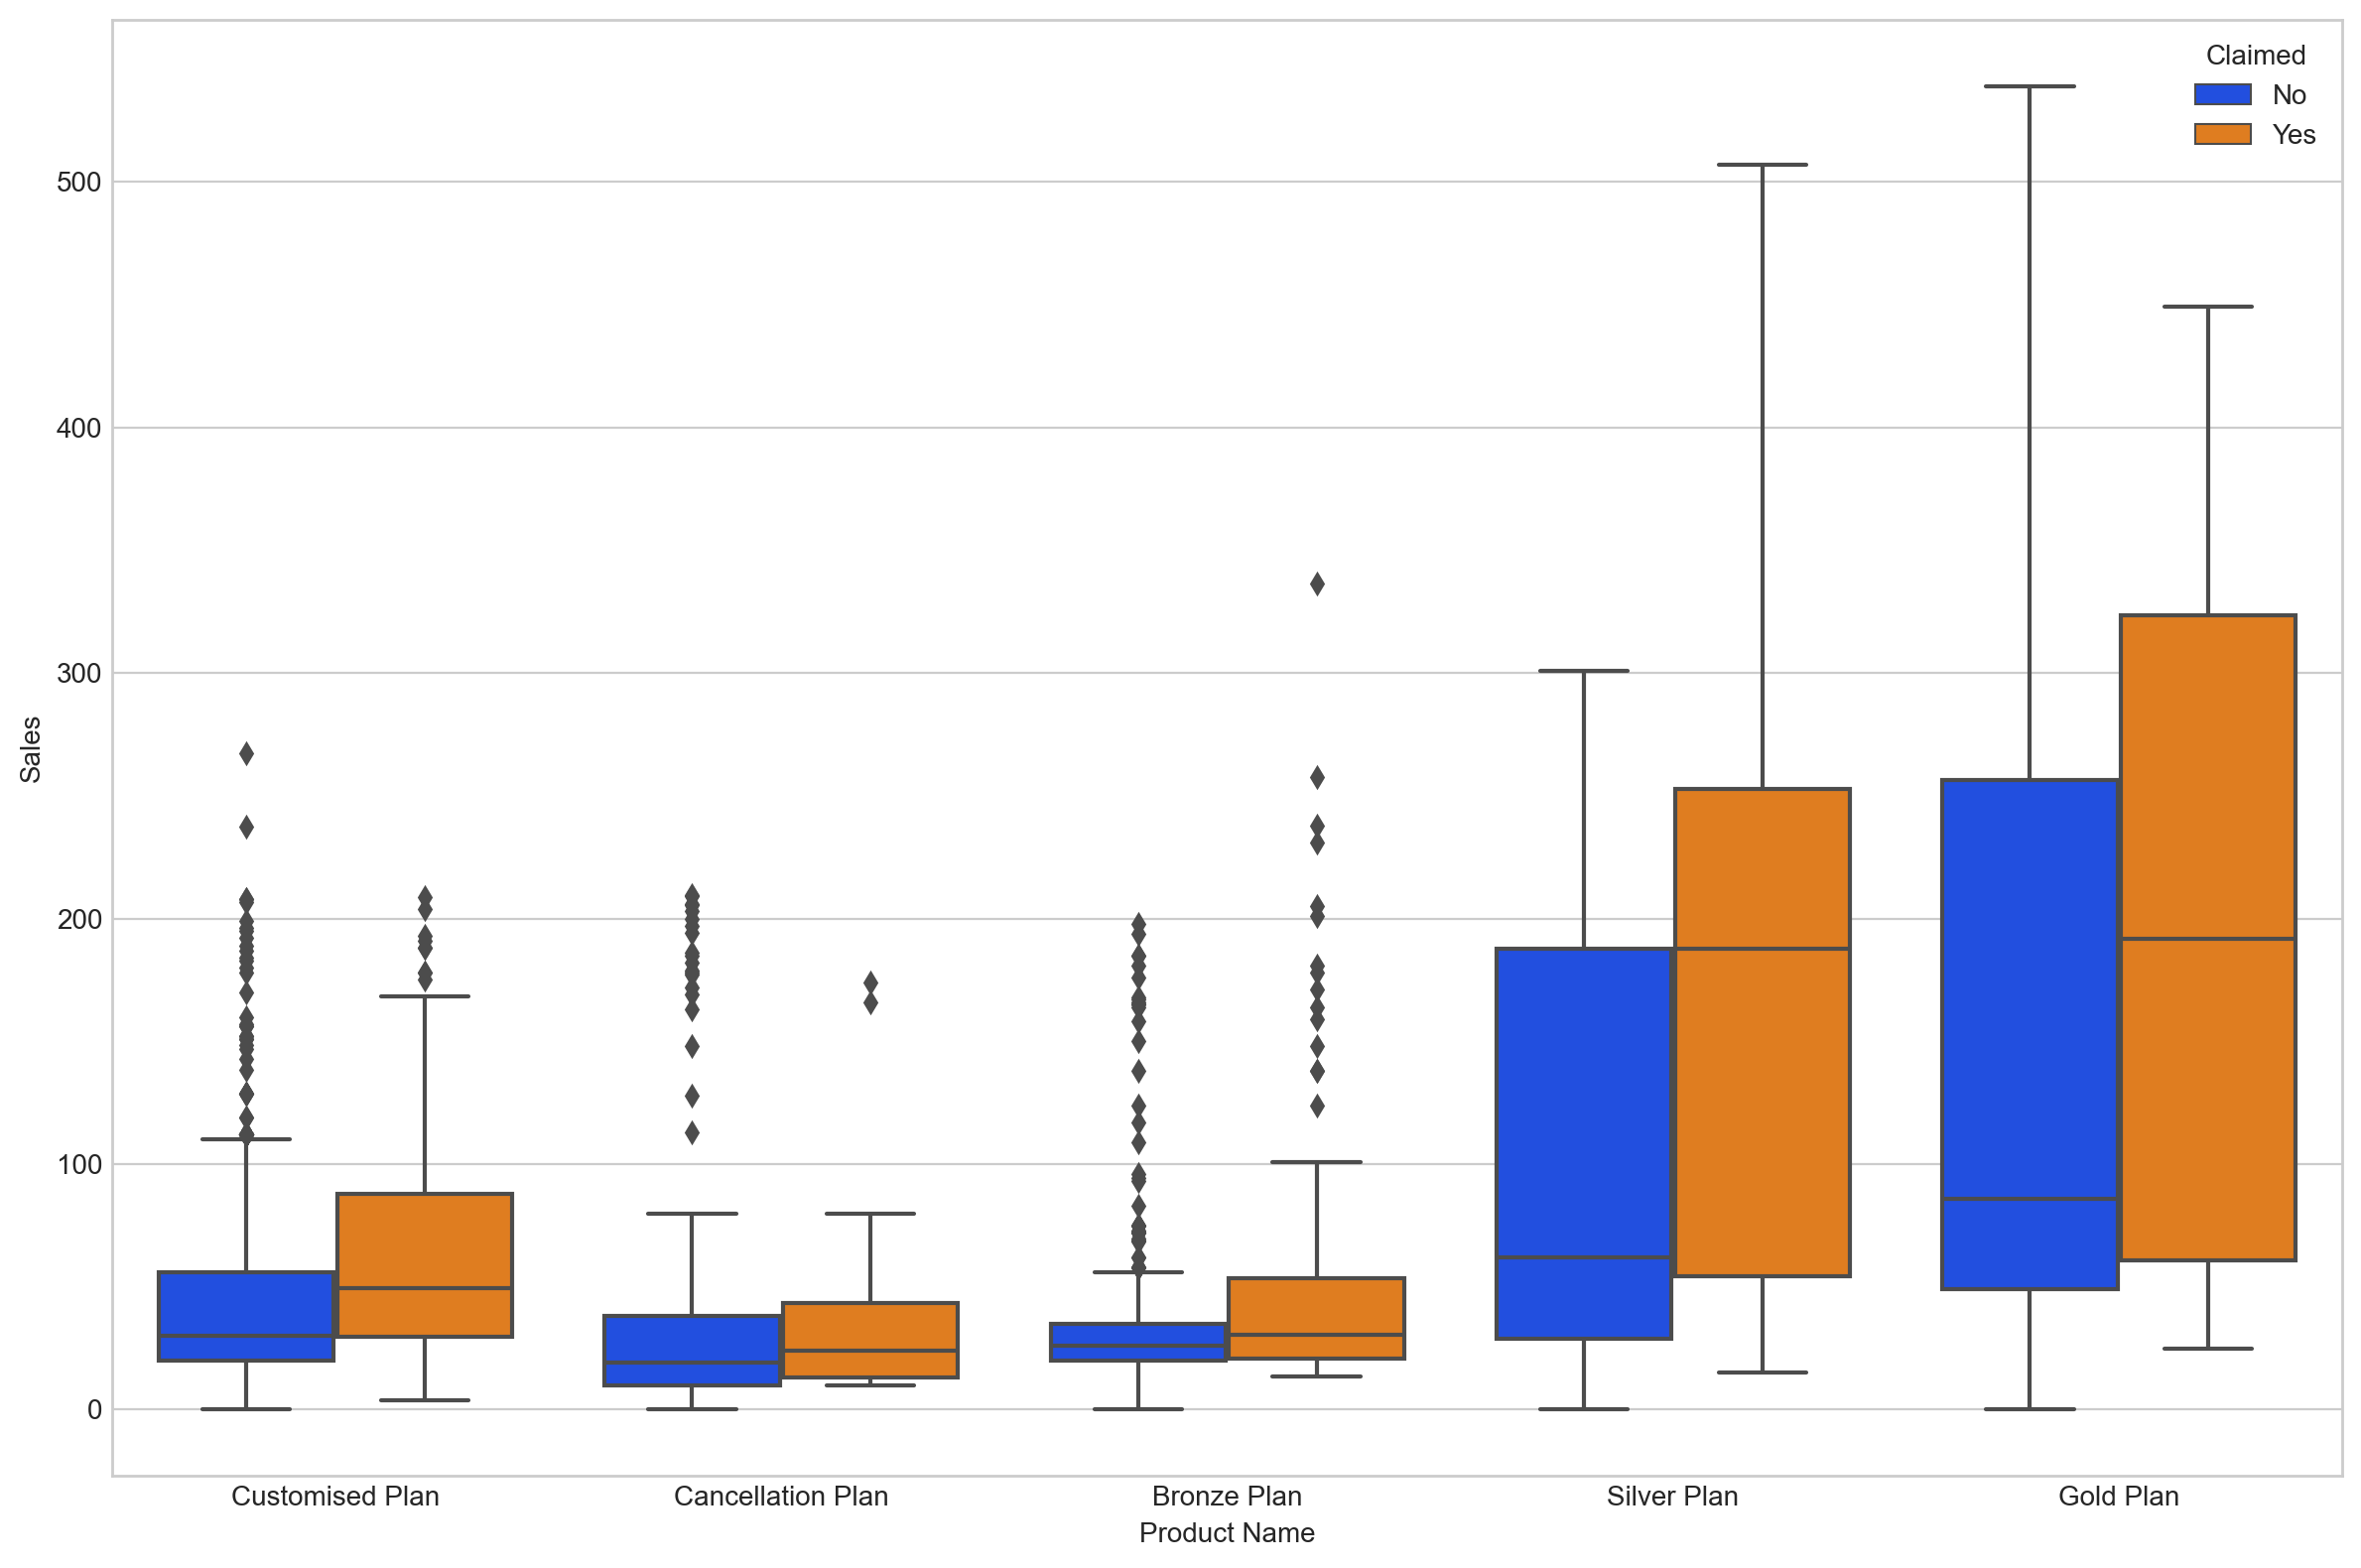

In [129]:
plt.figure(figsize = (12,8), dpi = 200)
sns.boxplot(data = ins_df, x = 'Product Name', y = 'Sales', hue = 'Claimed')
plt.tight_layout()
plt.savefig('boxplot_Product_claimed.png')

In [130]:
plt.figure(figsize = (12,8), dpi = 200)
sns.countplot(data = ins_df, x = 'Product Name')
plt.tight_layout()
plt.savefig('countplot_Product.png')

In [131]:
plt.figure(figsize = (12,8), dpi = 200)
sns.countplot(data = ins_df, x = 'Type')
plt.tight_layout()
plt.savefig('countplot_Type.png')

In [132]:
plt.figure(figsize = (12,8), dpi = 200)
sns.boxplot(data = ins_df, x = 'Type', y = 'Sales', hue = 'Claimed')
plt.tight_layout()
plt.savefig('boxplot_Type.png')

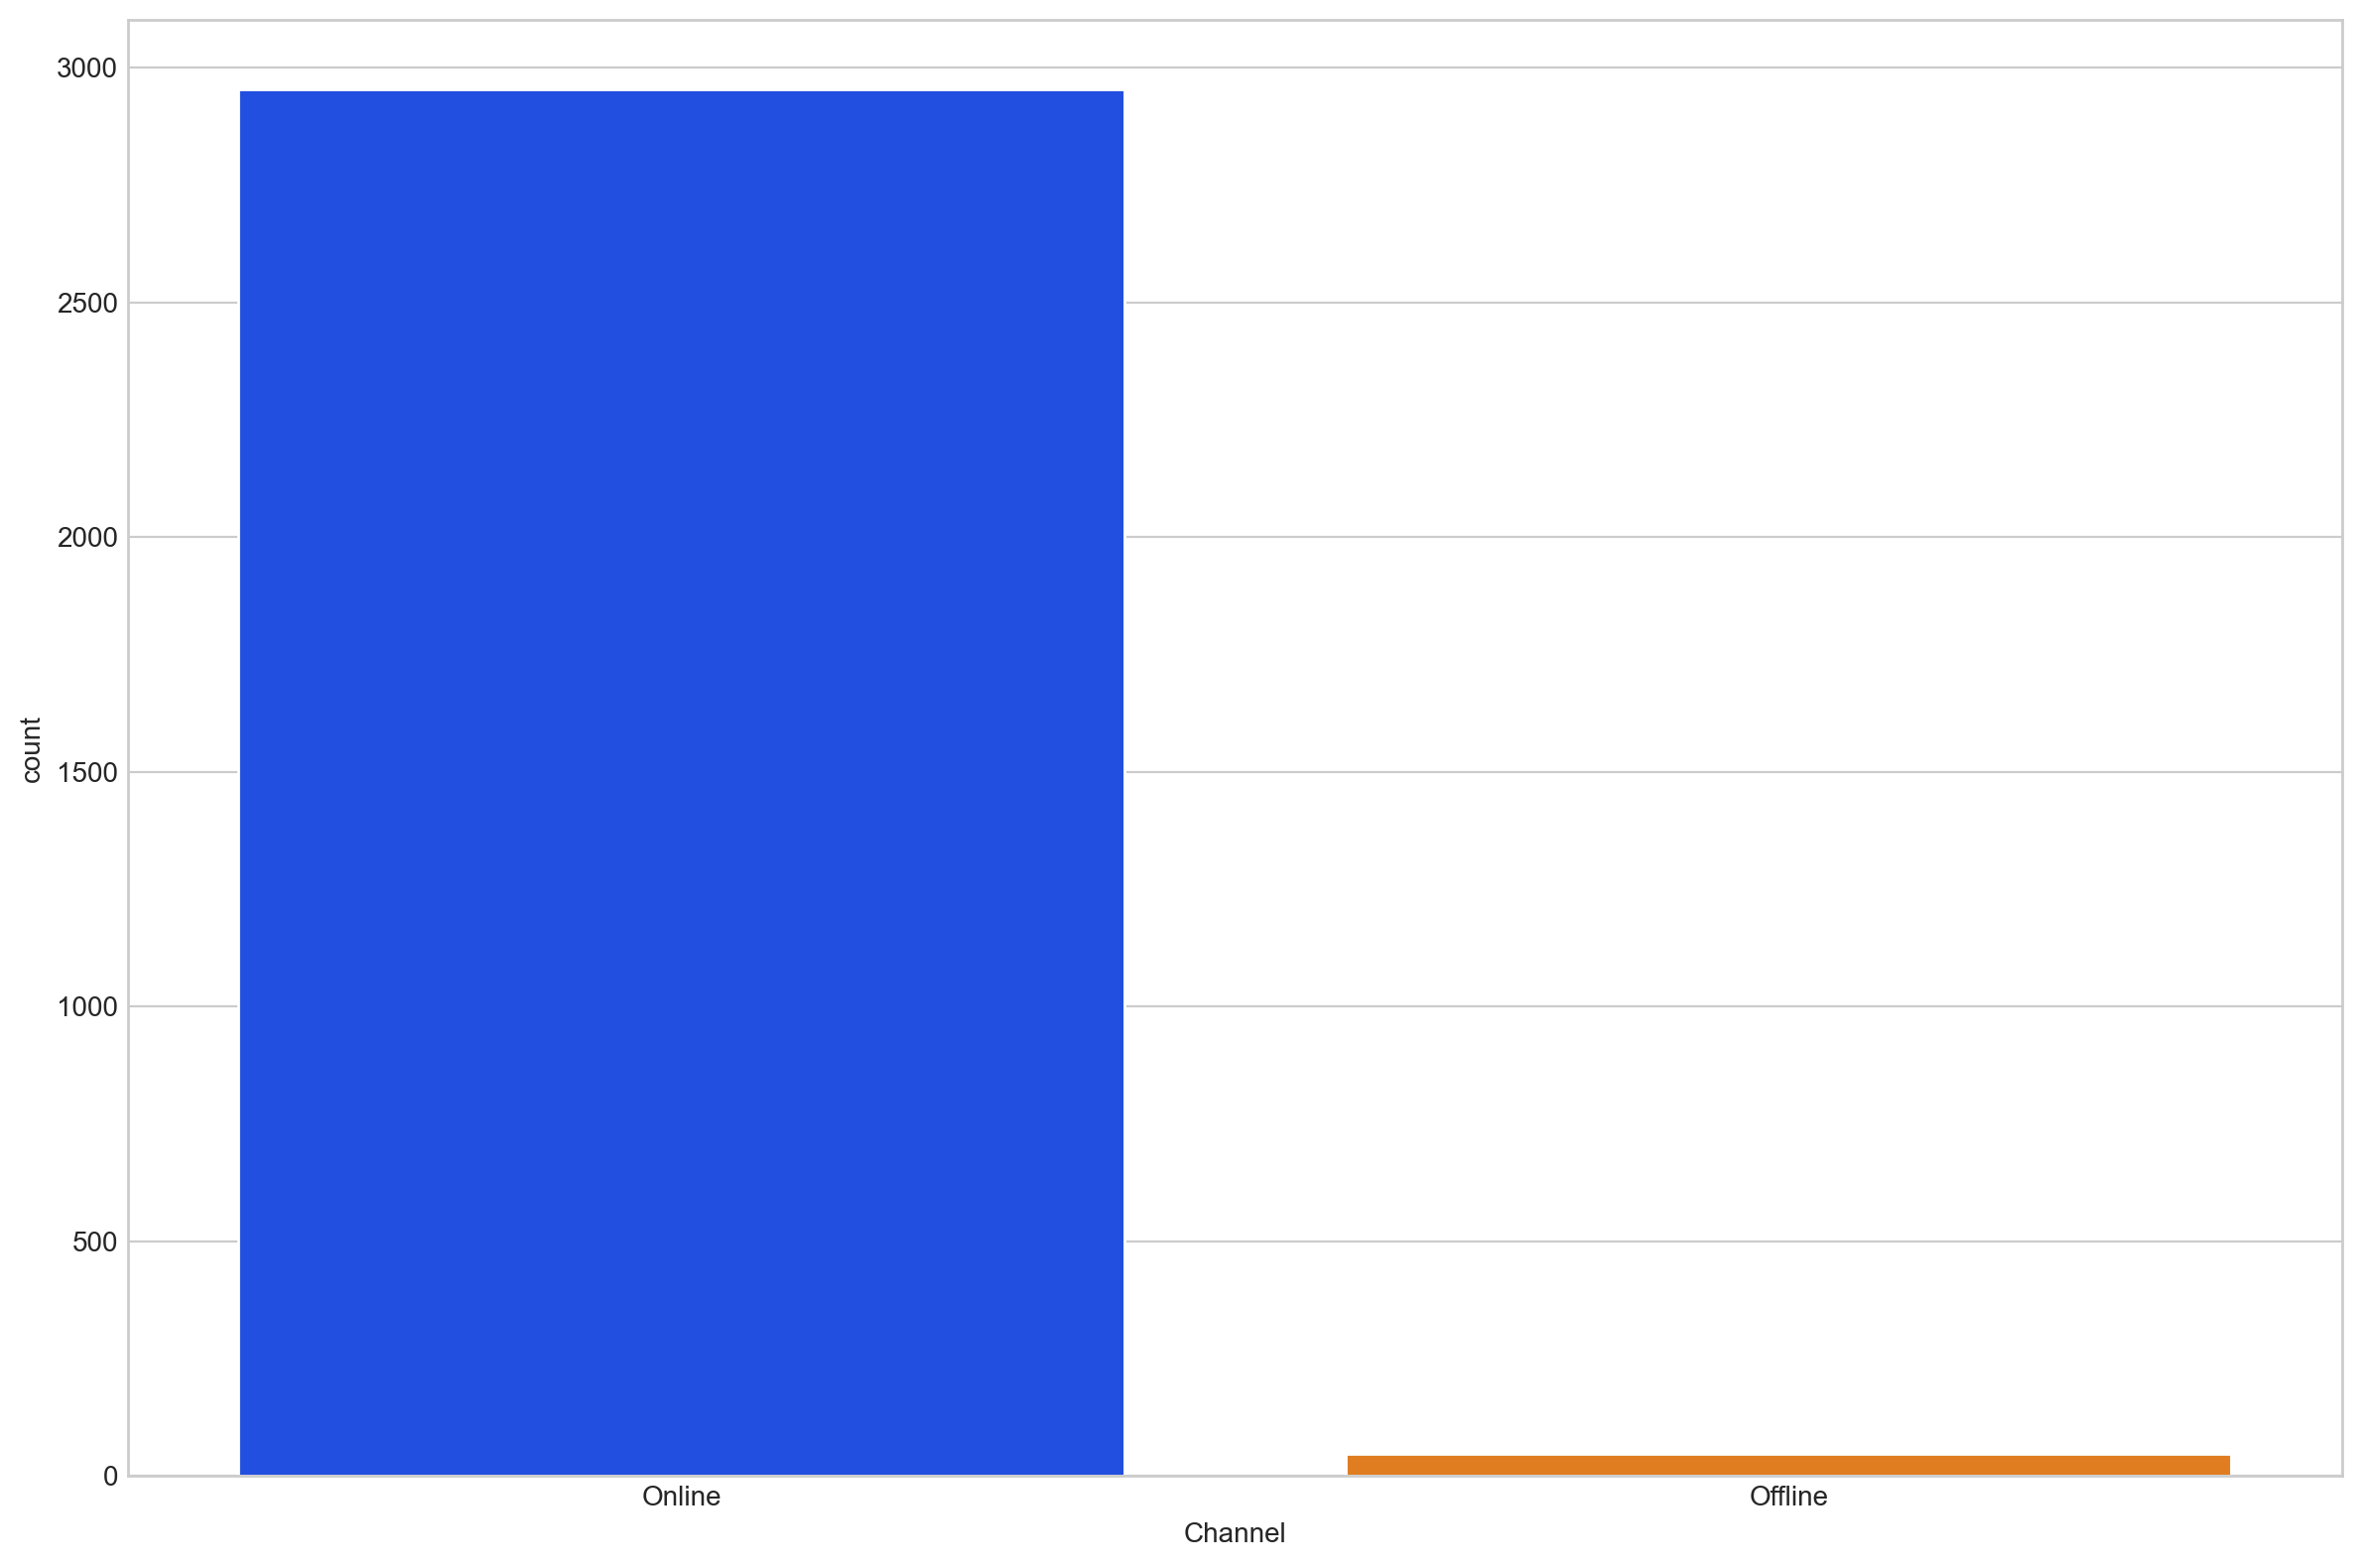

In [133]:
plt.figure(figsize = (12,8), dpi = 200)
sns.countplot(data = ins_df, x = 'Channel')
plt.tight_layout()
plt.savefig('countplot_Channel.png')

In [134]:
plt.figure(figsize = (12,8), dpi = 200)
sns.boxplot(data = ins_df, x = 'Channel', y = 'Sales', hue = 'Claimed')
plt.tight_layout()
plt.savefig('boxplot_Channel_Claimed.png')

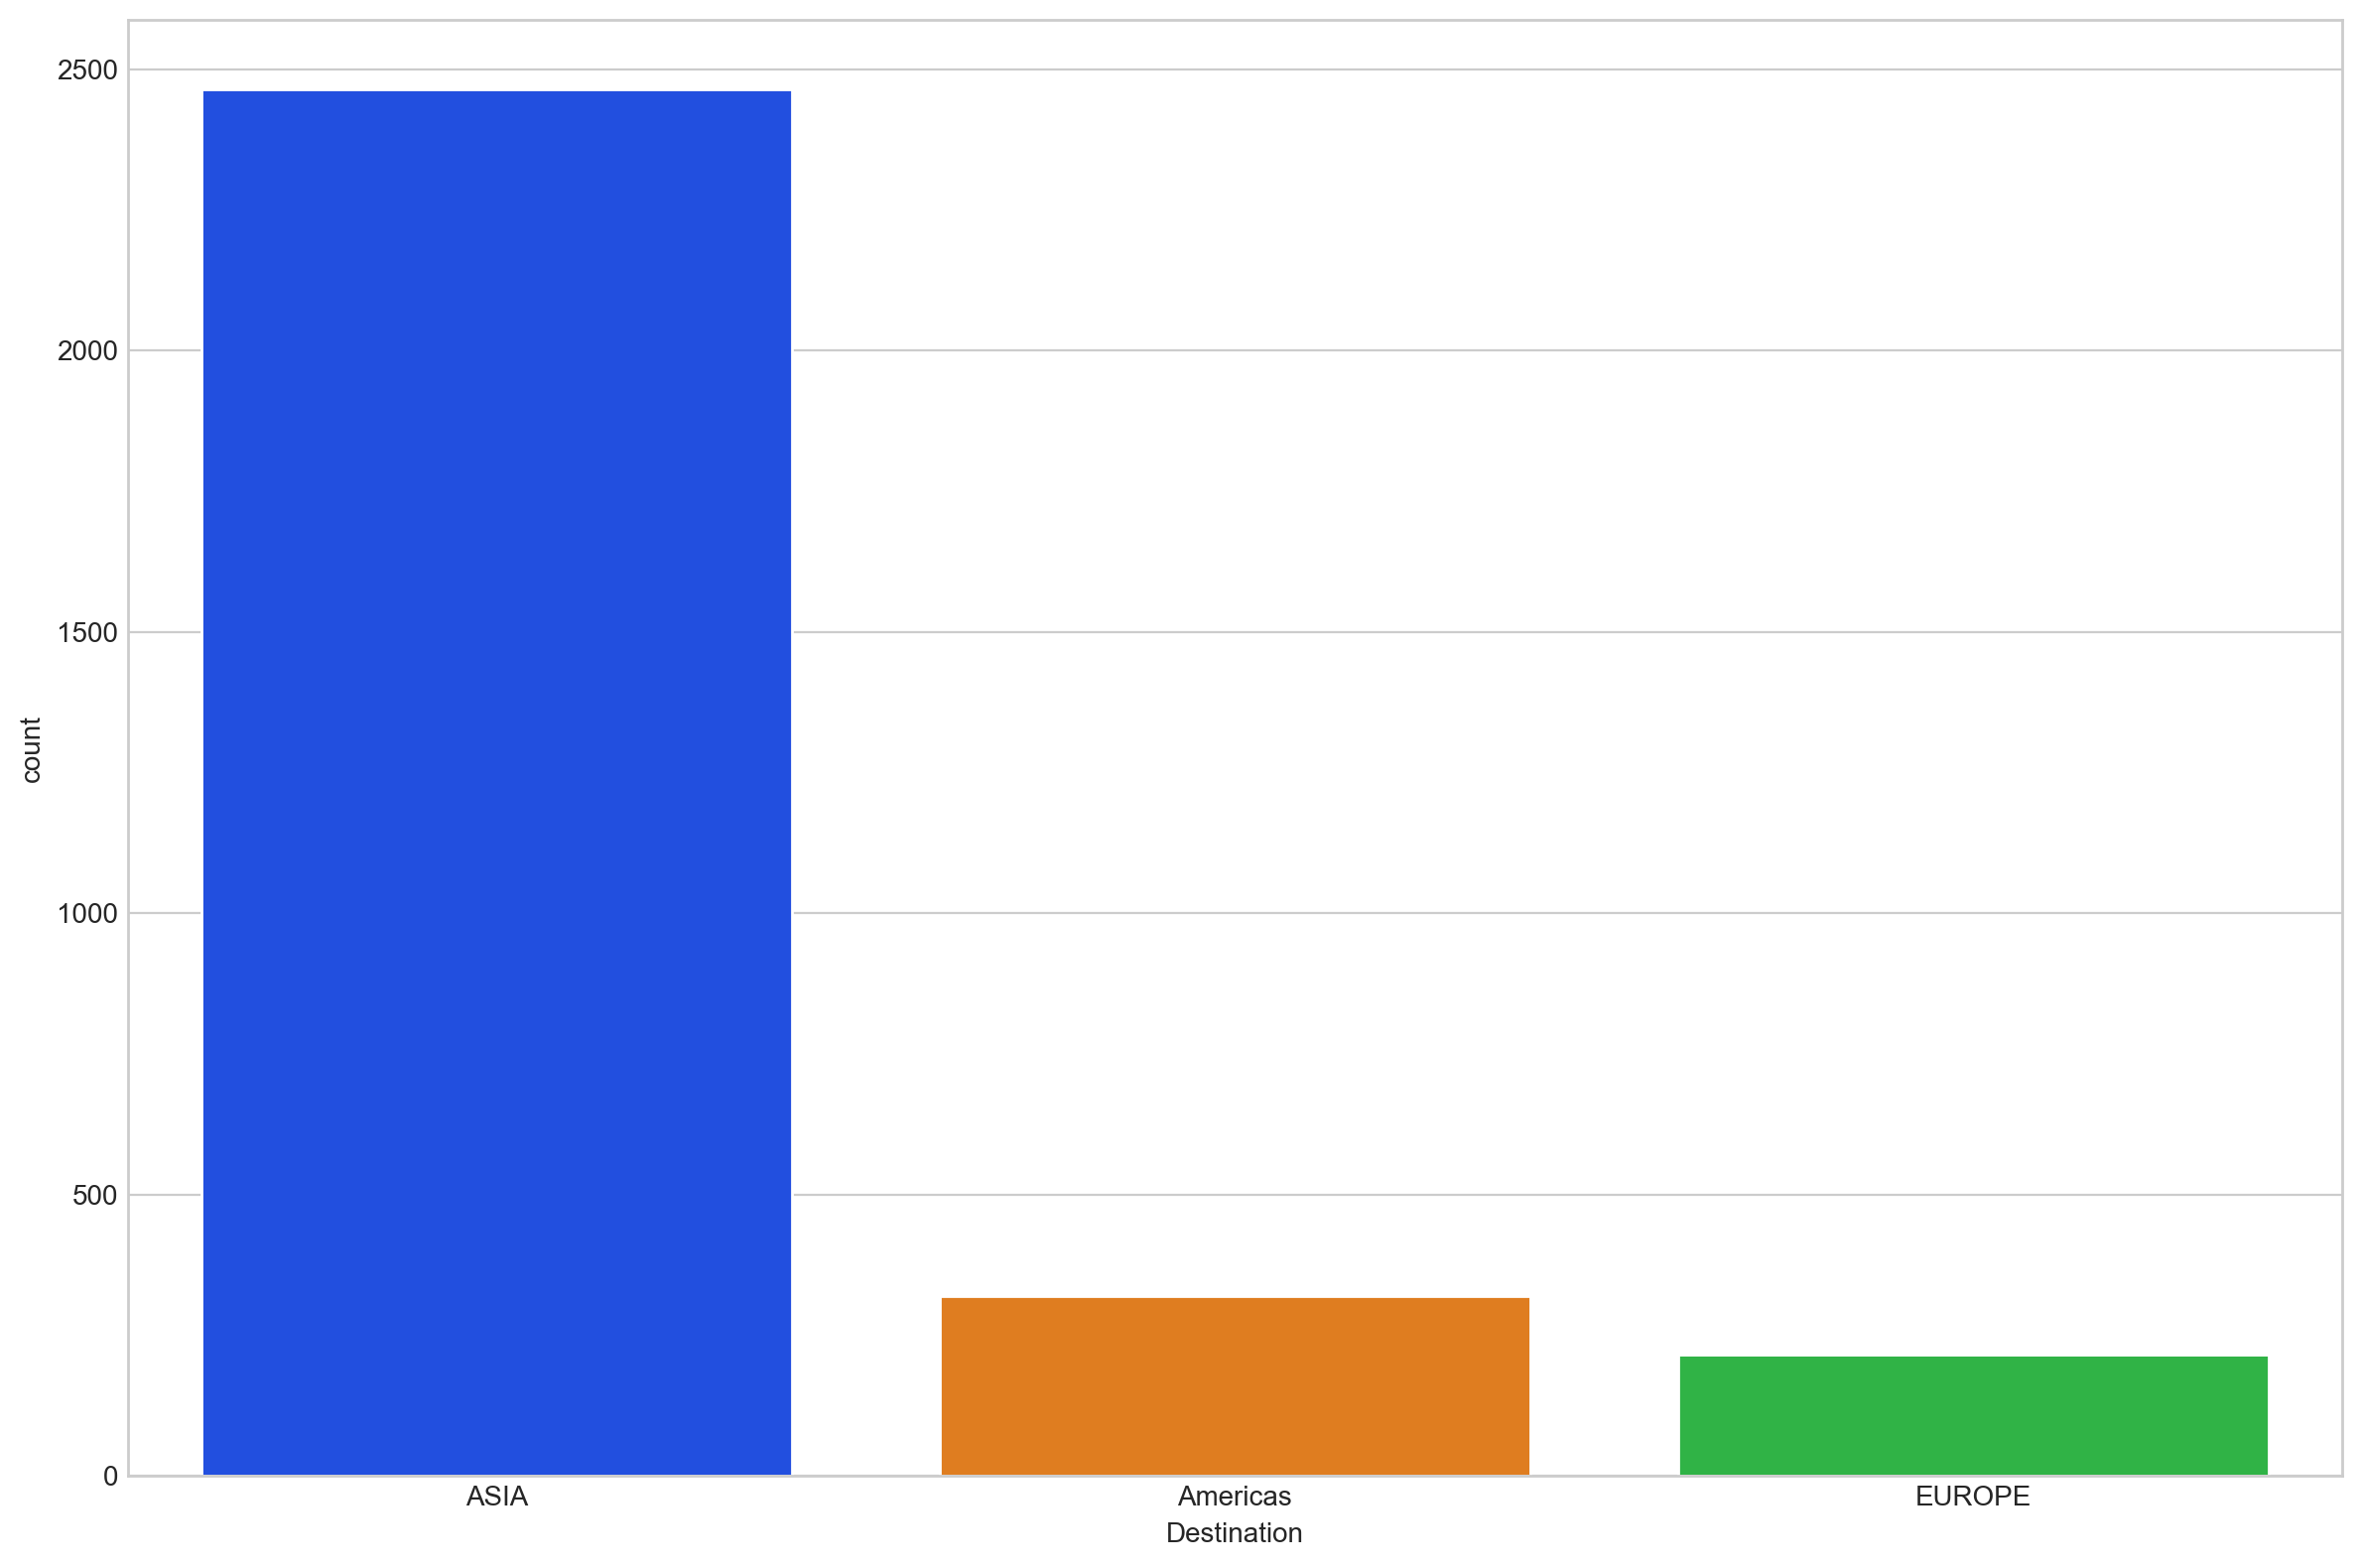

In [135]:
plt.figure(figsize = (12,8), dpi = 200)
sns.countplot(data = ins_df, x = 'Destination')
plt.tight_layout()
plt.savefig('countplot_Destination.png')

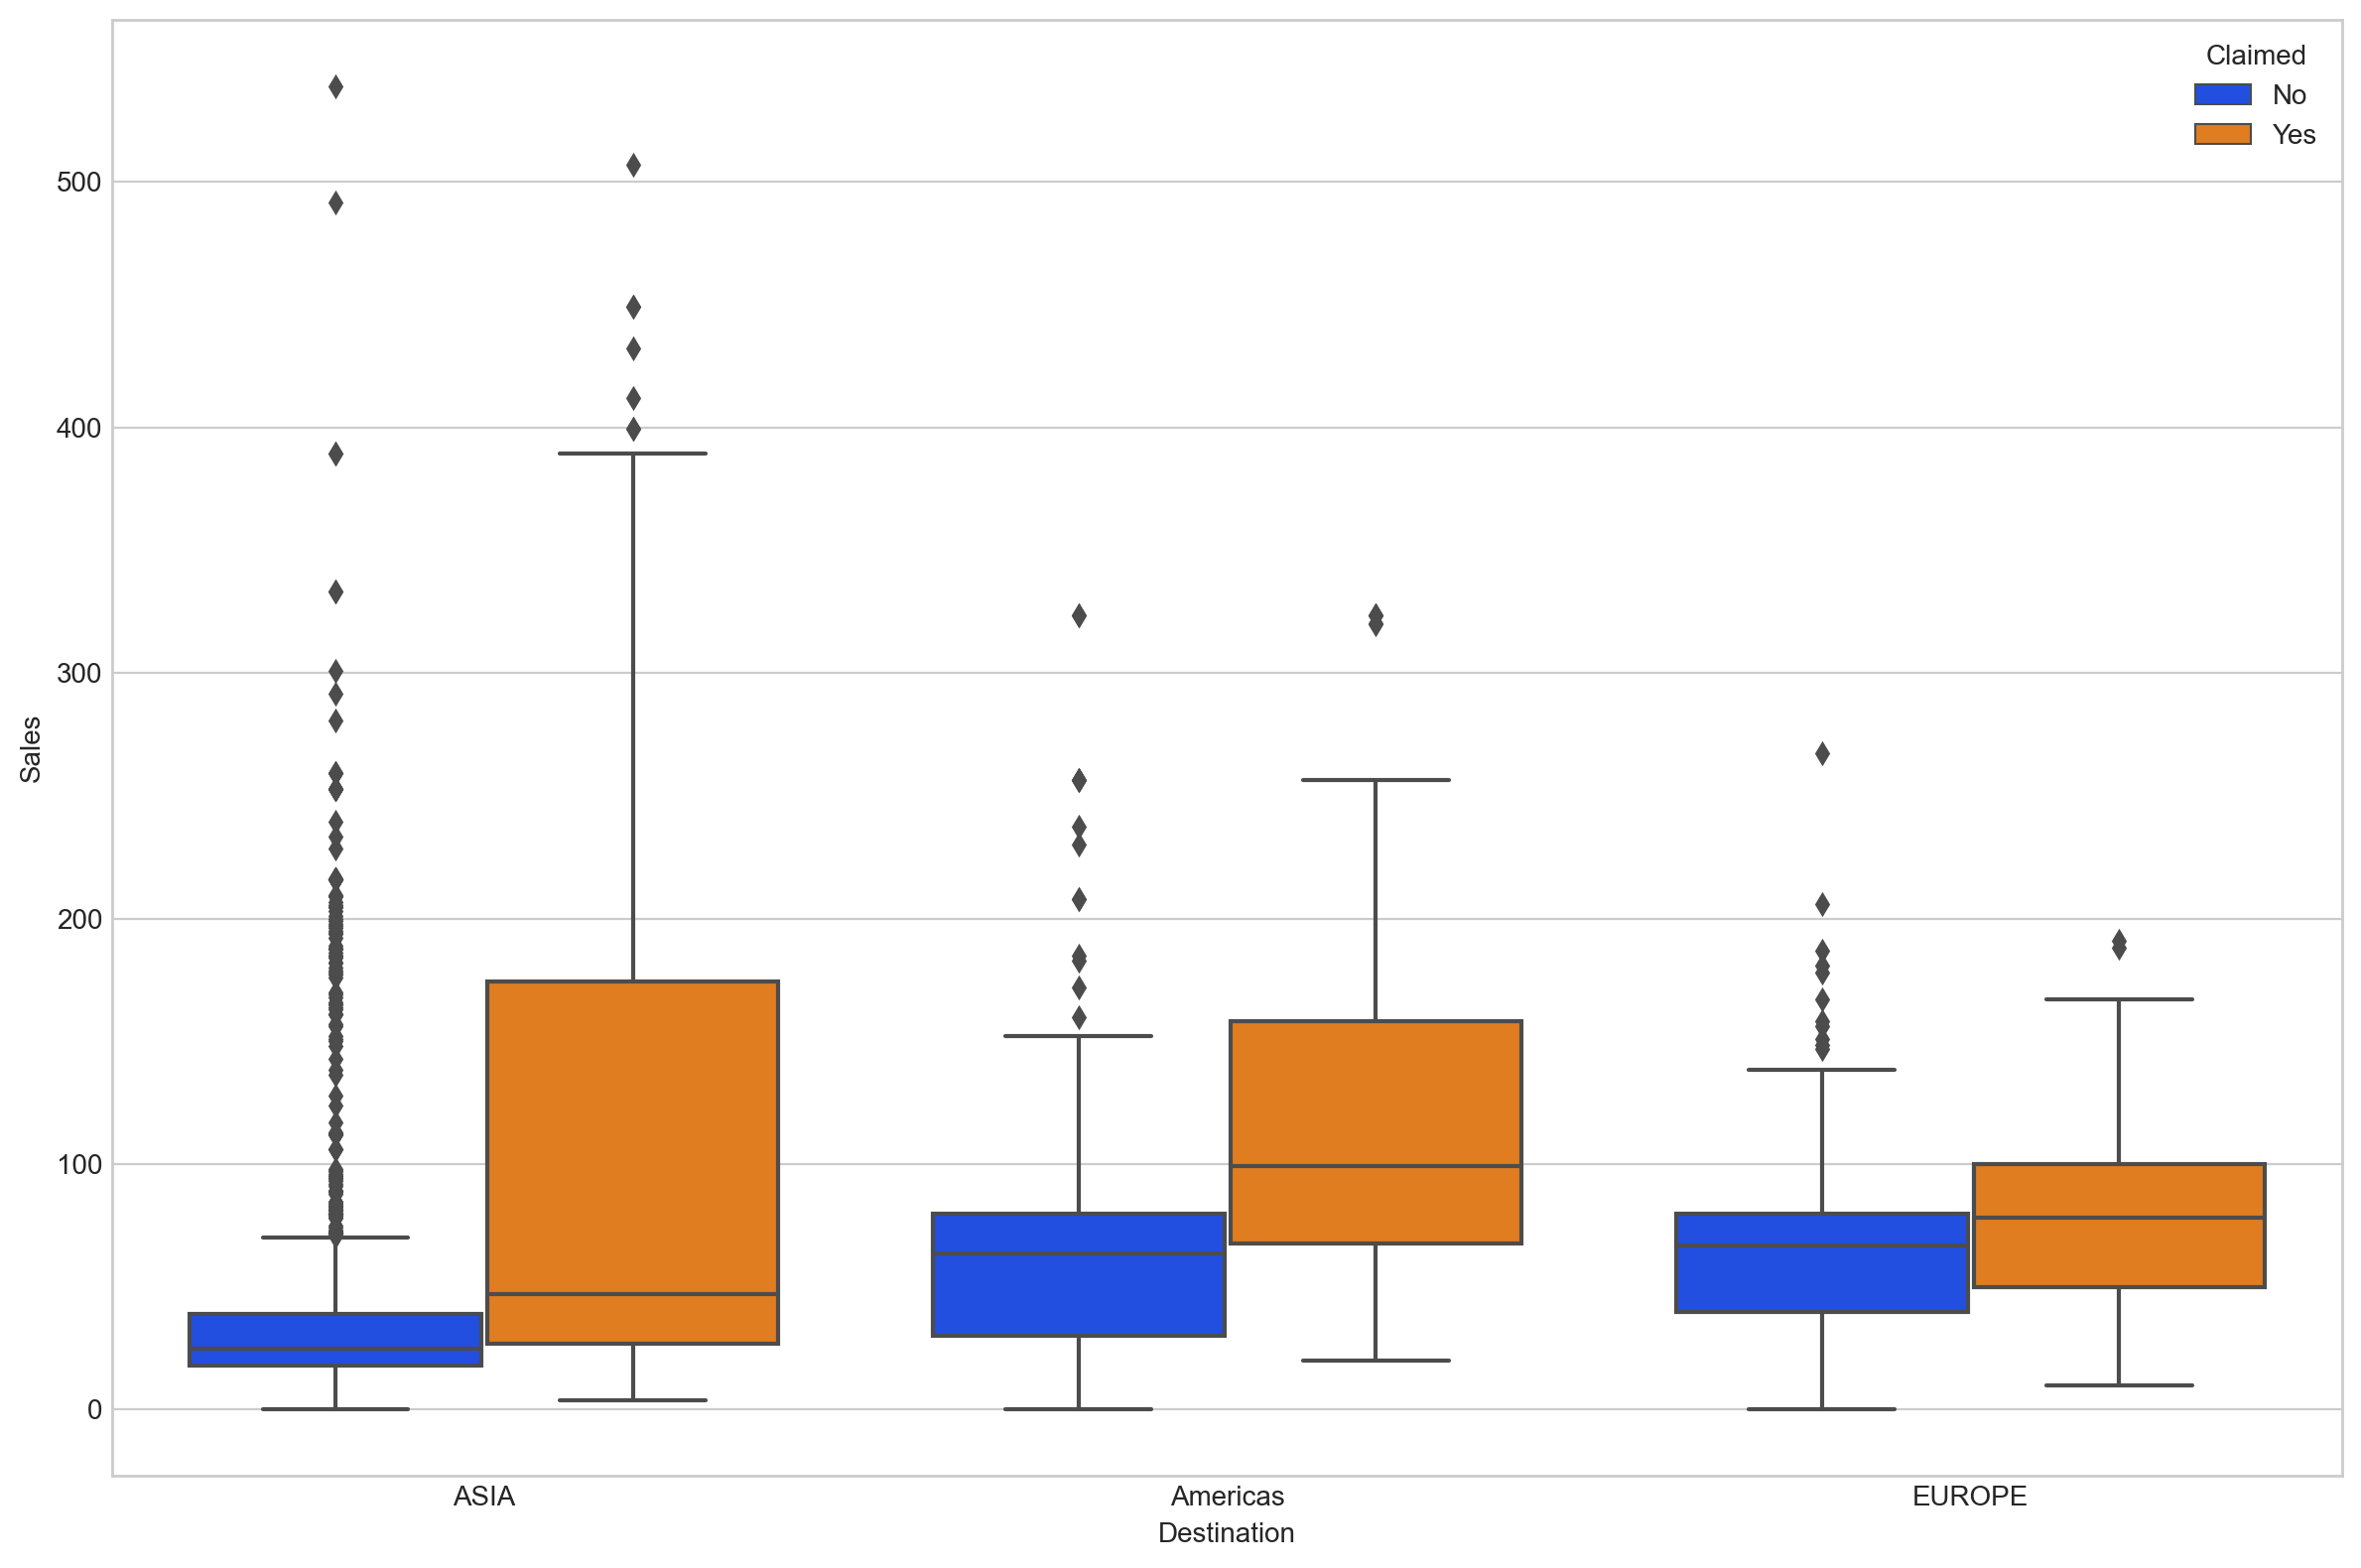

In [136]:
plt.figure(figsize = (12,8), dpi = 200)
sns.boxplot(data = ins_df, x = 'Destination', y = 'Sales', hue = 'Claimed')
plt.tight_layout()
plt.savefig('boxplot_Destination_Claimed.png')

In [265]:
plt.figure(figsize = (12,8), dpi = 200)
sns.distplot(ins_df['Sales'])
plt.tight_layout()
plt.savefig('distplot_sales.png')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [137]:
plt.figure(figsize = (12,8), dpi = 200)
sns.pairplot(data = ins_df, corner=True)
plt.tight_layout()
plt.savefig('ins_pairplot.png')

<Figure size 2400x1600 with 0 Axes>

In [138]:
corr = ins_df.corr()

In [139]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(corr, annot = True);
plt.tight_layout()
plt.savefig('heatmap.png')

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

- CART models, RF models and ANN models in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
- The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category or code.
- Some columns are integer data type and some columns are identified as object data type. The issue over here is that for building a Decision Tree model or CART model we have to ensure that there are no object data types. We should only have integer data types for both independent and dependent variable.
- The objective here is to transform all columns that are of object data types into integer data type. 

In [140]:
ins_df.shape

(3000, 10)

In [141]:
for feature in ins_df.columns:
    if ins_df[feature].dtype == 'object':
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes

In [142]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 111.5 KB


In [143]:
ins_df_head = ins_df.head()
ins_df_head

Age  Agency_Code  Type  Claimed  Commision  Channel  Duration  Sales  \
0   48            0     0        0       0.70        1       7.0   2.51   
1   36            2     1        0       0.00        1      34.0  20.00   
2   39            1     1        0       5.94        1       3.0   9.90   
3   36            2     1        0       0.00        1       4.0  26.00   
4   33            3     0        0       6.30        1      53.0  18.00   

   Product Name  Destination  
0             2            0  
1             2            0  
2             2            1  
3             1            0  
4             0            0

In [144]:
dfi.export(ins_df_head, 'ins_df.png')

### extracting the target column ('Claimed') into seperate vectors for training and test set

- we have 3000 records in our data set. we will randomly split our data into 70 percent training and 30 percent testing.
- Before doing this we have to seperate our data into independent variable and dependent variable seperatly.
- We will use the two functions to achieve the same - the drop function and the pop function.
- X will be the set of all independent variables. We will be dropping the 'Claimed' column from the dataset for X.
- Y will be the set of dependent variables.

In [145]:
X = ins_df.drop(['Claimed'], axis = 1)
y = ins_df.pop('Claimed')

In [146]:
X

Age  Agency_Code  Type  Commision  Channel  Duration   Sales  \
0      48            0     0       0.70        1       7.0    2.51   
1      36            2     1       0.00        1      34.0   20.00   
2      39            1     1       5.94        1       3.0    9.90   
3      36            2     1       0.00        1       4.0   26.00   
4      33            3     0       6.30        1      53.0   18.00   
...   ...          ...   ...        ...      ...       ...     ...   
2995   28            1     1     166.53        1     364.0  256.20   
2996   35            0     0      13.50        1       5.0   54.00   
2997   36            2     1       0.00        1      54.0   28.00   
2998   34            0     0       7.64        1      39.0   30.55   
2999   47            3     0      11.55        1      15.0   33.00   

      Product Name  Destination  
0                2            0  
1                2            0  
2                2            1  
3                1            0  
4                0            0  
...            ...          ...  
2995             3            1  
2996             3            0  
2997             2            0  
2998             0            0  
2999             0            0  

[3000 rows x 9 columns]

In [147]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, Length: 3000, dtype: int8

### splitting the data into training and test data

- Now we will split the data into training and testing.
- from sklearn package and submodule model_selection we will import the train_test_split function.
- we will call the train_test_split and we will pass the independent variable and dependent variable. The function train_test_split requires the dependent and independent variable sperately and that is the reason why we have split into X and Y.
- The next parameter will be the test size. We will specify the proportion of test size as 0.3 or 30 percent.
- we will get four different outputs after executing the function which are - Training Independent variables, Testing Independent Variables, Training Dependent variables and Testing Dependent Variable.

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size = 0.30, random_state = 1)

### Checking the dimensions of the training and test data

In [150]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('train_labels', train_labels.shape)
print('test_labels', test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


### Building a Decision Tree Classifier

- We are building a Decision Tree with some aditional pruning parameters passed into the same.
- this is also called regularised decision tree model.

In [151]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth' : [3, 5, 7, 10, 13, 15],
    'min_samples_leaf': [20, 30, 50, 60],
    'min_samples_split' : [60, 90, 150, 180]
}

- criterion we have choosen 'gini'
- max_depth is the length of the longest path from the tree root to a leaf. It should always be less than 20. but there is no particular threshold for max_depth. It depends on model.
- min_samples_split specifies the minimum number of samples required to split an internal node should always be 1% to 10% of the entire record
- min_samples_leaf specifies the minimum number of samples required to be at a leaf node. It should always be 1/3rd of min_samples_split

In [152]:
dtcl = DecisionTreeClassifier(random_state=1)

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

- we will fit the model with training data. while training the model it is very important that we pass both the independent and the dpendent variable for the training data set.

In [155]:
grid_search_dtcl.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 10, 13, 15],
                         'min_samples_leaf': [20, 30, 50, 60],
                         'min_samples_split': [60, 90, 150, 180]})

In [156]:
print(grid_search_dtcl.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 150}


In [157]:
best_grid_param = grid_search_dtcl.best_estimator_

In [158]:
from sklearn.tree import plot_tree

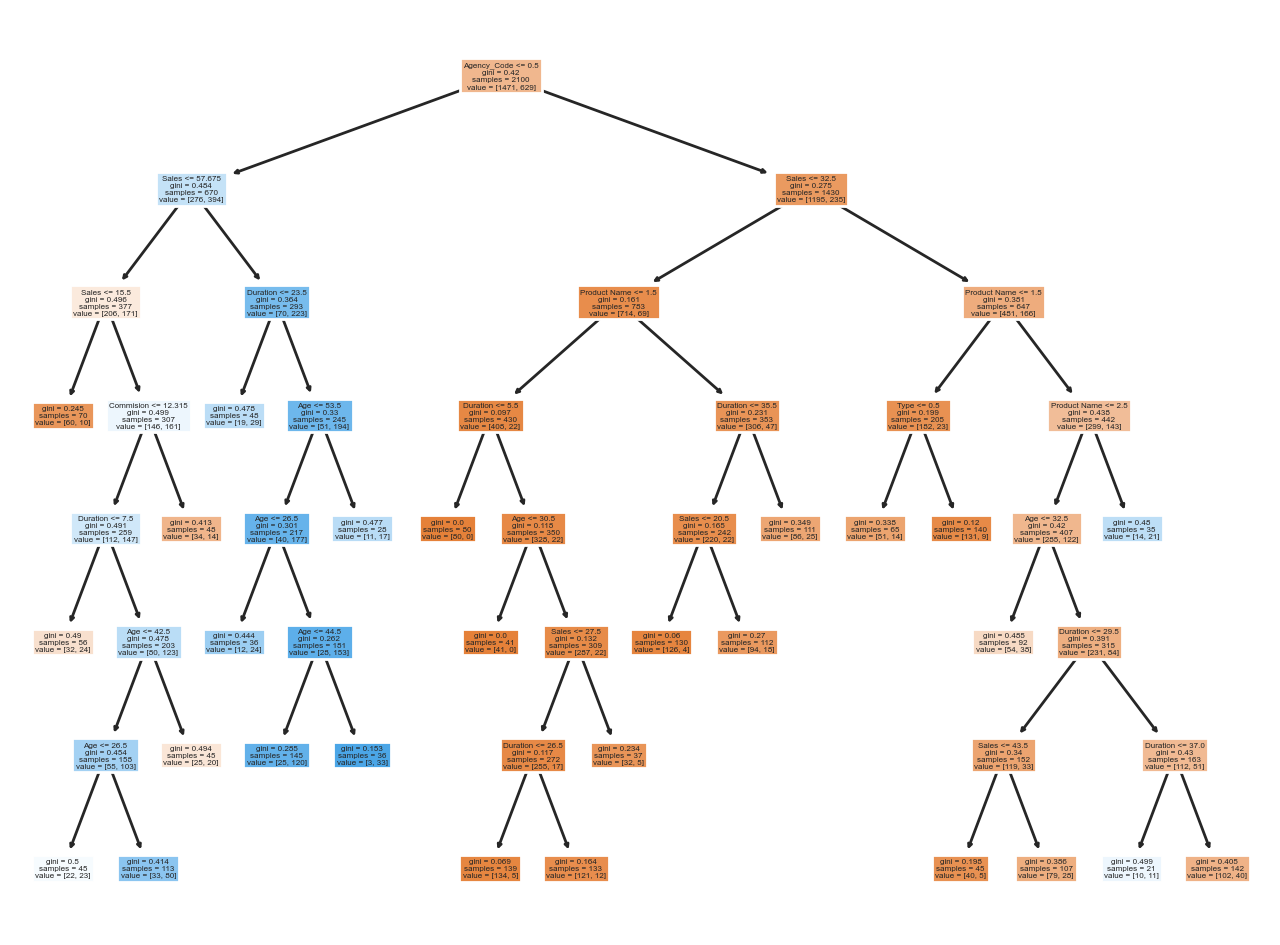

In [159]:
plt.figure(figsize = (8,6), dpi = 200)
plot_tree(best_grid_param, feature_names= X.columns, filled = True)
plt.savefig('D_tree.pdf')

### Generating Tree

In [160]:
from sklearn import tree

In [161]:
train_char_label = ['No', 'Yes']
ld_tree_file = open('tree_regularised.dot', 'w')
dot_data = tree.export_graphviz(best_grid_param, out_file= ld_tree_file,
                               feature_names= list(X_train),
                               class_names = list(train_char_label))
ld_tree_file.close()
dot_data

### http://webgraphviz.com/

### Variable Importance

- from the regularised Decision Tree model we will extract the single output called as feature_importance_.
- The output contains an array of values which indicates decrease in the node impurity weighted by the probability of reaching that node. It tells about the variables that is used in each and every split. 

In [162]:
x = pd.DataFrame(best_grid_param.feature_importances_, columns=['Imp'],
            index = X_train.columns).sort_values('Imp', ascending = False)
x

Imp
Agency_Code   0.563106
Sales         0.246431
Product Name  0.071927
Age           0.046258
Duration      0.044121
Commision     0.021191
Type          0.006967
Channel       0.000000
Destination   0.000000

In [163]:
dfi.export(x,'feat_imp.png')

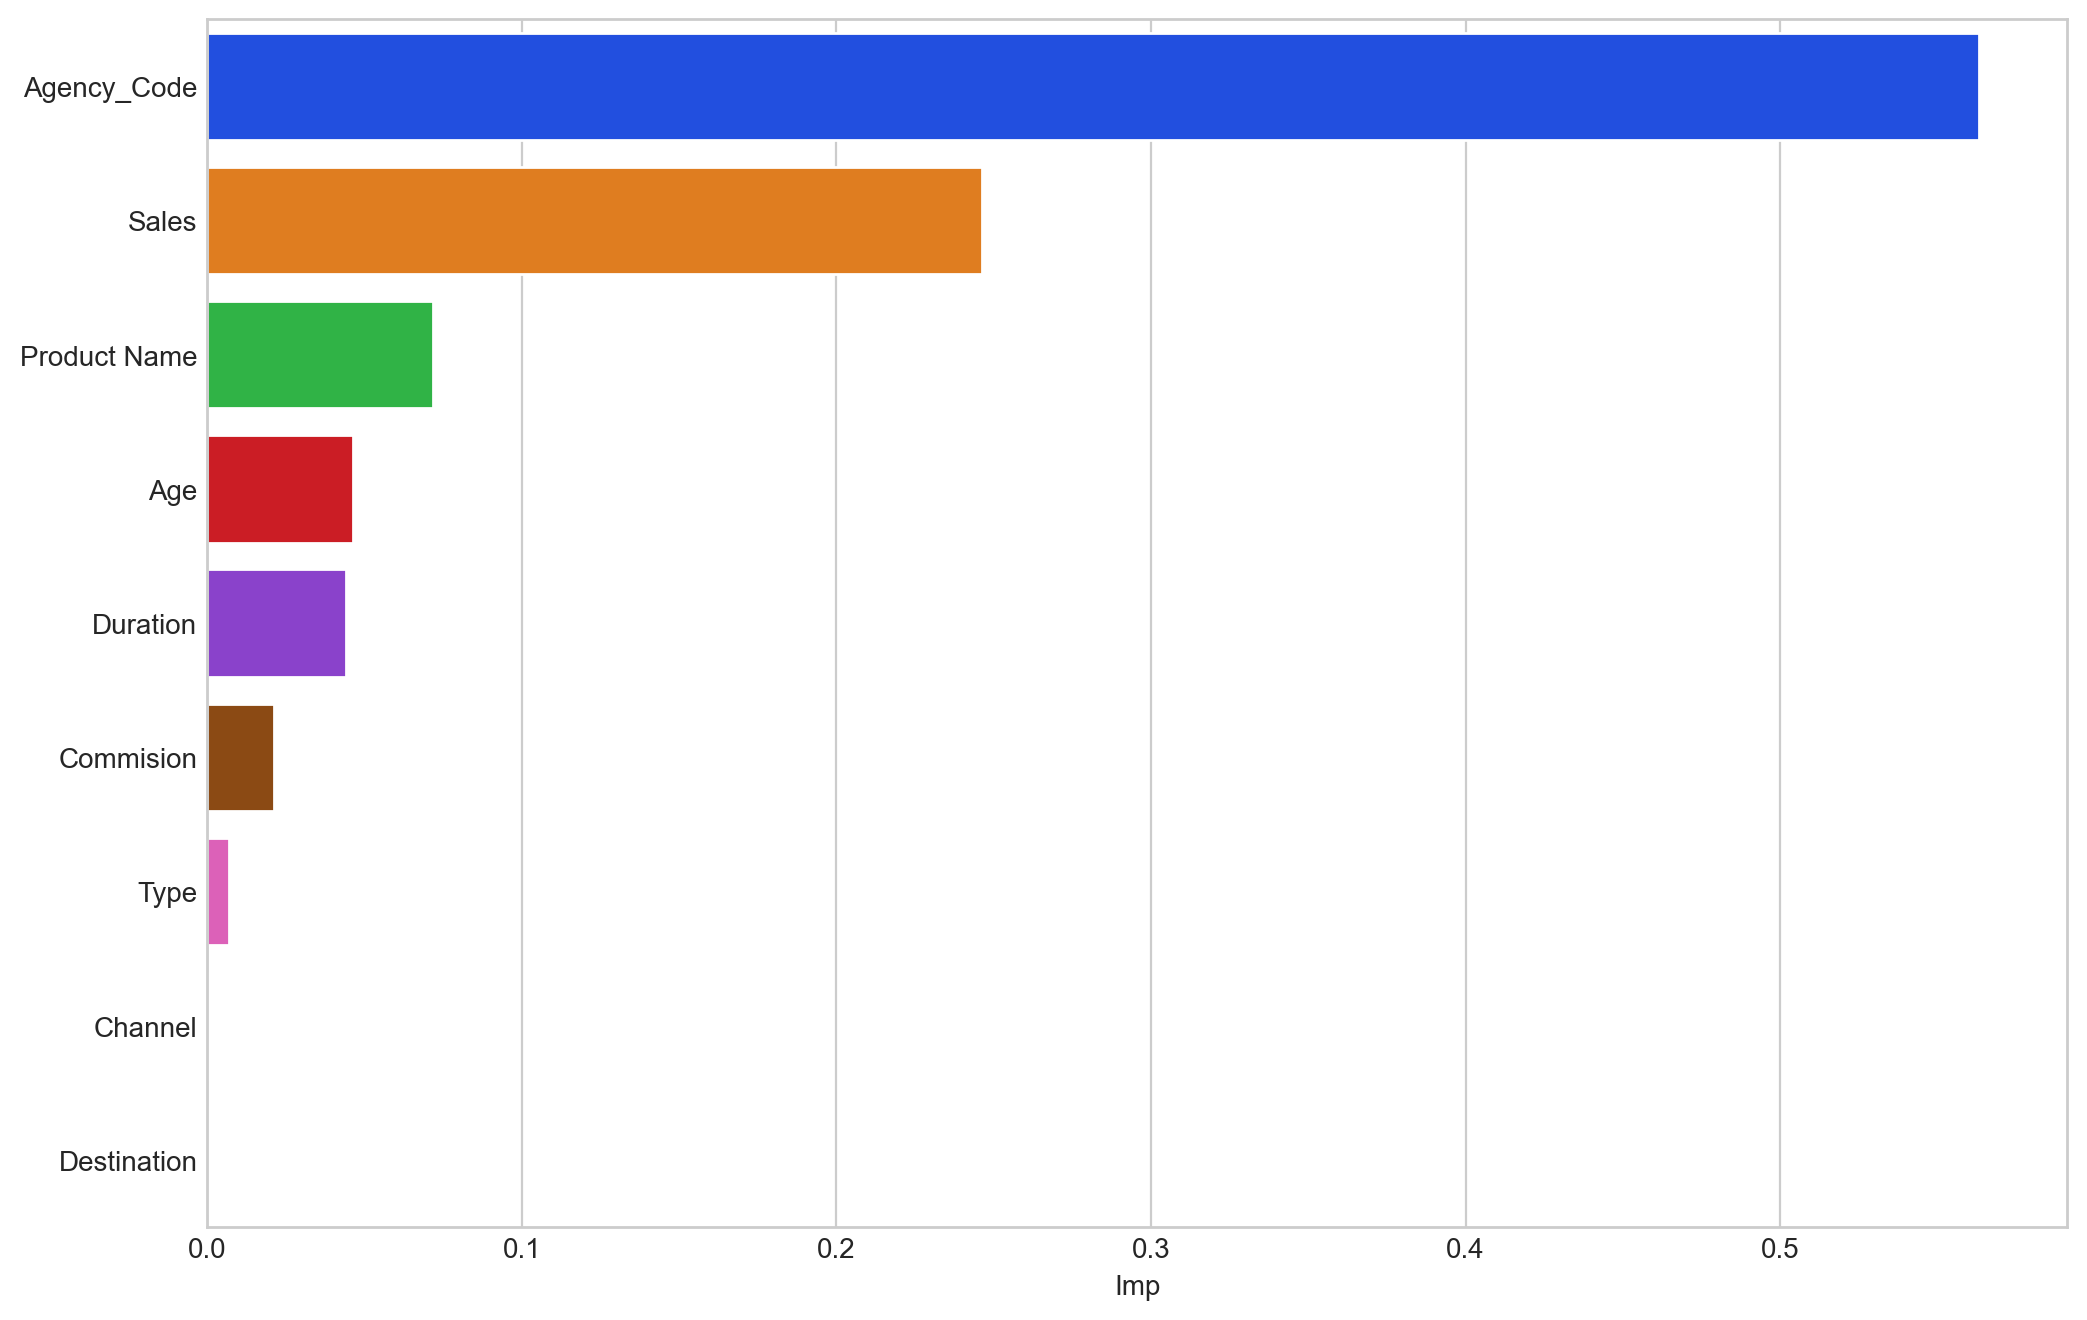

In [164]:
plt.figure(figsize=(12, 8), dpi = 200)
sns.barplot(x = x['Imp'], y = x.index);
plt.savefig('Feat_imp_bar.png')

### Predicting on Training and Test Dataset

- This step involves predicting on the testing data using indpendent test variables.

In [165]:
y_train_pred = best_grid_param.predict(X_train)
y_test_pred = best_grid_param.predict(X_test)

### Getting the predicted Classes and probs

In [166]:
y_test_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [167]:
y_test_pred_prob = best_grid_param.predict_proba(X_test)
y_test_pred_prob

array([[0.93571429, 0.06428571],
       [0.55555556, 0.44444444],
       [0.2920354 , 0.7079646 ],
       ...,
       [0.2920354 , 0.7079646 ],
       [0.86486486, 0.13513514],
       [0.96402878, 0.03597122]])

In [168]:
y_train_pred_prob = best_grid_param.predict_proba(X_train)

In [169]:
prob_table = pd.DataFrame(y_test_pred_prob).head()
prob_table

0         1
0  0.935714  0.064286
1  0.555556  0.444444
2  0.292035  0.707965
3  0.172414  0.827586
4  0.909774  0.090226

In [170]:
dfi.export(prob_table,'prob_table.png')

### Building a Random Forest Classifier

In [171]:
param_grid_rfcl = {
    'max_depth': [7, 10, 13],
    'max_features': [4, 5, 6],
    'min_samples_leaf': [15, 30, 50],
    'min_samples_split' : [45, 90, 150],
    'n_estimators' : [100, 150, 200]
}

- max_features states that out of the total number of independent features how many features should the random forest classifier use for evaluating and splitting the decision node in all decision trees. It will be less than or equal to number of independent variables.
- max_depth should always be less than 20. There is no particular threshold for max_depth.
- min_samples_split should always be 1% to 10% of the entire record.
- min_samples_leaf should always be 1/3rd of min_samples_split.
- n_estimators will be 1% to 5% of the entire record.It is the number of trees that we want to build within the random forest classifier.

In [172]:
rfcl = RandomForestClassifier(random_state=1)

- GridSearchCV allows us to do Grid Search i.e. we can pass multiple input values for all the parameters and find out which combination of value will give the highest precision.
- we have created a dictionary called as 'param_grid_rfcl' which will be passed to the Grid Search function as a parameter.

In [173]:
gridSearch_rfcl = GridSearchCV(estimator= rfcl, param_grid= param_grid_rfcl, cv = 5)

In [174]:
gridSearch_rfcl.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 10, 13], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [15, 30, 50],
                         'min_samples_split': [45, 90, 150],
                         'n_estimators': [100, 150, 200]})

In [175]:
best_grid_param_rfcl = gridSearch_rfcl.best_estimator_

In [176]:
best_grid_param_rfcl

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=15,
                       min_samples_split=45, random_state=1)

In [177]:
print(gridSearch_rfcl.best_params_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 15, 'min_samples_split': 45, 'n_estimators': 100}


### Predicting the Training and Testing Data

In [178]:
y_train_pred_rfcl = best_grid_param_rfcl.predict(X_train)
y_test_pred_rfcl = best_grid_param_rfcl.predict(X_test)

### Getting the Predicted Classes and Probs

In [179]:
y_test_pred_rfcl_prob = best_grid_param_rfcl.predict_proba(X_test)
pd.DataFrame(y_test_pred_rfcl_prob).head()

0         1
0  0.762823  0.237177
1  0.483802  0.516198
2  0.468329  0.531671
3  0.264400  0.735600
4  0.939039  0.060961

In [180]:
y_train_pred_rfcl_prob = best_grid_param_rfcl.predict_proba(X_train)

### Variable Importance

In [181]:
x_rfcl = pd.DataFrame(best_grid_param_rfcl.feature_importances_, columns=['Imp']
            ,index = X_train.columns).sort_values('Imp', ascending=False)
x_rfcl

Imp
Agency_Code   0.316717
Sales         0.183562
Product Name  0.179883
Commision     0.131898
Duration      0.069245
Type          0.057446
Age           0.051133
Destination   0.009659
Channel       0.000457

In [182]:
dfi.export(x, ' x_rfcl.png')

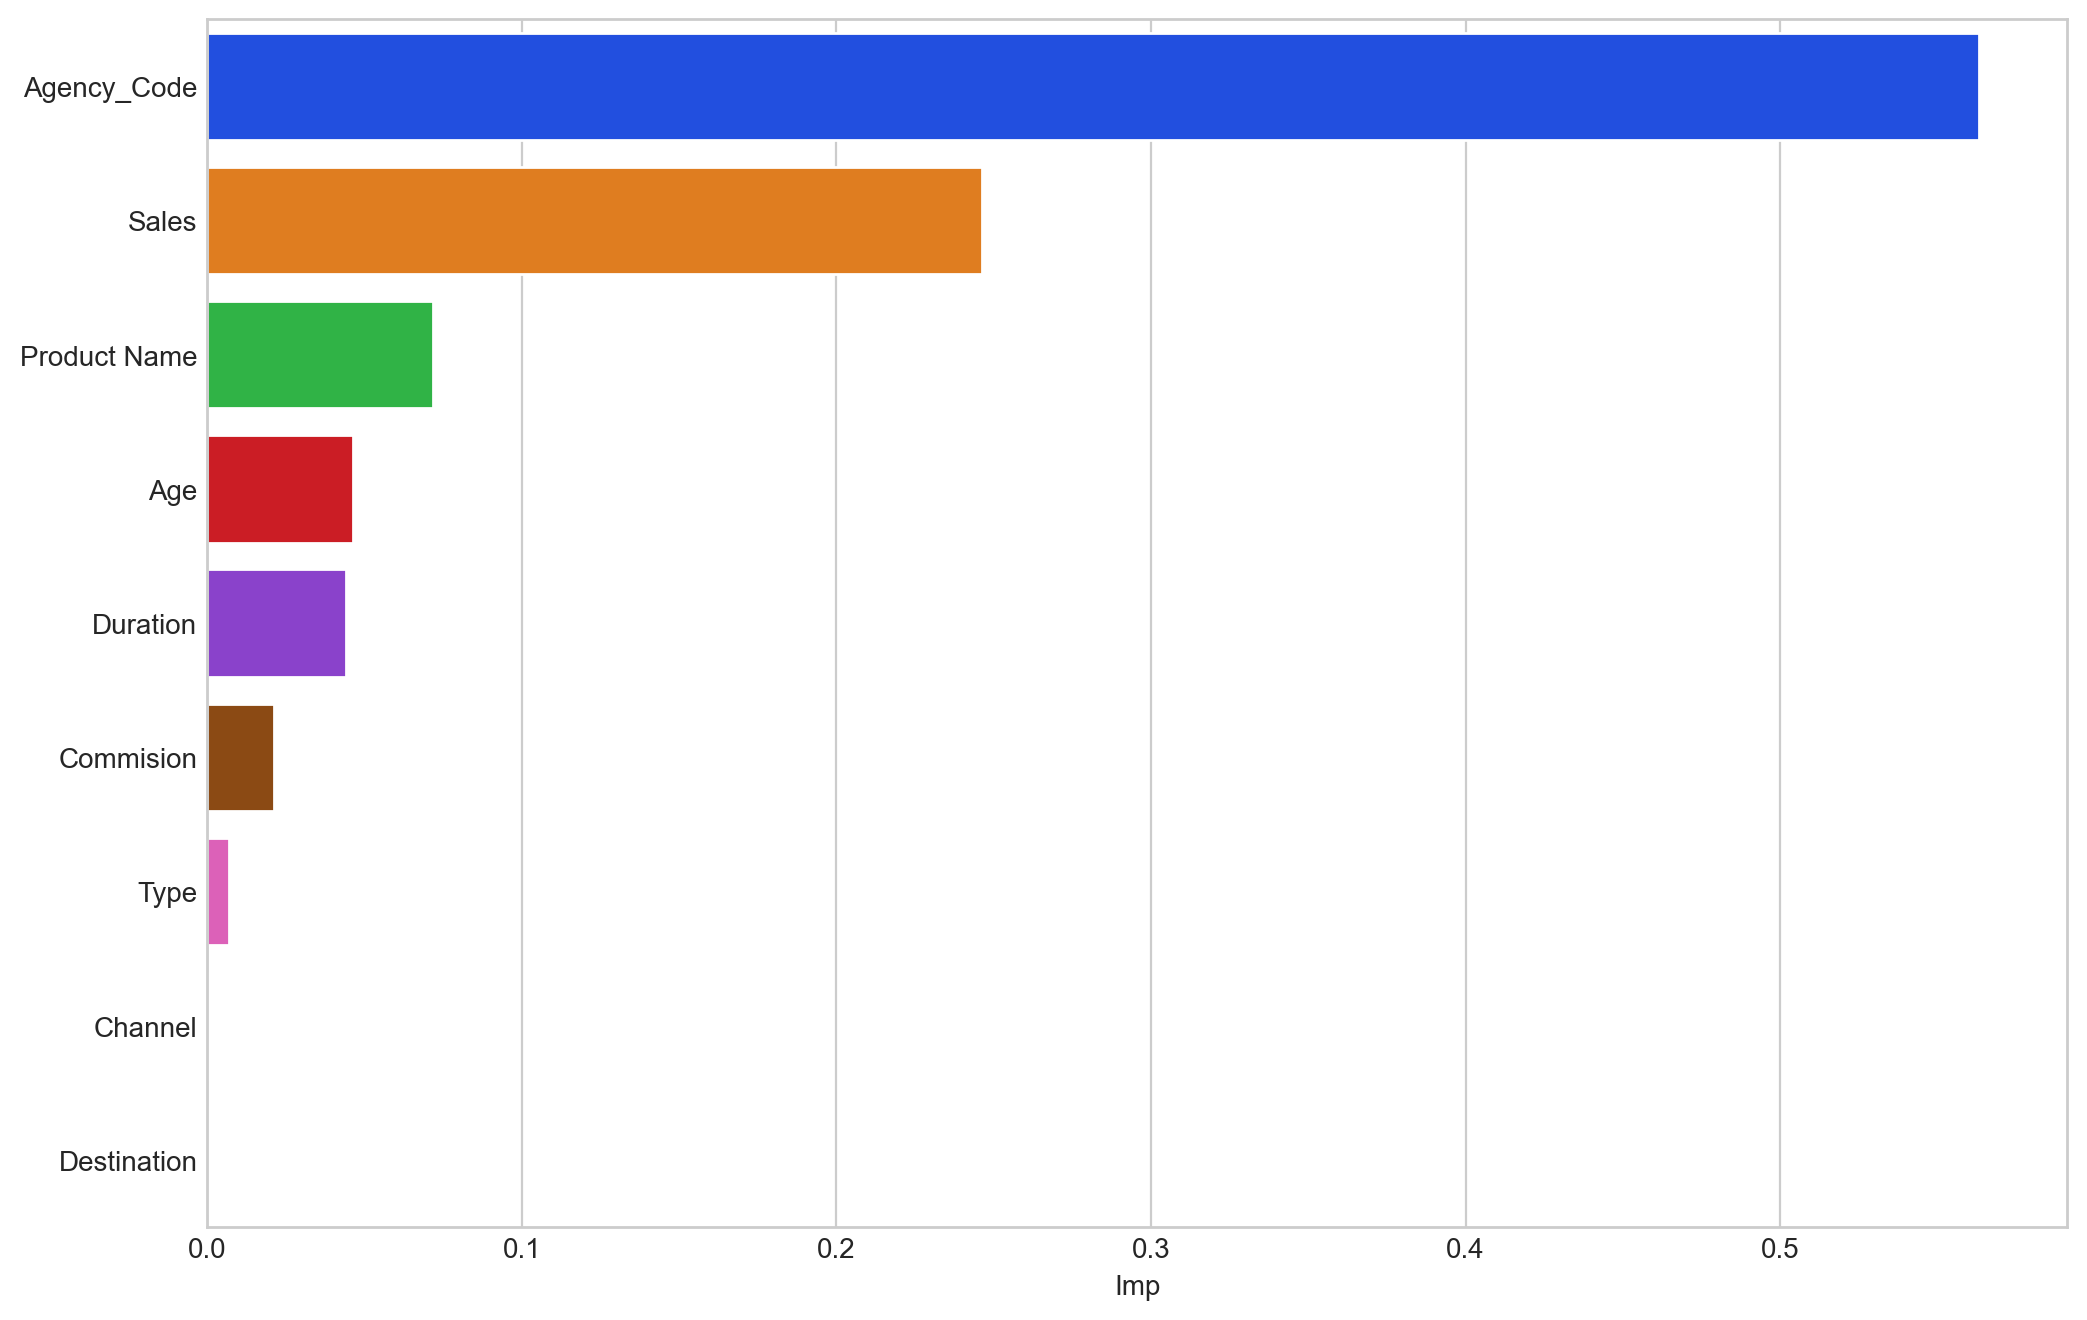

In [183]:
plt.figure(figsize = (12, 8), dpi =200)
sns.barplot(data= x, x = x['Imp'], y = x.index);
plt.savefig('Feat_imp_bar_rfcl.png')

### Building a Neural Network

- for ANN (Artificial Neural Networks), it is important that we scale the data. 
- This is done so that each variable holds the same weightage in the output so that the model is not affected by one variable by giving it more weightage.
- Scaling will convert all the data into the same scale range
- we have already split the data into train and test using the train_test_split function.
- We will scale the 'X_train' and 'X_test' data and assign it to 'x_train' and 'x_test' variable. We will perform fit and transform on the 'X_train' data. The training data is fitted into the Standard Scaler and then transformed. For the 'X_test' data we will only perform transform test data has to be scaled wrt to the scaling properties of training data.

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [186]:
x_test = sc.transform(X_test)
x_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

- hidden layer is the layer between the input layer and the output layer hidden layer sizes is passed as a tuple of information. The size of tuple will indicate the number of hidden layers and each value mentioned in the tuple indicates the size of neurons in each hidden layers.
- max_iter means the model is not allowed to run more than the specified number mentioned for this parameter. In each iteration the random sanaptic weights that are initiated will be updated.
- solver is the argument to set the optimization algorithm here. It is used for weight optimization.
- tol is the threshold level. It is for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, the training stops.
- Activation function is a mechanism by which the artificial neuron processes incoming information and passes it throughout the network.They basically decide whether the neuron should be activated or not. By default we are using 'Relu' or Rectified Linear Activation Function for our model.

In [187]:
param_grid_nncl = {
    'hidden_layer_sizes' : [50, 100, 200, 500],
    'max_iter' : [250, 500, 1000, 3000],
    'solver' : ['adam'],
    'tol' : [0.01]
}

- From sklearn.neural_network, we have the function called MLPClassifier which stands for Multi Layer Perceptron Classifier. Percpetron is a single node of a neural network.
- We will build the MLP Classifier function.

In [188]:
nncl = MLPClassifier(random_state=1)
grid_search_nncl = GridSearchCV(estimator= nncl, param_grid=param_grid_nncl, cv =10)

In [189]:
print_Grid = grid_search_nncl.fit(x_train, train_labels)
print(print_Grid)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200, 500],
                         'max_iter': [250, 500, 1000, 3000], 'solver': ['adam'],
                         'tol': [0.01]})


In [190]:
print_Grid

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200, 500],
                         'max_iter': [250, 500, 1000, 3000], 'solver': ['adam'],
                         'tol': [0.01]})

In [191]:
grid_search_nncl.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 250, 'solver': 'adam', 'tol': 0.01}

In [192]:
best_grid_param_nncl = grid_search_nncl.best_estimator_
best_grid_param_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=250, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [193]:
y_train_pred_nncl = best_grid_param_nncl.predict(x_train)
y_test_pred_nncl = best_grid_param_nncl.predict(x_test)

### Getting the Predicted Classes and Probabilities

In [194]:
y_test_pred_nncl_prob = best_grid_param_nncl.predict_proba(x_test)
pd.DataFrame(y_test_pred_nncl_prob).head()

0         1
0  0.828364  0.171636
1  0.627123  0.372877
2  0.526596  0.473404
3  0.327278  0.672722
4  0.924043  0.075957

In [195]:
y_train_pred_nncl_prob = best_grid_param_nncl.predict_proba(x_train)

In [196]:
dfi.export(pd.DataFrame(y_test_pred_nncl_prob).head(), 'nncl_prob.png')

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

### CART Confusion Matrix and Classification Report for the Training and Testing  data

In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [198]:
print(classification_report(train_labels, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [199]:
df_report_train = pd.DataFrame(classification_report(train_labels, y_train_pred,output_dict=True))

In [200]:
df_report_train

0           1  accuracy    macro avg  weighted avg
precision     0.829881    0.706114       0.8     0.767998      0.792810
recall        0.898708    0.569157       0.8     0.733933      0.800000
f1-score      0.862924    0.630282       0.8     0.746603      0.793242
support    1471.000000  629.000000       0.8  2100.000000   2100.000000

In [201]:
dfi.export(df_report_train.transpose(), 'df_report_train.png')

In [202]:
print(classification_report(test_labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       605
           1       0.68      0.43      0.53       295

    accuracy                           0.75       900
   macro avg       0.72      0.66      0.68       900
weighted avg       0.74      0.75      0.73       900



In [203]:
df_report_test= pd.DataFrame(classification_report(test_labels, y_test_pred,output_dict=True))

In [204]:
df_report_test

0           1  accuracy   macro avg  weighted avg
precision    0.764045    0.675532  0.745556    0.719788      0.735032
recall       0.899174    0.430508  0.745556    0.664841      0.745556
f1-score     0.826120    0.525880  0.745556    0.676000      0.727708
support    605.000000  295.000000  0.745556  900.000000    900.000000

In [205]:
dfi.export(df_report_test.transpose(),'df_report_test.png')

- Accuracy of the model is the correct predictions divided by total number of observations. It suggests how accurately does the model classify the data points.
Accuracy for training data is 80% and Accuracy for testing data is 74.5%. Higher the Accuracy of the model, stronger the prediction lower the accuracy weaker the prediction.
- The Recall of the model tells us how many of the true data points are identified as the true data points by the model. It describes the Type 2 error. Recall for training data is 56.9% and Recall for testing data is 43%.
- The precision of the model tell us among the data points identified as Positive by the model, how many are really positive. It describes the Type 1 error. precision for training data is 70.6% and precision for testing data is 67.5%.

In [206]:
confusion_matrix(train_labels, y_train_pred)

array([[1322,  149],
       [ 271,  358]])

In [207]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,y_train_pred)
plt.figure(figsize=(10,8), dpi = 200)
sns.heatmap(confusion_matrix(train_labels,y_train_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_train_DT.png')
plt.show()

In [208]:
confusion_matrix(test_labels, y_test_pred)

array([[544,  61],
       [168, 127]])

In [209]:
confusion_matrix(test_labels,y_test_pred)
plt.figure(figsize=(10,8), dpi = 200)
sns.heatmap(confusion_matrix(test_labels,y_test_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_test_DT.png')
plt.show()

- In our dataset for the target variable 'Claimed', 0 means the person has not claimed and 1 means the person has claimed.
- if we study the confusion matrix, we will find that False Negative i.e. FN is the most important for us because it signifies the condition when the person actually made a claim but the model predicted that the person will not. It will be a more costlier mistake for the management. This is the type 2 error.
- the second most important metric for us is True Positive i.e. TP because it signifies the condition when the person has made a claim and the model also predicted the same.
- From the above table we can see that for training data FN = 271 and TP = 358 and testing data FN = 168 and TP = 127.
- The performance metric which considers FN and TP as the measuring parameter is Recall or Sensitivity. FN is the Type 2 error and for Type 2 error we consider Recall or Sensitivity as the optimised performance measure for our problem statement.

In [210]:
cart_train_acc = best_grid_param.score(X_train, train_labels)
cart_train_acc

0.8

In [211]:
cart_test_acc = best_grid_param.score(X_test, test_labels)
cart_test_acc

0.7455555555555555

- the score object returns the mean accuracy on the given data and labels.
    - acccuracy for train data and label is 79%
    - accuracy for test data and label is 75%

### CART - AUC and ROC for the Training and Testing data

In [212]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.845


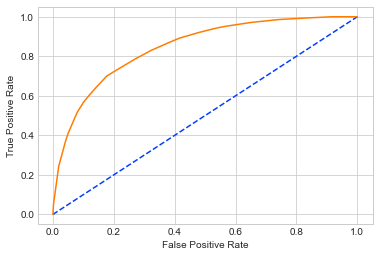

In [213]:
probs_cart = y_train_pred_prob[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.savefig('ROC_train_DT.png')

AUC: 0.798


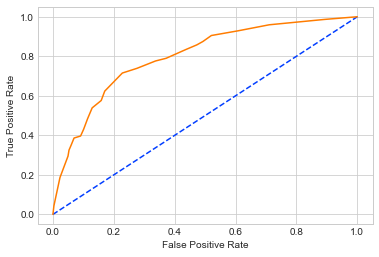

In [214]:
probs_cart = y_test_pred_prob[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.savefig('ROC_test_DT.png')

- ROC curve is the technique for visualising the output of classification models to find out how good the performance is.
- It is the graph that is calculated between the true positive rate and false positive rate in the confusion matrix.
    - True positive rate = TP/total positive - y axis
    - False positive rate = FP/total negative - x axis
- ROC graph is drawn to show a trade off between the benefits (TP) and costs (FP)
- The above graph is constructed between 0 and 1 in x axis and 0 and 1 in y axis. This represents the percentage or the probabilities.
- The x axis is the negative scenario and y axis is the positive scenario. We expect a hight true positive rate and low false positive rate.
- For the testing data ROC graph if we take 0.2 as the cutoff to seperate or classify the positives and the negatives the corresponding true positive rate is around 0.7.
- For the training data ROC graph if we take 0.2 as the cutoff to seperate or classify the positives and the negatives the corresponding true positive rate is slightly larger than 0.7.
- We know that the steeper the ROC curve, the stronger the model and the flatter the ROC curve , the weeker the model.
- AUC means Area under the ROC Curve. Larger the AUC, better the model because the more steeper it will be. The AUC for training data is 84.5% and for testing data it is 79.8%.

### Train Data:
    - AUC: 83.6%
    - Accuracy: 75%
    - Recall: 50%
    - Precision: 73%
    - f1-Score: 59%

### Test Data:
    - AUC: 79.4%
    - Accuracy: 75%
    - RecallL 38%
    - Precision: 73%
    - f1-Score: 50%

## RF Model Performance Evaluation on Training data

### RF Confusion Matrix and Classification Report for the Training and Testing  data

In [215]:
class_report_train_rf = classification_report(train_labels, y_train_pred_rfcl)
print(class_report_train_rf)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.60      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [216]:
df_report_train_rf= pd.DataFrame(classification_report(train_labels, y_train_pred_rfcl,output_dict=True))

In [217]:
df_report_train_rf

0           1  accuracy    macro avg  weighted avg
precision     0.839342    0.722543  0.810476     0.780943      0.804358
recall        0.902107    0.596184  0.810476     0.749146      0.810476
f1-score      0.869594    0.653310  0.810476     0.761452      0.804812
support    1471.000000  629.000000  0.810476  2100.000000   2100.000000

In [218]:
dfi.export(df_report_train_rf.transpose(),'df_report_train_rf.png')

In [219]:
class_report_test_rf = classification_report(test_labels, y_test_pred_rfcl)
print(class_report_test_rf)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [220]:
df_report_test_rf = pd.DataFrame(classification_report(test_labels, y_test_pred_rfcl,output_dict=True))

In [221]:
df_report_test_rf

0           1  accuracy   macro avg  weighted avg
precision    0.782979    0.728205  0.771111    0.755592      0.765025
recall       0.912397    0.481356  0.771111    0.696876      0.771111
f1-score     0.842748    0.579592  0.771111    0.711170      0.756491
support    605.000000  295.000000  0.771111  900.000000    900.000000

In [222]:
dfi.export(df_report_test_rf.transpose(),'df_report_test_rf.png')

- Accuracy of the model is the correct predictions divided by total number of observations. It suggests how accurately does the model classify the data points. Accuracy for training data is 81.04% and Accuracy for testing data is 77.11%. Higher the Accuracy of the model, stronger the prediction lower the accuracy weaker the prediction.
- The Recall of the model tells us how many of the true data points are identified as the true data points by the model. It describes the Type 2 error. Recall for training data is 59.61% and Recall for testing data is 48.13%.
- The precision of the model tell us among the data points identified as Positive by the model, how many are really positive. It describes the Type 1 error. precision for training data is 72.25% and precision for testing data is 72.82%.

In [223]:
confusion_matrix(train_labels, y_train_pred_rfcl)

array([[1327,  144],
       [ 254,  375]])

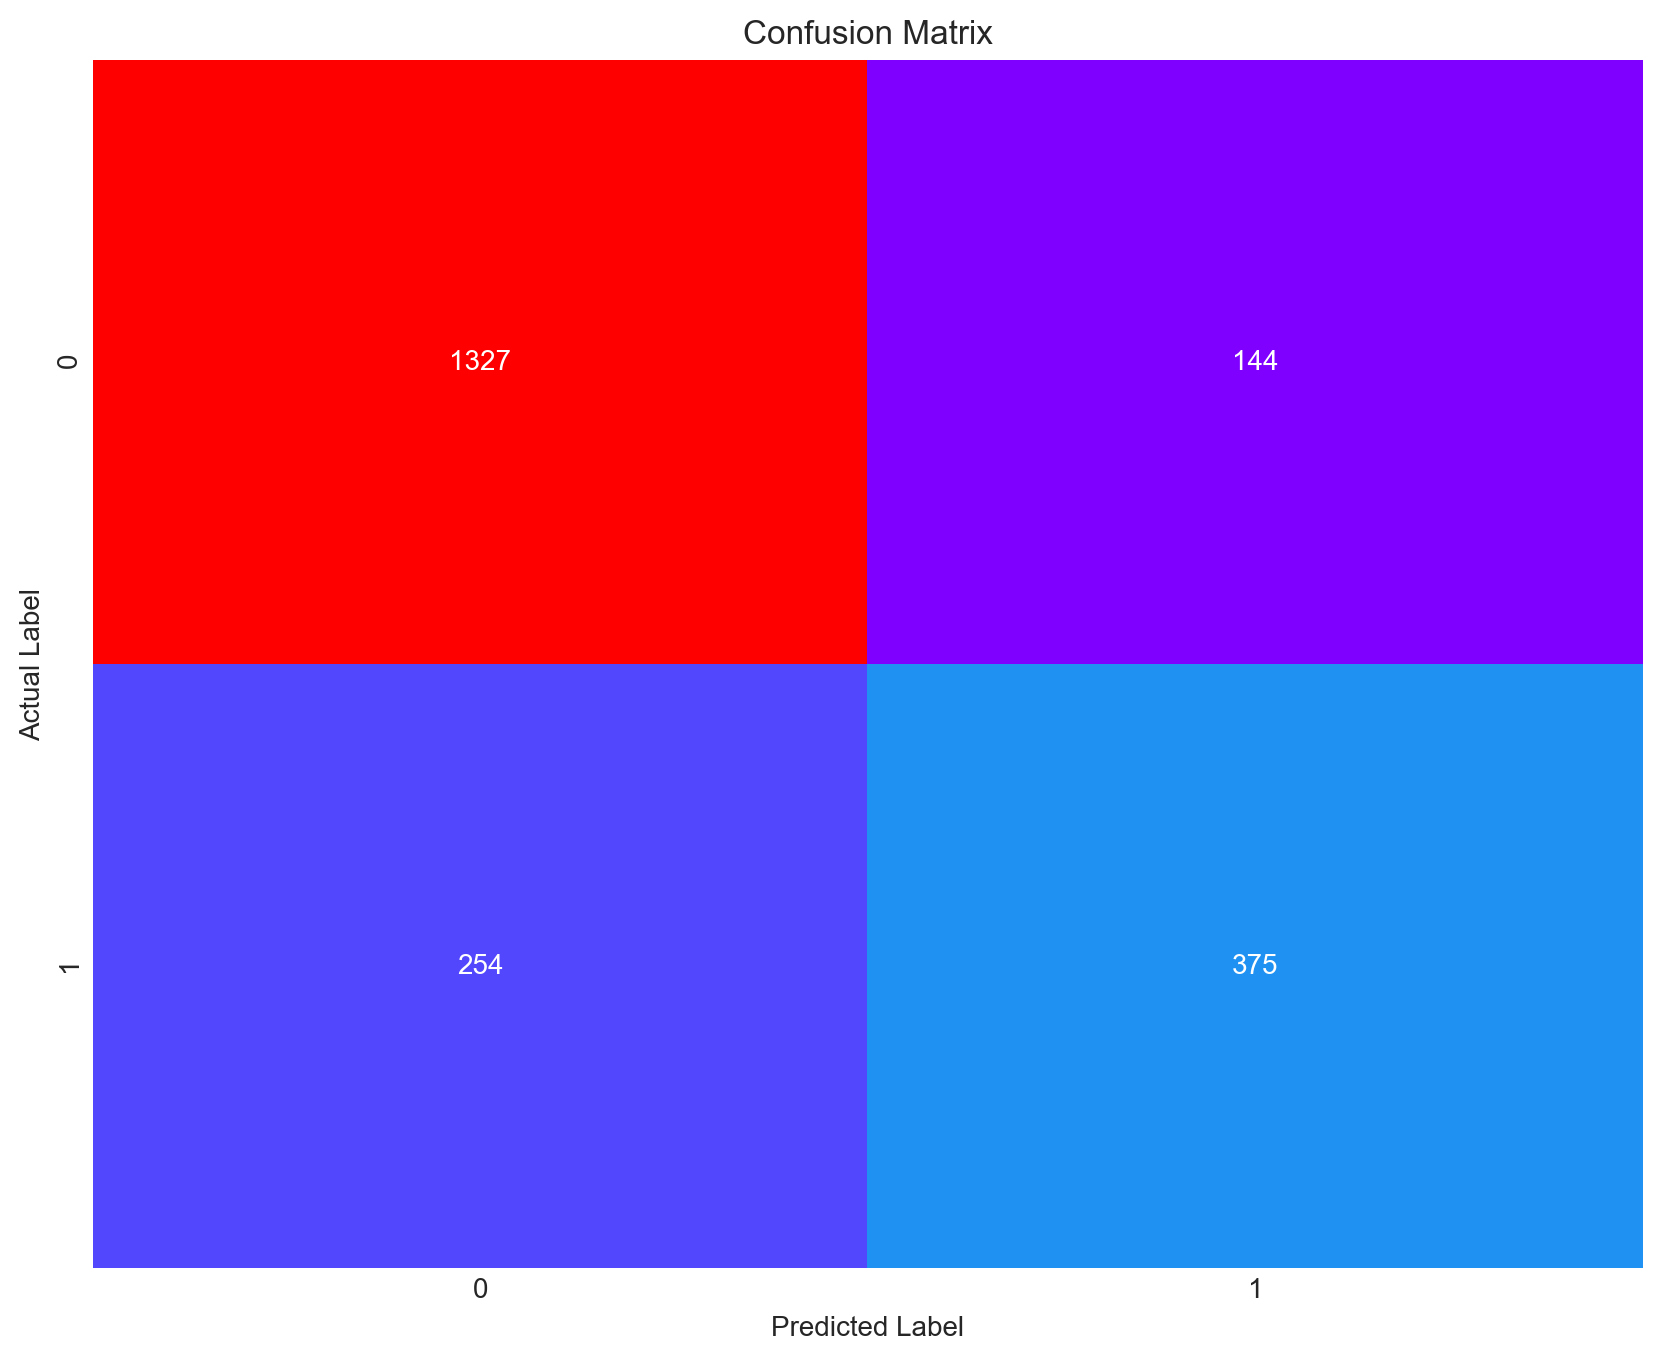

In [224]:
confusion_matrix(train_labels,y_train_pred_rfcl)
plt.figure(figsize=(10,8), dpi = 200)
sns.heatmap(confusion_matrix(train_labels,y_train_pred_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_train_Rf.png')
plt.show()

In [225]:
confusion_matrix(test_labels, y_test_pred_rfcl)

array([[552,  53],
       [153, 142]])

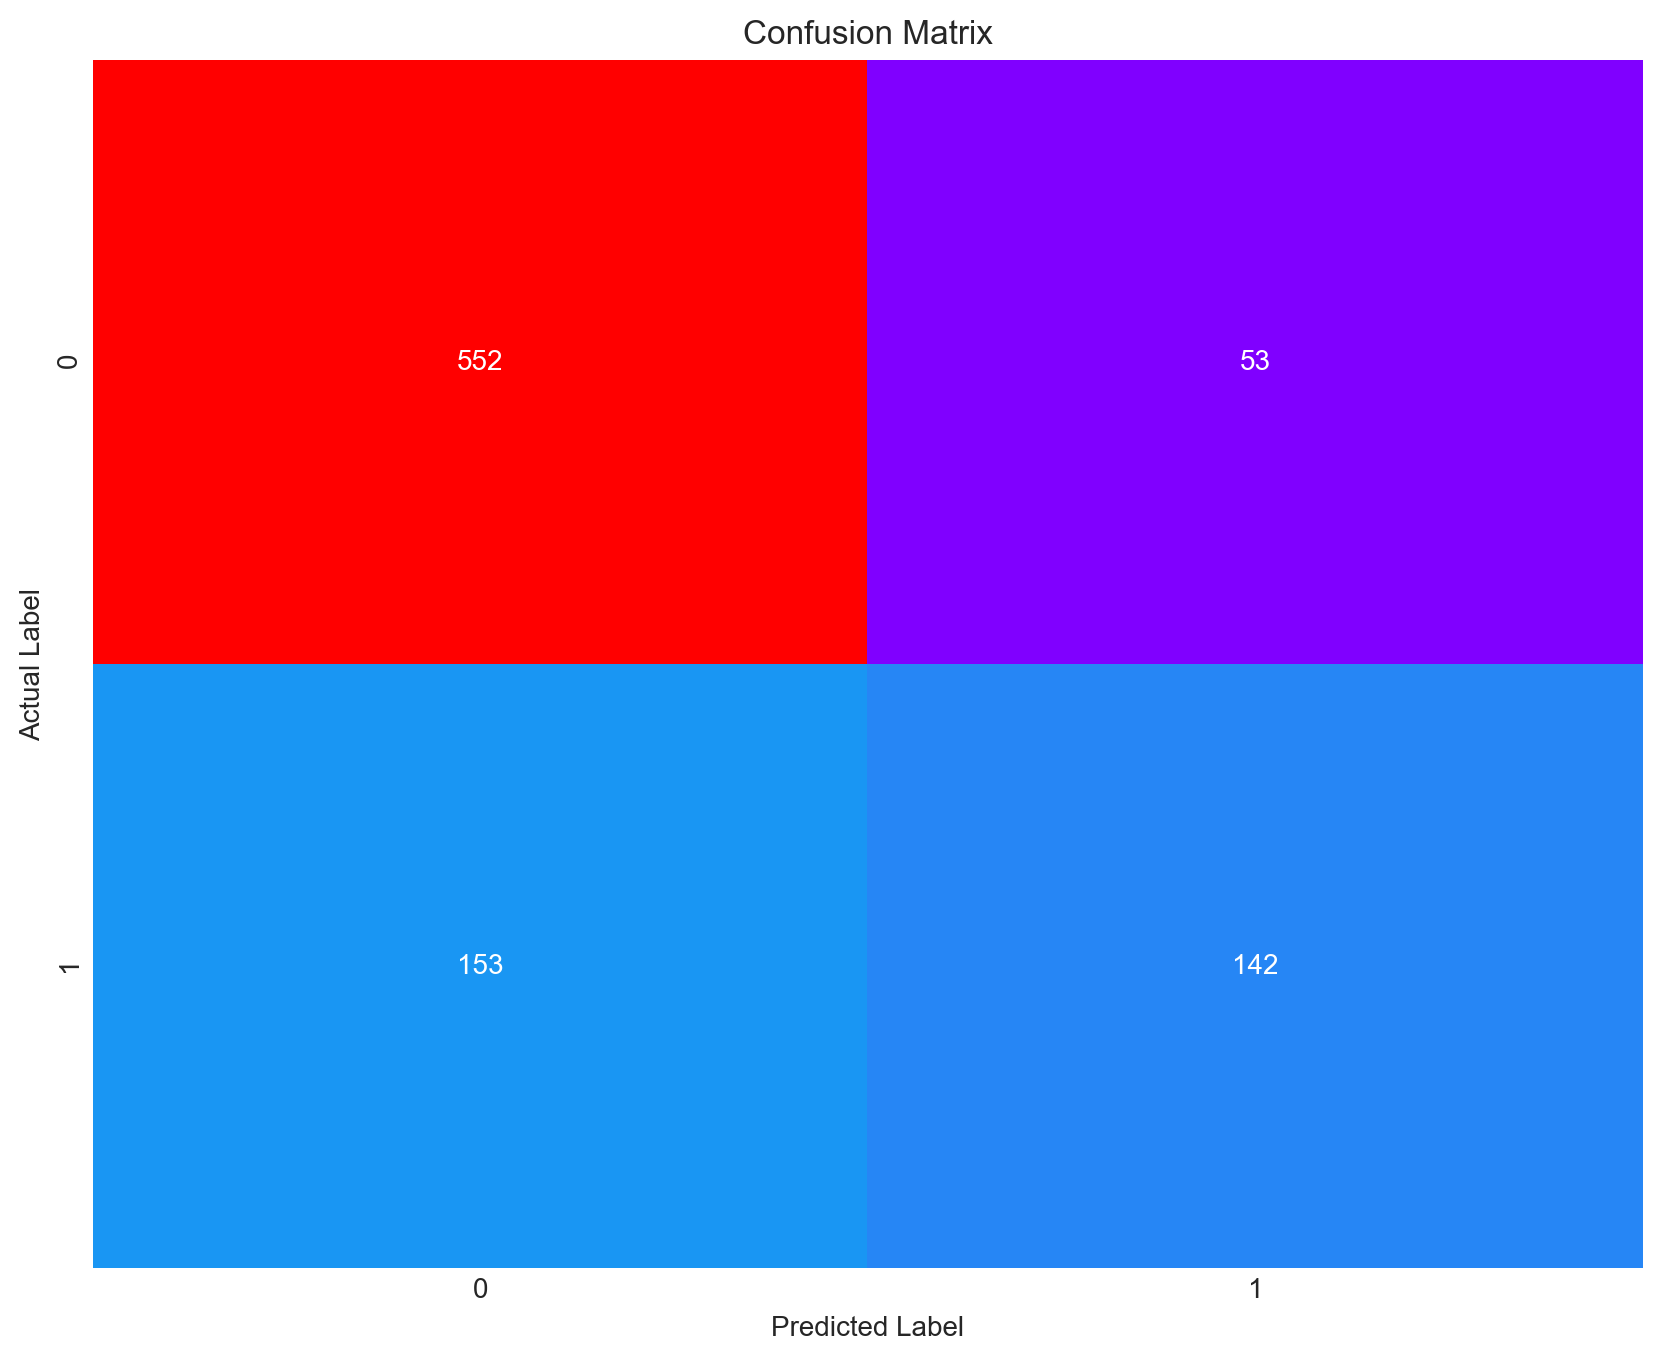

In [226]:
confusion_matrix(test_labels,y_test_pred_rfcl)
plt.figure(figsize=(10,8), dpi = 200)
sns.heatmap(confusion_matrix(test_labels,y_test_pred_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_test_Rf.png')
plt.show()

- In our dataset for the target variable 'Claimed', 0 means the person has not claimed and 1 means the person has claimed.
- if we study the confusion matrix, we will find that False Negative i.e. FN is the most important for us because it signifies the condition when the person actually made a claim but the model predicted that the person will not. It will be a more costlier mistake for the management. This is the type 2 error.
- the second most important metric for us is True Positive i.e. TP because it signifies the condition when the person has made a claim and the model also predicted the same.
- From the above table we can see that for training data FN = 254 and TP = 375 and testing data FN = 153 and TP = 142.
- The performance metric which considers FN and TP as the measuring parameter is Recall or Sensitivity. FN is the Type 2 error and for Type 2 error we consider Recall or Sensitivity as the optimised performance measure for our problem statement.

In [227]:
rf_train_acc = best_grid_param_rfcl.score(X_train, train_labels)
rf_train_acc

0.8104761904761905

In [228]:
rf_test_acc = best_grid_param_rfcl.score(X_test, test_labels)
rf_test_acc

0.7711111111111111

- the score object returns the mean accuracy on the given data and labels.
    - acccuracy for train data and label is 79%
    - accuracy for test data and label is 76%

### RF - AUC and ROC for the Training and Testing data

AUC: 0.845


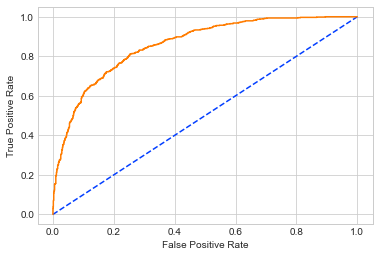

In [229]:
probs_cart = y_train_pred_rfcl_prob[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.savefig('ROC_train_Rf.png')

In [230]:
probs_cart = y_test_pred_rfcl_prob[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)
plt.savefig('ROC_test_Rf.png')

AUC: 0.798


- ROC curve is the technique for visualising the output of classification models to find out how good the performance is.
- It is the graph that is calculated between the true positive rate and false positive rate in the confusion matrix.
    - True positive rate = TP/total positive - y axis
    - False positive rate = FP/total negative - x axis
- ROC graph is drawn to show a trade off between the benefits (TP) and costs (FP)
The above graph is constructed between 0 and 1 in x axis and 0 and 1 in y axis. This represents the percentage or the probabilities.
- The x axis is the negative scenario and y axis is the positive scenario. We expect a hight true positive rate and low false positive rate.
- For the testing data ROC graph if we take 0.6 as the cutoff to seperate or classify the positives and the negatives the corresponding true positive rate is slightly greater than 0.9.
- For the training data ROC graph if we take 0.6 as the cutoff to seperate or classify the positives and the negatives the corresponding true positive rate is around 1.0.
- We know that the steeper the ROC curve, the stronger the model and the flatter the ROC curve , the weeker the model.
- AUC means Area under the ROC Curve. Larger the AUC, better the model because the more steeper it will be. The AUC for training data is 84.5% and for testing data it is 79.8%.

## ANN Model Evaluation

### Artificial Neural Network Model Performance Evaluation on Training and Testing data

In [231]:
class_report_train_nncl = classification_report(train_labels, y_train_pred_nncl)
print(class_report_train_nncl)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.67      0.51      0.57       629

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [232]:
df_report_train_nncl= pd.DataFrame(classification_report(train_labels, y_train_pred_nncl,output_dict=True))

In [233]:
df_report_train_nncl

0           1  accuracy    macro avg  weighted avg
precision     0.808261    0.665272  0.775714     0.736767      0.765433
recall        0.891230    0.505564  0.775714     0.698397      0.775714
f1-score      0.847721    0.574526  0.775714     0.711123      0.765892
support    1471.000000  629.000000  0.775714  2100.000000   2100.000000

In [234]:
dfi.export(df_report_train_nncl.transpose(), 'df_report_train_nncl.png')

In [235]:
class_report_test_nncl = classification_report(test_labels, y_test_pred_nncl)
print(class_report_test_nncl)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [236]:
df_report_test_nncl= pd.DataFrame(classification_report(test_labels, y_test_pred_nncl,output_dict=True))

In [237]:
df_report_test_nncl

0           1  accuracy   macro avg  weighted avg
precision    0.769018    0.723164      0.76    0.746091      0.753988
recall       0.919008    0.433898      0.76    0.676453      0.760000
f1-score     0.837349    0.542373      0.76    0.689861      0.740663
support    605.000000  295.000000      0.76  900.000000    900.000000

In [238]:
dfi.export(df_report_test_nncl.transpose(), 'df_report_test_nncl.png')

- Accuracy of the model is the correct predictions divided by total number of observations. It suggests how accurately does the model classify the data points. Accuracy for training data is 78% and Accuracy for testing data is 76%. Higher the Accuracy of the model, stronger the prediction lower the accuracy weaker the prediction.
- The Recall of the model tells us how many of the true data points are identified as the true data points by the model. It describes the Type 2 error. Recall for training data is 51% and Recall for testing data is 43%.
- The precision of the model tell us among the data points identified as Positive by the model, how many are really positive. It describes the Type 1 error. precision for training data is 67% and precision for testing data is 72%.

In [239]:
confusion_matrix(train_labels, y_train_pred_nncl)

array([[1311,  160],
       [ 311,  318]])

In [240]:
confusion_matrix(train_labels,y_train_pred_nncl)
plt.figure(figsize=(10,8), dpi = 200)
sns.heatmap(confusion_matrix(train_labels,y_train_pred_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_train_nncl.png')
plt.show()

In [241]:
confusion_matrix(test_labels, y_test_pred_nncl)

array([[556,  49],
       [167, 128]])

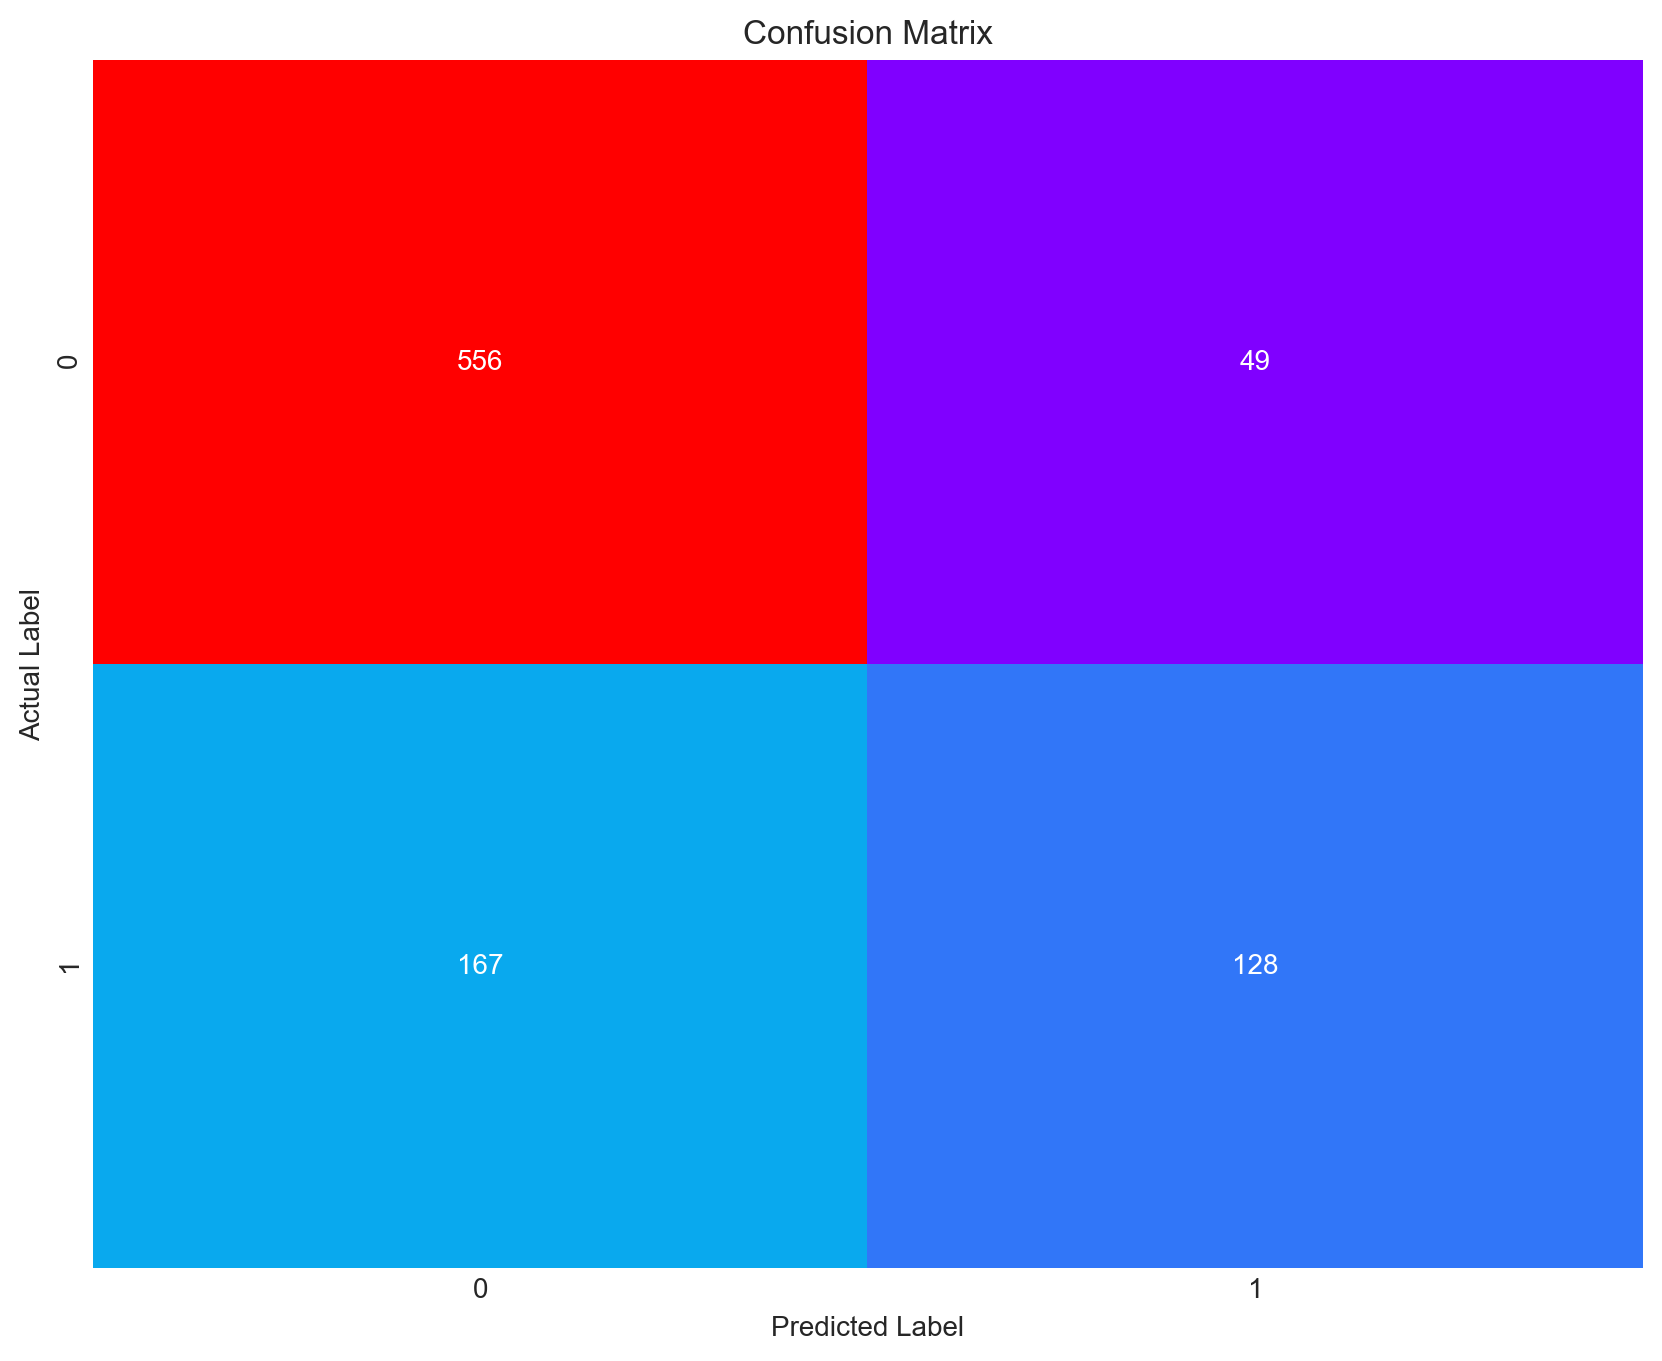

In [242]:
confusion_matrix(test_labels,y_test_pred_nncl)
plt.figure(figsize=(10,8), dpi = 200)
sns.heatmap(confusion_matrix(test_labels,y_test_pred_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_test_nncl.png')
plt.show()

- In our dataset for the target variable 'Claimed', 0 means the person has not claimed and 1 means the person has claimed.
- if we study the confusion matrix, we will find that False Negative i.e. FN is the most important for us because it signifies the condition when the person actually made a claim but the model predicted that the person will not. It will be a more costlier mistake for the management. This is the type 2 error.
- the second most important metric for us is True Positive i.e. TP because it signifies the condition when the person has made a claim and the model also predicted the same.
- From the above table we can see that for training data FN = 311 and TP = 318 and testing data FN = 167 and TP = 128.
The performance metric which considers FN and TP as the measuring parameter is Recall or Sensitivity. FN is the Type 2 error and for Type 2 error we consider Recall or Sensitivity as the optimised performance measure for our problem statement.

### ANN - AUC and ROC for the Training and Testing data

AUC: 0.845


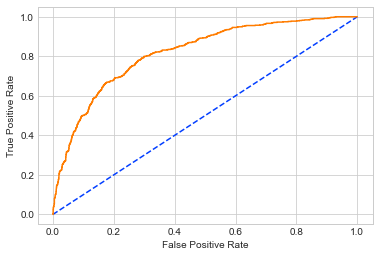

In [243]:
probs_cart = y_train_pred_nncl_prob[:, 1]
# calculate AUC
nncl_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
nncl_train_fpr, nncl_train_tpr, nncl_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(nncl_train_fpr, nncl_train_tpr)
plt.savefig('ROC_train_nncl.png')

AUC: 0.798


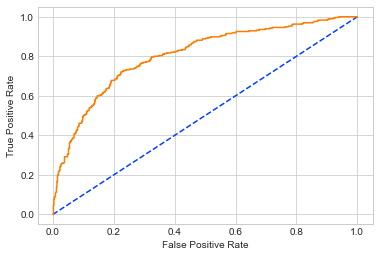

In [244]:
probs_cart = y_test_pred_nncl_prob[:, 1]
# calculate AUC
nncl_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
nncl_test_fpr, nncl_test_tpr, nncl_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(nncl_test_fpr, nncl_test_tpr)
plt.savefig('ROC_test_nncl.png')

- ROC curve is the technique for visualising the output of classification models to find out how good the performance is.
- It is the graph that is calculated between the true positive rate and false positive rate in the confusion matrix.
    - True positive rate = TP/total positive - y axis
    - False positive rate = FP/total negative - x axis
- ROC graph is drawn to show a trade off between the benefits (TP) and costs (FP)
The above graph is constructed between 0 and 1 in x axis and 0 and 1 in y axis. This represents the percentage or the probabilities.
- The x axis is the negative scenario and y axis is the positive scenario. We expect a hight true positive rate and low false positive rate.
- For the testing data ROC graph if we take 0.6 as the cutoff to seperate or classify the positives and the negatives the corresponding true positive rate is slightly greater than 0.9.
- For the training data ROC graph if we take 0.6 as the cutoff to seperate or classify the positives and the negatives the corresponding true positive rate is around 1.0.
- We know that the steeper the ROC curve, the stronger the model and the flatter the ROC curve , the weeker the model.
- AUC means Area under the ROC Curve. Larger the AUC, better the model because the more steeper it will be. The AUC for training data is 84.5% and for testing data it is 79.8%.

In [245]:
nncl_train_acc = best_grid_param_nncl.score(x_train, train_labels)
nncl_train_acc

0.7757142857142857

In [246]:
nncl_test_acc = best_grid_param_nncl.score(x_test, test_labels)
nncl_test_acc

0.76

- the score object returns the mean accuracy on the given data and labels.
    - acccuracy for train data and label is 78%
    - accuracy for test data and label is 76%


## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [247]:
df_report_train.transpose()

precision    recall  f1-score  support
0              0.829881  0.898708  0.862924   1471.0
1              0.706114  0.569157  0.630282    629.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.767998  0.733933  0.746603   2100.0
weighted avg   0.792810  0.800000  0.793242   2100.0

In [248]:
cart_train_recall = round(df_report_train.transpose().loc['1'][1],2)
cart_train_precision = round(df_report_train.transpose().loc['1'][0],2)
cart_train_fscore = round(df_report_train.transpose().loc['1'][2],2)

In [249]:
cart_test_recall = round(df_report_test.transpose().loc['1'][1],2)
cart_test_precision = round(df_report_test.transpose().loc['1'][0],2)
cart_test_fscore = round(df_report_test.transpose().loc['1'][2],2)

In [250]:
rf_test_recall = round(df_report_test_rf.transpose().loc['1'][1],2)
rf_test_precision = round(df_report_test_rf.transpose().loc['1'][0],2)
rf_test_fscore = round(df_report_test_rf.transpose().loc['1'][2],2)

In [251]:
rf_train_recall = round(df_report_train_rf.transpose().loc['1'][1],2)
rf_train_precision = round(df_report_train_rf.transpose().loc['1'][0],2)
rf_train_fscore = round(df_report_train_rf.transpose().loc['1'][2],2)

In [252]:
nncl_train_recall = round(df_report_train_nncl.transpose().loc['1'][1],2)
nncl_train_precision = round(df_report_train_nncl.transpose().loc['1'][0],2)
nncl_train_fscore = round(df_report_train_nncl.transpose().loc['1'][2],2)

In [253]:
nncl_test_recall = round(df_report_test_nncl.transpose().loc['1'][1],2)
nncl_test_precision = round(df_report_test_nncl.transpose().loc['1'][0],2)
nncl_test_fscore = round(df_report_test_nncl.transpose().loc['1'][2],2)

## Comparison of all performance metrics from 3 models

In [254]:
index = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc, cart_train_auc, cart_train_recall, cart_train_precision,
                                  cart_train_fscore],
                   'CART Test': [cart_test_acc, cart_test_auc, cart_test_recall, cart_test_precision
                                , cart_test_fscore],
                   'Random Forest Train': [rf_train_acc, rf_train_auc, rf_train_recall,
                                          rf_train_precision, rf_train_fscore],
                   'Random Forest Test':[rf_test_acc,rf_test_auc, rf_test_recall,
                                          rf_test_precision, rf_test_fscore],
                   'Neural Network Train':[nncl_train_acc, nncl_train_auc, nncl_train_recall,
                                          nncl_train_precision, nncl_train_fscore],
                   'Neural Network Test':[nncl_test_acc, nncl_test_auc, nncl_test_recall,
                                          nncl_test_precision, nncl_test_fscore]}, index = index)


In [255]:
data

CART Train  CART Test  Random Forest Train  Random Forest Test  \
Accuracy     0.800000   0.745556             0.810476            0.771111   
AUC          0.844601   0.798384             0.858887            0.819442   
Recall       0.570000   0.430000             0.600000            0.480000   
Precision    0.710000   0.680000             0.720000            0.730000   
F1 Score     0.630000   0.530000             0.650000            0.580000   

           Neural Network Train  Neural Network Test  
Accuracy               0.775714             0.760000  
AUC                    0.818246             0.803846  
Recall                 0.510000             0.430000  
Precision              0.670000             0.720000  
F1 Score               0.570000             0.540000

In [256]:
dfi.export(data, 'data.png')

- From the above table, we can say that none of the models have been Overfitted or underfitted. 
- We could see that the Random Forest model has highest Accuracy on the Training data (0.81) as well as Testing data (0.7711). 
- We can also conclude that we have lower Accuracy on the Artificial Neural Networks for Training data (0.77) as well as Testing Data (0.76). 
- CART provides an accuracy for Training data (0.80) and for Testing data (0.745) which is relatively better than neural networks for Training Data.
- The F1 score and Precision for Random Forest for training data is (0.65) and (0.72) respectively and for Testing data is (0.58) and (0.73) respectively. The F1 score and Precision for Neural Network for training data is (0.57) and (0.67) respectively and for testing data is (0.54) and (0.72) respectively. The F1 score and precision for CART for Training data is (0.63) and (0.71) and for Testing data is (0.53) and (0.68) repsectively. Therefore we can conclude that Random Forest performs better for Training data as well as Testing data as compared CART and Neural Network.

## ROC Curve for the 3 models for Training data

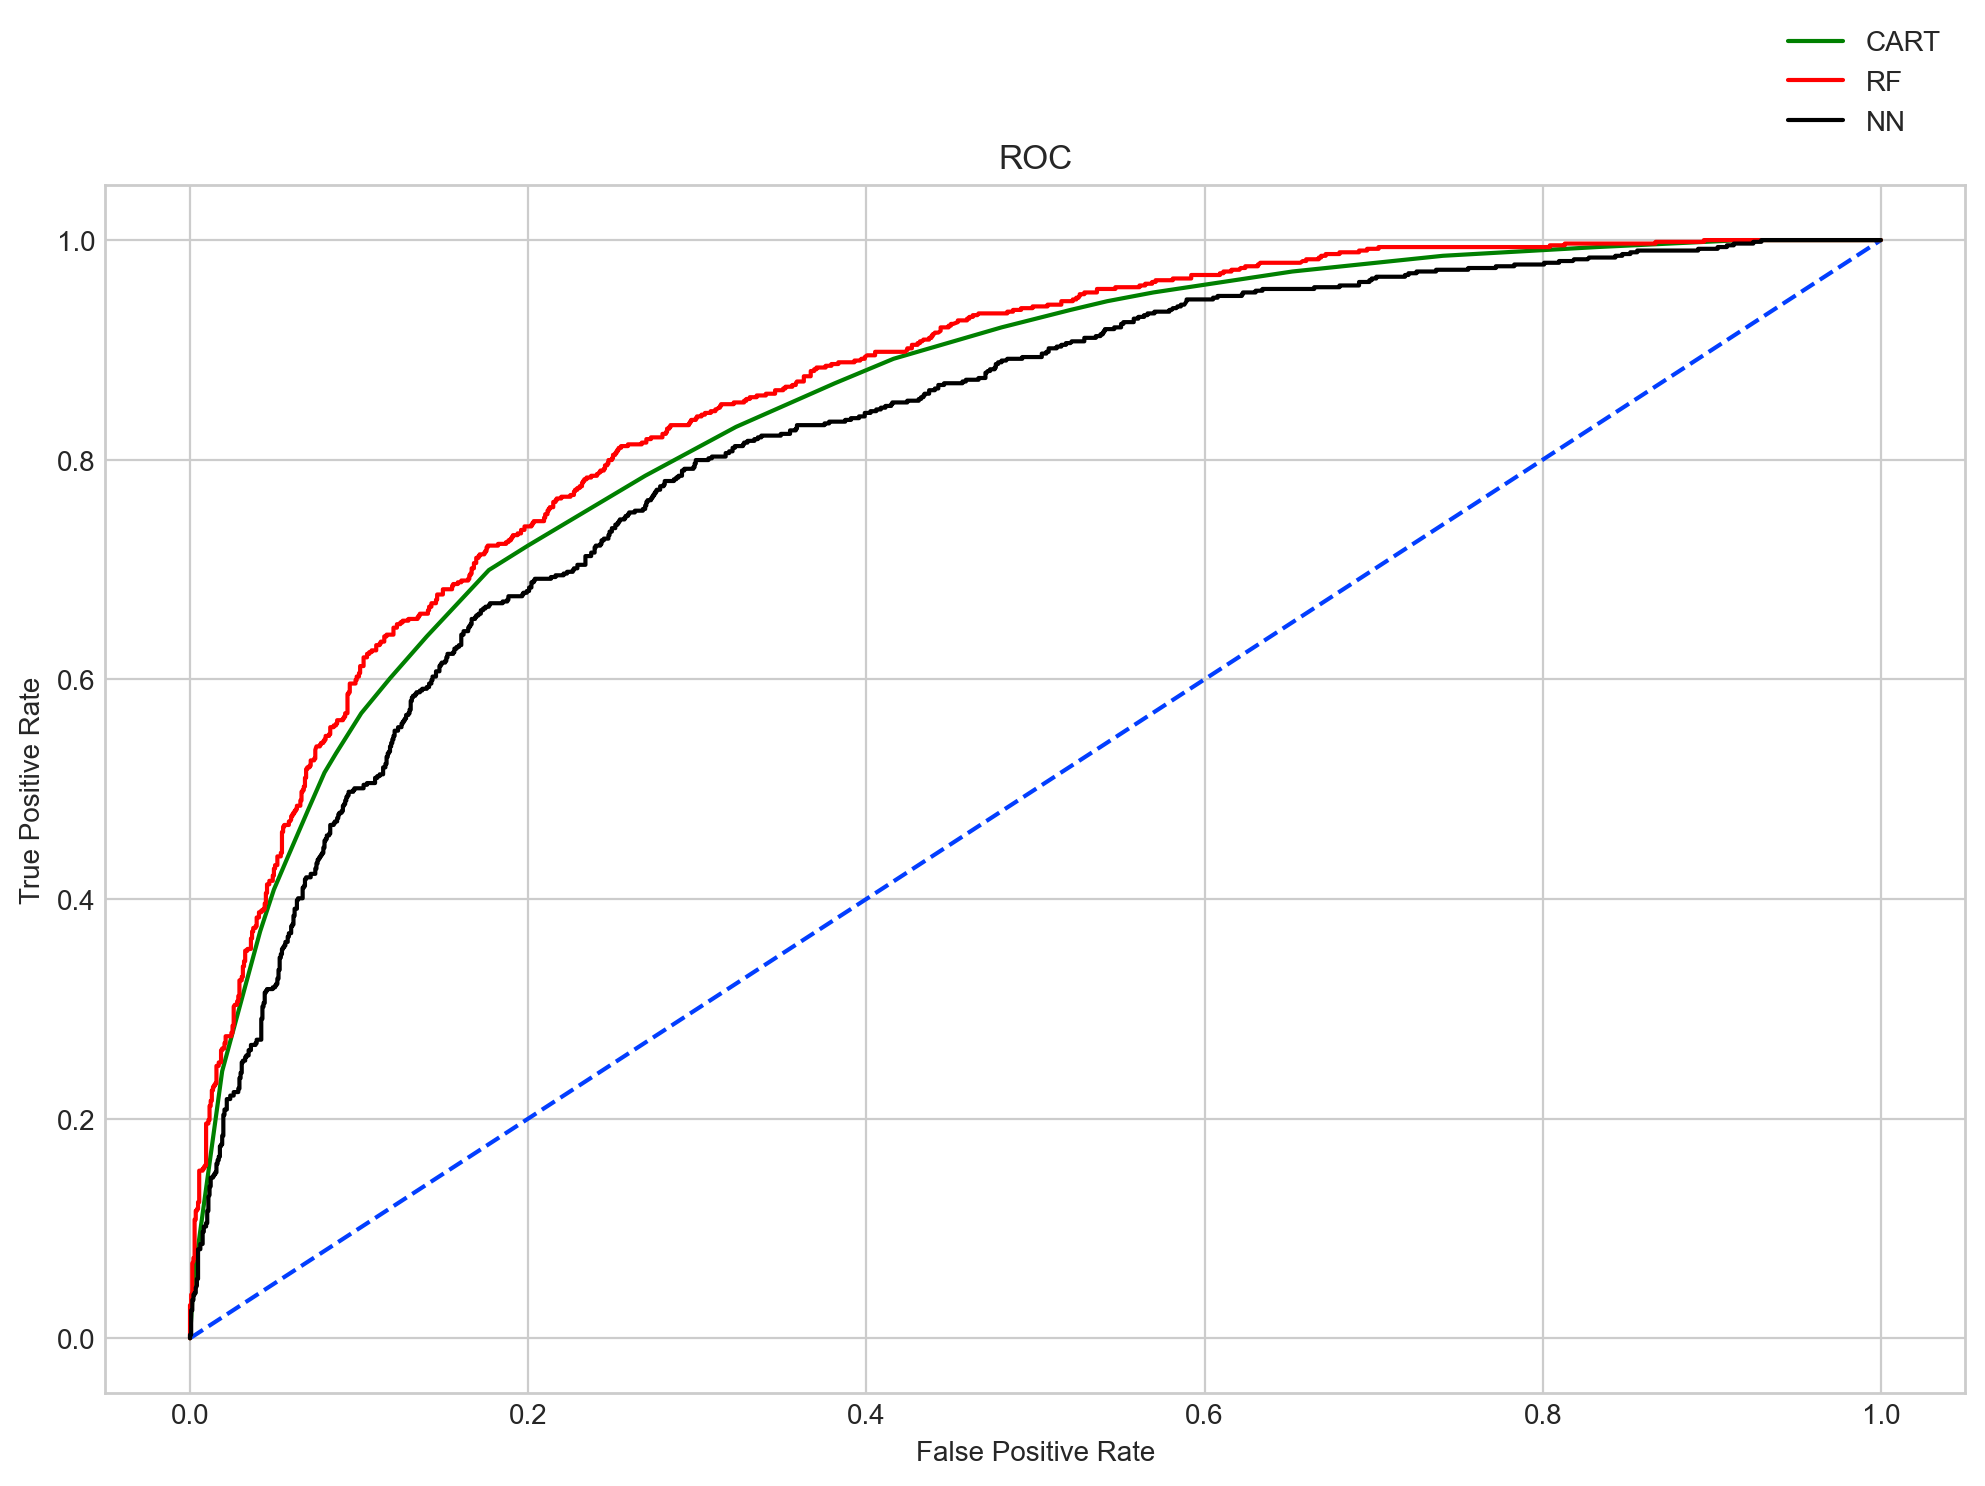

In [257]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='green',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='red',label="RF")
plt.plot(nncl_train_fpr,nncl_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.savefig('ROC_3models_train.png')
plt.show()

## ROC Curve for the 3 models on the Test data

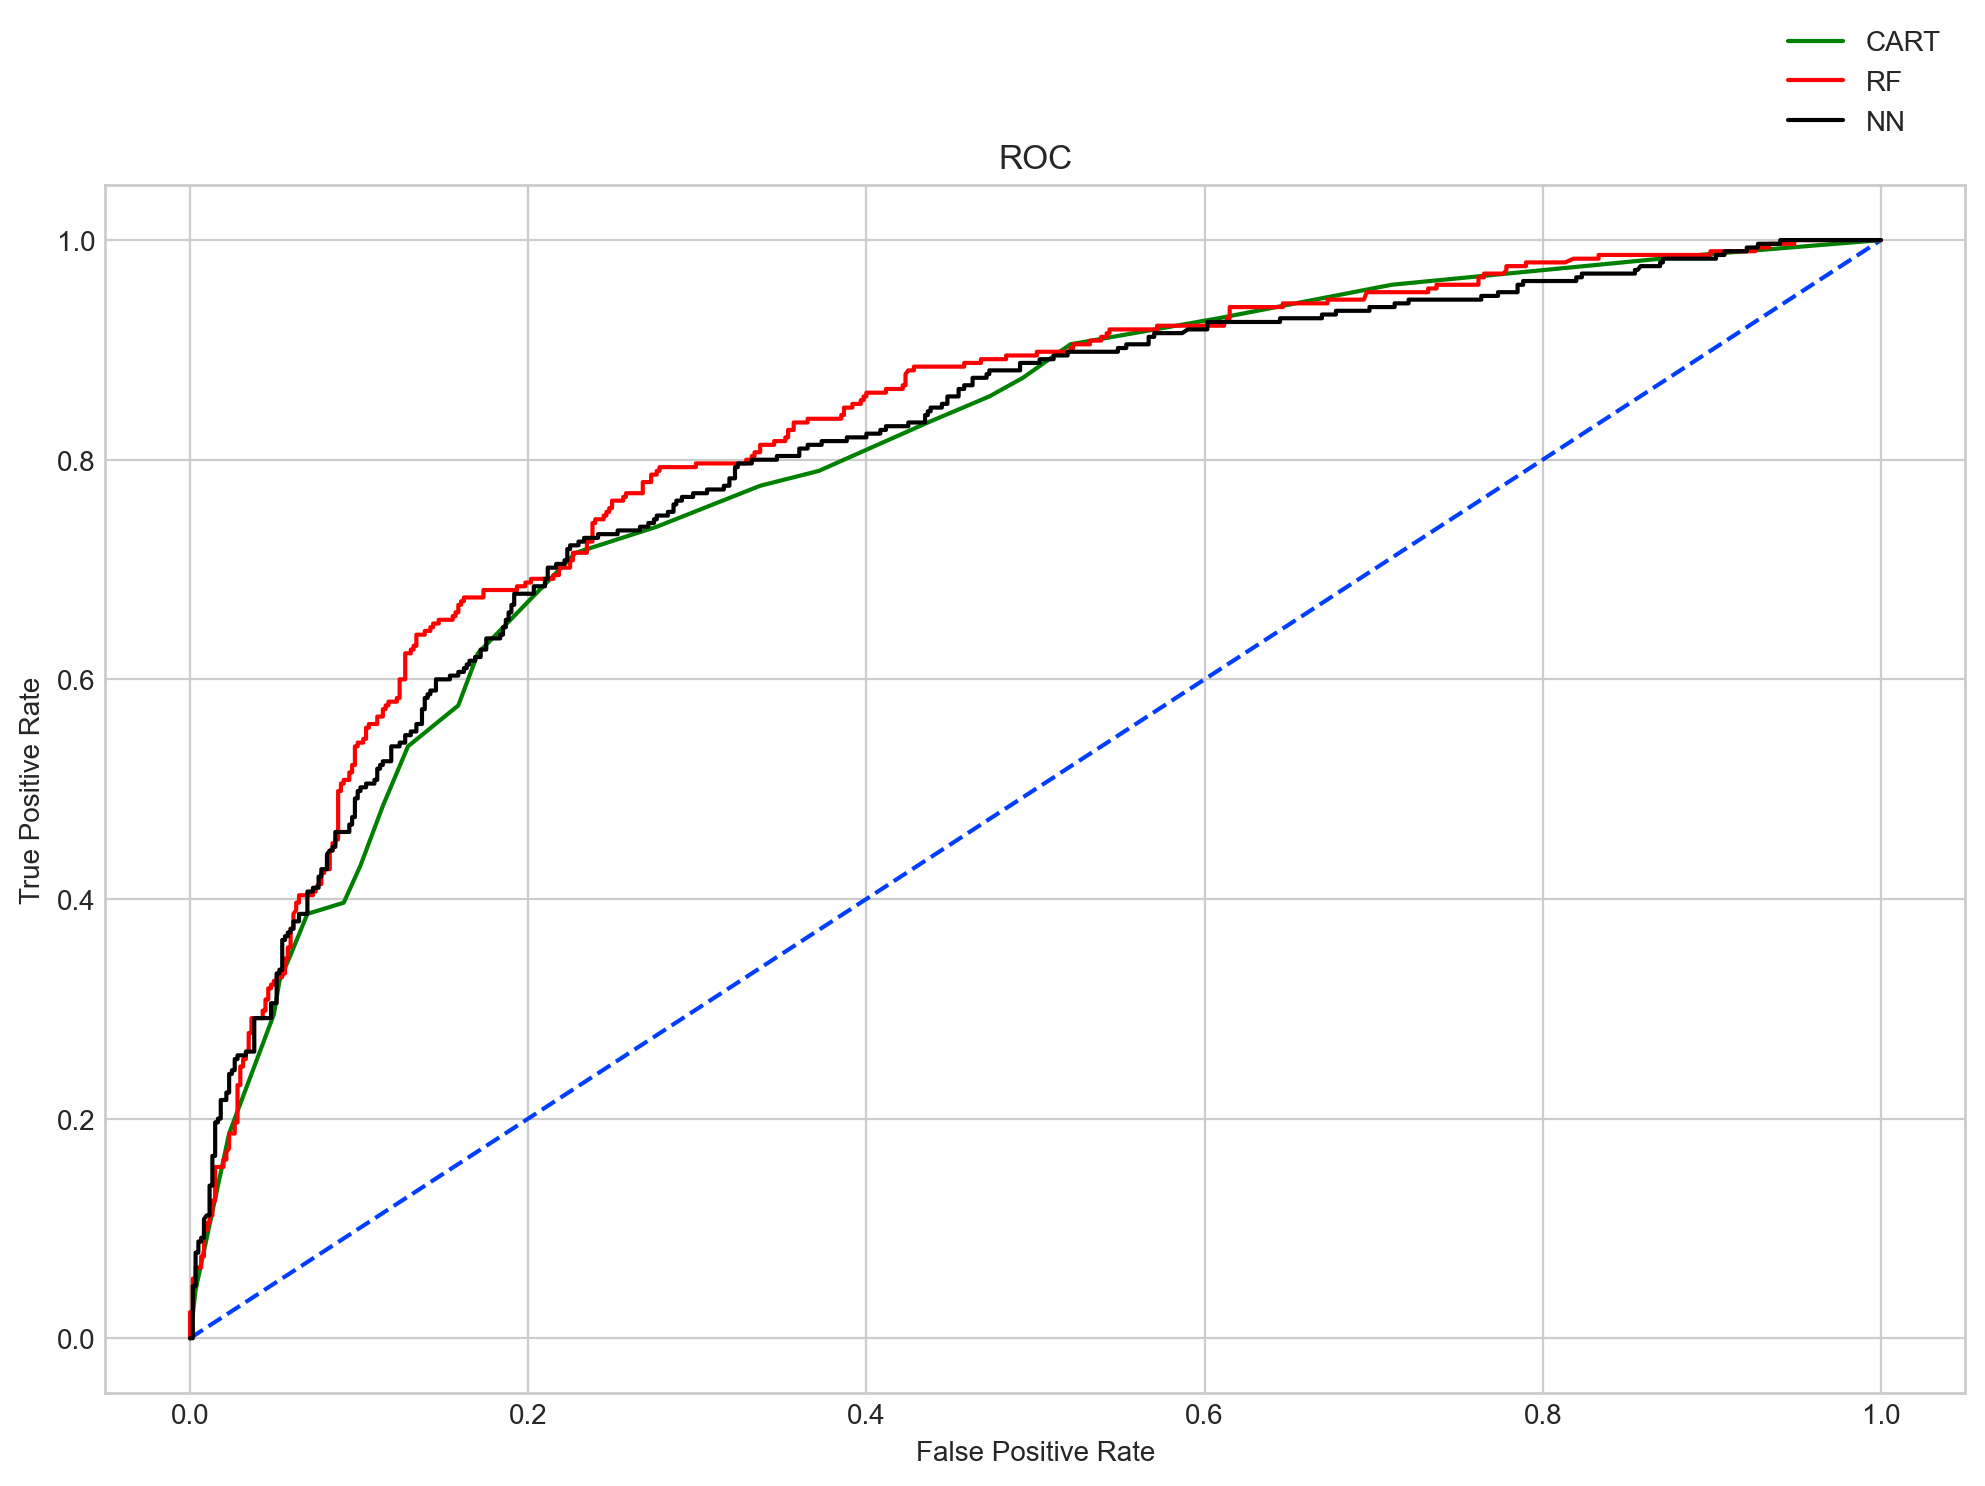

In [258]:
plt.figure(figsize=(12,8), dpi = 200)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='green',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='red',label="RF")
plt.plot(nncl_test_fpr,nncl_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.savefig('ROC_3models_test.png')

- From the Graph we can also conclude that we have much higher AUC score and a steeper curve with Random Forest model for both the Training data (0.8588) and Test data (0.82) as compared to CART and Neural Network model.
- Out of the 3 models, Random Forest has slightly better performance than the CART and ANN model.Random Forest is performing the best as compared to CART and ANN and therefore we will use Random forest for more accurate predictions.
- Overall all the 3 models are reasonably stable enough to be used for making any future predictions. From CART and Random Forest Model, the variable Agency_Code is found to be the most useful feature amongst all other features for predicting if a customer has claimed the insurance or not. The same can be observed from the Feature Importance table. All the the three models are having high accuracy, AUC, Recall and precision values.
- All the models yields good results for the given problem, but we select the one that yields the best results and is well optimized for the Business Problem given to us.

## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations